In [1]:
import tensorflow as tf
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Model
from keras.layers import BatchNormalization
from keras.layers import Dense,MaxPool2D,Conv2D
from keras.layers import Input,Activation,Add
from keras.regularizers import l2
from keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [2]:
fldr='./UTKFace'
files = os.listdir(fldr)

In [3]:
ages=[]
genders=[]
images=[]

In [4]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

./UTKFace/10_1_4_20170104005649671.jpg.chip.jpg
./UTKFace/10_1_4_20170117195152197.jpg.chip.jpg
./UTKFace/110_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/110_0_2_20170112223734562.jpg.chip.jpg
./UTKFace/110_1_0_20170120134701015.jpg.chip.jpg
./UTKFace/110_1_1_20170110155201038.jpg.chip.jpg
./UTKFace/110_1_3_20170110155139762.jpg.chip.jpg
./UTKFace/111_1_0_20170120134646399.jpg.chip.jpg
./UTKFace/115_1_0_20170120134725990.jpg.chip.jpg
./UTKFace/115_1_0_20170120134725991.jpg.chip.jpg
./UTKFace/115_1_1_20170112213257263.jpg.chip.jpg
./UTKFace/116_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/116_1_0_20170120134921760.jpg.chip.jpg
./UTKFace/116_1_2_20170112220255503.jpg.chip.jpg
./UTKFace/116_1_3_20170120134744096.jpg.chip.jpg
./UTKFace/11_0_0_20170103200509559.jpg.chip.jpg
./UTKFace/11_0_0_20170103200824775.jpg.chip.jpg
./UTKFace/11_0_0_20170104012556563.jpg.chip.jpg
./UTKFace/11_0_0_20170110220408722.jpg.chip.jpg
./UTKFace/11_0_0_20170110220453002.jpg.chip.jpg
./UTKFace/11_0_0_2017011022

./UTKFace/12_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/12_1_1_20170116225216163.jpg.chip.jpg
./UTKFace/12_1_1_20170116233629728.jpg.chip.jpg
./UTKFace/12_1_2_20170103200649030.jpg.chip.jpg
./UTKFace/12_1_2_20170103200922406.jpg.chip.jpg
./UTKFace/12_1_2_20170103201240488.jpg.chip.jpg
./UTKFace/12_1_2_20170104012405785.jpg.chip.jpg
./UTKFace/12_1_2_20170109203838187.jpg.chip.jpg
./UTKFace/12_1_2_20170109214246240.jpg.chip.jpg
./UTKFace/12_1_2_20170116190115810.jpg.chip.jpg
./UTKFace/12_1_2_20170116194059753.jpg.chip.jpg
./UTKFace/12_1_2_20170117145333545.jpg.chip.jpg
./UTKFace/12_1_2_20170117165908225.jpg.chip.jpg
./UTKFace/12_1_2_20170117194013371.jpg.chip.jpg
./UTKFace/12_1_3_20161220222343139.jpg.chip.jpg
./UTKFace/12_1_3_20170104012400657.jpg.chip.jpg
./UTKFace/12_1_3_20170104013517483.jpg.chip.jpg
./UTKFace/12_1_3_20170104221704334.jpg.chip.jpg
./UTKFace/12_1_3_20170104221910239.jpg.chip.jpg
./UTKFace/12_1_3_20170104223448631.jpg.chip.jpg
./UTKFace/12_1_3_20170104223643593.jpg.c

./UTKFace/14_0_4_20170113145202254.jpg.chip.jpg
./UTKFace/14_0_4_20170117192737955.jpg.chip.jpg
./UTKFace/14_0_4_20170117193432868.jpg.chip.jpg
./UTKFace/14_0_4_20170117204503401.jpg.chip.jpg
./UTKFace/14_1_0_20170103163023120.jpg.chip.jpg
./UTKFace/14_1_0_20170103183504594.jpg.chip.jpg
./UTKFace/14_1_0_20170103200702463.jpg.chip.jpg
./UTKFace/14_1_0_20170103200757286.jpg.chip.jpg
./UTKFace/14_1_0_20170103200819591.jpg.chip.jpg
./UTKFace/14_1_0_20170103201434935.jpg.chip.jpg
./UTKFace/14_1_0_20170103201911744.jpg.chip.jpg
./UTKFace/14_1_0_20170104005158239.jpg.chip.jpg
./UTKFace/14_1_0_20170104005333646.jpg.chip.jpg
./UTKFace/14_1_0_20170104005937407.jpg.chip.jpg
./UTKFace/14_1_0_20170104011720664.jpg.chip.jpg
./UTKFace/14_1_0_20170104011733528.jpg.chip.jpg
./UTKFace/14_1_0_20170104011842010.jpg.chip.jpg
./UTKFace/14_1_0_20170104013351986.jpg.chip.jpg
./UTKFace/14_1_0_20170109201824270.jpg.chip.jpg
./UTKFace/14_1_0_20170109203330417.jpg.chip.jpg
./UTKFace/14_1_0_20170109203340834.jpg.c

./UTKFace/15_1_0_20170109204210842.jpg.chip.jpg
./UTKFace/15_1_0_20170109204237329.jpg.chip.jpg
./UTKFace/15_1_0_20170109204314585.jpg.chip.jpg
./UTKFace/15_1_0_20170109204354264.jpg.chip.jpg
./UTKFace/15_1_0_20170109204416506.jpg.chip.jpg
./UTKFace/15_1_0_20170109212807412.jpg.chip.jpg
./UTKFace/15_1_0_20170109213421667.jpg.chip.jpg
./UTKFace/15_1_0_20170109213427133.jpg.chip.jpg
./UTKFace/15_1_0_20170109213448729.jpg.chip.jpg
./UTKFace/15_1_0_20170109213511851.jpg.chip.jpg
./UTKFace/15_1_0_20170109213537150.jpg.chip.jpg
./UTKFace/15_1_0_20170109213555287.jpg.chip.jpg
./UTKFace/15_1_0_20170109213613605.jpg.chip.jpg
./UTKFace/15_1_0_20170109214024612.jpg.chip.jpg
./UTKFace/15_1_0_20170109214058590.jpg.chip.jpg
./UTKFace/15_1_0_20170109214133273.jpg.chip.jpg
./UTKFace/15_1_0_20170109214302271.jpg.chip.jpg
./UTKFace/15_1_0_20170109214307598.jpg.chip.jpg
./UTKFace/15_1_0_20170109214319385.jpg.chip.jpg
./UTKFace/15_1_0_20170109214328421.jpg.chip.jpg
./UTKFace/15_1_0_20170109214352795.jpg.c

./UTKFace/16_0_0_20170110232528586.jpg.chip.jpg
./UTKFace/16_0_0_20170110232605131.jpg.chip.jpg
./UTKFace/16_0_0_20170110232611516.jpg.chip.jpg
./UTKFace/16_0_0_20170110232613101.jpg.chip.jpg
./UTKFace/16_0_0_20170110232647979.jpg.chip.jpg
./UTKFace/16_0_0_20170110232714508.jpg.chip.jpg
./UTKFace/16_0_0_20170110232724382.jpg.chip.jpg
./UTKFace/16_0_0_20170110232725516.jpg.chip.jpg
./UTKFace/16_0_0_20170110232741392.jpg.chip.jpg
./UTKFace/16_0_0_20170110232742700.jpg.chip.jpg
./UTKFace/16_0_0_20170110232757924.jpg.chip.jpg
./UTKFace/16_0_0_20170110232803098.jpg.chip.jpg
./UTKFace/16_0_0_20170110232817061.jpg.chip.jpg
./UTKFace/16_0_0_20170110232818695.jpg.chip.jpg
./UTKFace/16_0_0_20170116201106640.jpg.chip.jpg
./UTKFace/16_0_0_20170116201208865.jpg.chip.jpg
./UTKFace/16_0_0_20170116235030195.jpg.chip.jpg
./UTKFace/16_0_0_20170117134536197.jpg.chip.jpg
./UTKFace/16_0_0_20170117134538670.jpg.chip.jpg
./UTKFace/16_0_0_20170120133327900.jpg.chip.jpg
./UTKFace/16_0_1_20170105183511375.jpg.c

./UTKFace/17_0_0_20170110231719325.jpg.chip.jpg
./UTKFace/17_0_0_20170110231748137.jpg.chip.jpg
./UTKFace/17_0_0_20170110231752726.jpg.chip.jpg
./UTKFace/17_0_0_20170110231820806.jpg.chip.jpg
./UTKFace/17_0_0_20170110231830374.jpg.chip.jpg
./UTKFace/17_0_0_20170110232017297.jpg.chip.jpg
./UTKFace/17_0_0_20170110232022621.jpg.chip.jpg
./UTKFace/17_0_0_20170110232027271.jpg.chip.jpg
./UTKFace/17_0_0_20170110232044494.jpg.chip.jpg
./UTKFace/17_0_0_20170110232257182.jpg.chip.jpg
./UTKFace/17_0_0_20170110232438939.jpg.chip.jpg
./UTKFace/17_0_0_20170110232616400.jpg.chip.jpg
./UTKFace/17_0_0_20170113132359393.jpg.chip.jpg
./UTKFace/17_0_0_20170114025913647.jpg.chip.jpg
./UTKFace/17_0_0_20170114025941650.jpg.chip.jpg
./UTKFace/17_0_0_20170116182812470.jpg.chip.jpg
./UTKFace/17_0_0_20170116201003399.jpg.chip.jpg
./UTKFace/17_0_0_20170116205532920.jpg.chip.jpg
./UTKFace/17_0_0_20170116205554725.jpg.chip.jpg
./UTKFace/17_0_0_20170116221917954.jpg.chip.jpg
./UTKFace/17_0_0_20170117091447979.jpg.c

./UTKFace/18_0_1_20170113175555906.jpg.chip.jpg
./UTKFace/18_0_1_20170113175821404.jpg.chip.jpg
./UTKFace/18_0_1_20170113184819320.jpg.chip.jpg
./UTKFace/18_0_1_20170114025501676.jpg.chip.jpg
./UTKFace/18_0_1_20170114030410225.jpg.chip.jpg
./UTKFace/18_0_1_20170114030419966.jpg.chip.jpg
./UTKFace/18_0_1_20170114033130286.jpg.chip.jpg
./UTKFace/18_0_1_20170116204909922.jpg.chip.jpg
./UTKFace/18_0_1_20170116205256502.jpg.chip.jpg
./UTKFace/18_0_1_20170116210348146.jpg.chip.jpg
./UTKFace/18_0_1_20170117140107728.jpg.chip.jpg
./UTKFace/18_0_1_20170117143031666.jpg.chip.jpg
./UTKFace/18_0_1_20170120134900190.jpg.chip.jpg
./UTKFace/18_0_2_20161219205328564.jpg.chip.jpg
./UTKFace/18_0_2_20170110231202841.jpg.chip.jpg
./UTKFace/18_0_2_20170116163826980.jpg.chip.jpg
./UTKFace/18_0_2_20170116165401987.jpg.chip.jpg
./UTKFace/18_0_3_20170104225753848.jpg.chip.jpg
./UTKFace/18_0_3_20170104225805617.jpg.chip.jpg
./UTKFace/18_0_3_20170104225809521.jpg.chip.jpg
./UTKFace/18_0_3_20170104225812688.jpg.c

./UTKFace/18_1_2_20170109212939223.jpg.chip.jpg
./UTKFace/18_1_2_20170109213146944.jpg.chip.jpg
./UTKFace/18_1_2_20170109213157620.jpg.chip.jpg
./UTKFace/18_1_2_20170109213403551.jpg.chip.jpg
./UTKFace/18_1_2_20170109214034666.jpg.chip.jpg
./UTKFace/18_1_2_20170114030739228.jpg.chip.jpg
./UTKFace/18_1_3_20170104214217685.jpg.chip.jpg
./UTKFace/18_1_3_20170104221856991.jpg.chip.jpg
./UTKFace/18_1_3_20170104221905278.jpg.chip.jpg
./UTKFace/18_1_3_20170104221918414.jpg.chip.jpg
./UTKFace/18_1_3_20170104221920967.jpg.chip.jpg
./UTKFace/18_1_3_20170104221922679.jpg.chip.jpg
./UTKFace/18_1_3_20170104221936503.jpg.chip.jpg
./UTKFace/18_1_3_20170104222052685.jpg.chip.jpg
./UTKFace/18_1_3_20170109212742369.jpg.chip.jpg
./UTKFace/18_1_3_20170109213106901.jpg.chip.jpg
./UTKFace/18_1_3_20170109213144758.jpg.chip.jpg
./UTKFace/18_1_3_20170109213214718.jpg.chip.jpg
./UTKFace/18_1_3_20170109214031495.jpg.chip.jpg
./UTKFace/18_1_3_20170117135709510.jpg.chip.jpg
./UTKFace/18_1_3_20170117135716054.jpg.c

./UTKFace/1_0_0_20161219225850912.jpg.chip.jpg
./UTKFace/1_0_0_20161220201355210.jpg.chip.jpg
./UTKFace/1_0_0_20161220220135250.jpg.chip.jpg
./UTKFace/1_0_0_20161220220239129.jpg.chip.jpg
./UTKFace/1_0_0_20161220223221043.jpg.chip.jpg
./UTKFace/1_0_0_20170103210032258.jpg.chip.jpg
./UTKFace/1_0_0_20170103210415090.jpg.chip.jpg
./UTKFace/1_0_0_20170103210548852.jpg.chip.jpg
./UTKFace/1_0_0_20170103210741492.jpg.chip.jpg
./UTKFace/1_0_0_20170103210905939.jpg.chip.jpg
./UTKFace/1_0_0_20170109191105641.jpg.chip.jpg
./UTKFace/1_0_0_20170109191440780.jpg.chip.jpg
./UTKFace/1_0_0_20170109191445171.jpg.chip.jpg
./UTKFace/1_0_0_20170109191453449.jpg.chip.jpg
./UTKFace/1_0_0_20170109191725028.jpg.chip.jpg
./UTKFace/1_0_0_20170109191808532.jpg.chip.jpg
./UTKFace/1_0_0_20170109192219011.jpg.chip.jpg
./UTKFace/1_0_0_20170109192819417.jpg.chip.jpg
./UTKFace/1_0_0_20170109192836519.jpg.chip.jpg
./UTKFace/1_0_0_20170109192948605.jpg.chip.jpg
./UTKFace/1_0_0_20170109193030605.jpg.chip.jpg
./UTKFace/1_0

./UTKFace/1_0_2_20161219161623174.jpg.chip.jpg
./UTKFace/1_0_2_20161219161625326.jpg.chip.jpg
./UTKFace/1_0_2_20161219161626814.jpg.chip.jpg
./UTKFace/1_0_2_20161219161640358.jpg.chip.jpg
./UTKFace/1_0_2_20161219161822166.jpg.chip.jpg
./UTKFace/1_0_2_20161219161826830.jpg.chip.jpg
./UTKFace/1_0_2_20161219161831390.jpg.chip.jpg
./UTKFace/1_0_2_20161219161843718.jpg.chip.jpg
./UTKFace/1_0_2_20161219161855278.jpg.chip.jpg
./UTKFace/1_0_2_20161219161919870.jpg.chip.jpg
./UTKFace/1_0_2_20161219161941534.jpg.chip.jpg
./UTKFace/1_0_2_20161219161944926.jpg.chip.jpg
./UTKFace/1_0_2_20161219162118102.jpg.chip.jpg
./UTKFace/1_0_2_20161219162212662.jpg.chip.jpg
./UTKFace/1_0_2_20161219162427318.jpg.chip.jpg
./UTKFace/1_0_2_20161219162431598.jpg.chip.jpg
./UTKFace/1_0_2_20161219162433846.jpg.chip.jpg
./UTKFace/1_0_2_20161219162514182.jpg.chip.jpg
./UTKFace/1_0_2_20161219162518471.jpg.chip.jpg
./UTKFace/1_0_2_20161219162544751.jpg.chip.jpg
./UTKFace/1_0_2_20161219162626830.jpg.chip.jpg
./UTKFace/1_0

./UTKFace/1_0_2_20161219222749039.jpg.chip.jpg
./UTKFace/1_0_2_20161219222752047.jpg.chip.jpg
./UTKFace/1_0_2_20161219222832191.jpg.chip.jpg
./UTKFace/1_0_2_20161220144911423.jpg.chip.jpg
./UTKFace/1_0_2_20161220144914327.jpg.chip.jpg
./UTKFace/1_0_2_20161220144957407.jpg.chip.jpg
./UTKFace/1_0_2_20161220145040127.jpg.chip.jpg
./UTKFace/1_0_2_20170109191125532.jpg.chip.jpg
./UTKFace/1_0_2_20170109191209991.jpg.chip.jpg
./UTKFace/1_0_2_20170109191453449.jpg.chip.jpg
./UTKFace/1_0_2_20170109192102236.jpg.chip.jpg
./UTKFace/1_0_2_20170109192222822.jpg.chip.jpg
./UTKFace/1_0_2_20170109193535757.jpg.chip.jpg
./UTKFace/1_0_2_20170110212743721.jpg.chip.jpg
./UTKFace/1_0_2_20170110213009014.jpg.chip.jpg
./UTKFace/1_0_2_20170110213415212.jpg.chip.jpg
./UTKFace/1_0_2_20170110213523297.jpg.chip.jpg
./UTKFace/1_0_2_20170116194202388.jpg.chip.jpg
./UTKFace/1_0_2_20170117195243732.jpg.chip.jpg
./UTKFace/1_0_3_20161219190227867.jpg.chip.jpg
./UTKFace/1_0_3_20161219224423280.jpg.chip.jpg
./UTKFace/1_0

./UTKFace/1_0_4_20161221195129503.jpg.chip.jpg
./UTKFace/1_0_4_20161221195316815.jpg.chip.jpg
./UTKFace/1_0_4_20161221195419136.jpg.chip.jpg
./UTKFace/1_0_4_20161221195827599.jpg.chip.jpg
./UTKFace/1_0_4_20161221195857728.jpg.chip.jpg
./UTKFace/1_0_4_20161221195955560.jpg.chip.jpg
./UTKFace/1_0_4_20161221200034160.jpg.chip.jpg
./UTKFace/1_0_4_20161221200056240.jpg.chip.jpg
./UTKFace/1_0_4_20161221200309040.jpg.chip.jpg
./UTKFace/1_0_4_20161221201411850.jpg.chip.jpg
./UTKFace/1_0_4_20161221201454961.jpg.chip.jpg
./UTKFace/1_0_4_20161221201458610.jpg.chip.jpg
./UTKFace/1_0_4_20161221201548713.jpg.chip.jpg
./UTKFace/1_0_4_20161221201753176.jpg.chip.jpg
./UTKFace/1_0_4_20161221201833209.jpg.chip.jpg
./UTKFace/1_0_4_20161221201909505.jpg.chip.jpg
./UTKFace/1_0_4_20161221202006449.jpg.chip.jpg
./UTKFace/1_0_4_20161221202008129.jpg.chip.jpg
./UTKFace/1_0_4_20161221202127697.jpg.chip.jpg
./UTKFace/1_0_4_20161221202132305.jpg.chip.jpg
./UTKFace/1_0_4_20161221202206568.jpg.chip.jpg
./UTKFace/1_0

./UTKFace/1_1_0_20170109194256082.jpg.chip.jpg
./UTKFace/1_1_0_20170109194410994.jpg.chip.jpg
./UTKFace/1_1_0_20170109194413813.jpg.chip.jpg
./UTKFace/1_1_0_20170109194432489.jpg.chip.jpg
./UTKFace/1_1_0_20170109194433758.jpg.chip.jpg
./UTKFace/1_1_0_20170109194452834.jpg.chip.jpg
./UTKFace/1_1_0_20170109194456866.jpg.chip.jpg
./UTKFace/1_1_0_20170109194458191.jpg.chip.jpg
./UTKFace/1_1_0_20170109194511600.jpg.chip.jpg
./UTKFace/1_1_0_20170109194642759.jpg.chip.jpg
./UTKFace/1_1_0_20170110212607474.jpg.chip.jpg
./UTKFace/1_1_0_20170110212647258.jpg.chip.jpg
./UTKFace/1_1_0_20170117192722435.jpg.chip.jpg
./UTKFace/1_1_0_20170117192912861.jpg.chip.jpg
./UTKFace/1_1_1_20161219155940125.jpg.chip.jpg
./UTKFace/1_1_1_20161219205055053.jpg.chip.jpg
./UTKFace/1_1_1_20170103210044250.jpg.chip.jpg
./UTKFace/1_1_1_20170109190848182.jpg.chip.jpg
./UTKFace/1_1_1_20170109191050443.jpg.chip.jpg
./UTKFace/1_1_1_20170109191243420.jpg.chip.jpg
./UTKFace/1_1_1_20170109191256746.jpg.chip.jpg
./UTKFace/1_1

./UTKFace/1_1_3_20161219224718096.jpg.chip.jpg
./UTKFace/1_1_3_20161219224751288.jpg.chip.jpg
./UTKFace/1_1_3_20161219224753152.jpg.chip.jpg
./UTKFace/1_1_3_20161219224822176.jpg.chip.jpg
./UTKFace/1_1_3_20161219224951912.jpg.chip.jpg
./UTKFace/1_1_3_20161219225008799.jpg.chip.jpg
./UTKFace/1_1_3_20161219225015272.jpg.chip.jpg
./UTKFace/1_1_3_20161219225018384.jpg.chip.jpg
./UTKFace/1_1_3_20161219225024289.jpg.chip.jpg
./UTKFace/1_1_3_20161219225027497.jpg.chip.jpg
./UTKFace/1_1_3_20161219225035448.jpg.chip.jpg
./UTKFace/1_1_3_20161219225050632.jpg.chip.jpg
./UTKFace/1_1_3_20161219225238384.jpg.chip.jpg
./UTKFace/1_1_3_20161219225245716.jpg.chip.jpg
./UTKFace/1_1_3_20161219225247616.jpg.chip.jpg
./UTKFace/1_1_3_20161219225259040.jpg.chip.jpg
./UTKFace/1_1_3_20161219225320176.jpg.chip.jpg
./UTKFace/1_1_3_20161219225416559.jpg.chip.jpg
./UTKFace/1_1_3_20161219225515600.jpg.chip.jpg
./UTKFace/1_1_3_20161219225543960.jpg.chip.jpg
./UTKFace/1_1_3_20161219225602184.jpg.chip.jpg
./UTKFace/1_1

./UTKFace/20_0_0_20170116205352042.jpg.chip.jpg
./UTKFace/20_0_0_20170116205525001.jpg.chip.jpg
./UTKFace/20_0_0_20170116205821909.jpg.chip.jpg
./UTKFace/20_0_0_20170116213501446.jpg.chip.jpg
./UTKFace/20_0_0_20170117003449983.jpg.chip.jpg
./UTKFace/20_0_0_20170117005807799.jpg.chip.jpg
./UTKFace/20_0_0_20170117114905086.jpg.chip.jpg
./UTKFace/20_0_0_20170117134042772.jpg.chip.jpg
./UTKFace/20_0_0_20170117134052589.jpg.chip.jpg
./UTKFace/20_0_0_20170117134213422.jpg.chip.jpg
./UTKFace/20_0_0_20170117134248038.jpg.chip.jpg
./UTKFace/20_0_0_20170117134631710.jpg.chip.jpg
./UTKFace/20_0_0_20170117135525494.jpg.chip.jpg
./UTKFace/20_0_0_20170117140056058.jpg.chip.jpg
./UTKFace/20_0_0_20170117140133828.jpg.chip.jpg
./UTKFace/20_0_0_20170117140628568.jpg.chip.jpg
./UTKFace/20_0_0_20170117140636216.jpg.chip.jpg
./UTKFace/20_0_0_20170117140705537.jpg.chip.jpg
./UTKFace/20_0_0_20170117140842001.jpg.chip.jpg
./UTKFace/20_0_0_20170117141002911.jpg.chip.jpg
./UTKFace/20_0_0_20170117141041394.jpg.c

./UTKFace/20_1_1_20170116164052068.jpg.chip.jpg
./UTKFace/20_1_1_20170116214348718.jpg.chip.jpg
./UTKFace/20_1_1_20170116215855605.jpg.chip.jpg
./UTKFace/20_1_1_20170117132642224.jpg.chip.jpg
./UTKFace/20_1_1_20170117171757218.jpg.chip.jpg
./UTKFace/20_1_1_20170117195034455.jpg.chip.jpg
./UTKFace/20_1_2_20170103225030704.jpg.chip.jpg
./UTKFace/20_1_2_20170103234750663.jpg.chip.jpg
./UTKFace/20_1_2_20170104015622356.jpg.chip.jpg
./UTKFace/20_1_2_20170104015722028.jpg.chip.jpg
./UTKFace/20_1_2_20170104020257804.jpg.chip.jpg
./UTKFace/20_1_2_20170104020440101.jpg.chip.jpg
./UTKFace/20_1_2_20170104020725236.jpg.chip.jpg
./UTKFace/20_1_2_20170104020739364.jpg.chip.jpg
./UTKFace/20_1_2_20170104020820934.jpg.chip.jpg
./UTKFace/20_1_2_20170104021544485.jpg.chip.jpg
./UTKFace/20_1_2_20170108224234471.jpg.chip.jpg
./UTKFace/20_1_2_20170108224309241.jpg.chip.jpg
./UTKFace/20_1_2_20170109213154546.jpg.chip.jpg
./UTKFace/20_1_2_20170112003857668.jpg.chip.jpg
./UTKFace/20_1_2_20170116163800040.jpg.c

./UTKFace/21_0_3_20170119154213179.jpg.chip.jpg
./UTKFace/21_0_3_20170119154219118.jpg.chip.jpg
./UTKFace/21_0_3_20170119154239873.jpg.chip.jpg
./UTKFace/21_0_3_20170119154249810.jpg.chip.jpg
./UTKFace/21_0_3_20170119154329337.jpg.chip.jpg
./UTKFace/21_0_3_20170119155412162.jpg.chip.jpg
./UTKFace/21_0_4_20161223214759249.jpg.chip.jpg
./UTKFace/21_0_4_20161223214802865.jpg.chip.jpg
./UTKFace/21_0_4_20161223214805057.jpg.chip.jpg
./UTKFace/21_0_4_20161223214812864.jpg.chip.jpg
./UTKFace/21_0_4_20161223214813672.jpg.chip.jpg
./UTKFace/21_0_4_20161223214820169.jpg.chip.jpg
./UTKFace/21_0_4_20161223214821265.jpg.chip.jpg
./UTKFace/21_0_4_20161223214823880.jpg.chip.jpg
./UTKFace/21_0_4_20161223214825003.jpg.chip.jpg
./UTKFace/21_0_4_20161223214826657.jpg.chip.jpg
./UTKFace/21_0_4_20161223214827816.jpg.chip.jpg
./UTKFace/21_0_4_20161223214829361.jpg.chip.jpg
./UTKFace/21_0_4_20161223214830361.jpg.chip.jpg
./UTKFace/21_0_4_20161223214831392.jpg.chip.jpg
./UTKFace/21_0_4_20161223214833090.jpg.c

./UTKFace/21_1_2_20170116171705211.jpg.chip.jpg
./UTKFace/21_1_2_20170116171706610.jpg.chip.jpg
./UTKFace/21_1_2_20170116171712885.jpg.chip.jpg
./UTKFace/21_1_2_20170116175142157.jpg.chip.jpg
./UTKFace/21_1_2_20170116175226250.jpg.chip.jpg
./UTKFace/21_1_2_20170116181138337.jpg.chip.jpg
./UTKFace/21_1_2_20170116220123101.jpg.chip.jpg
./UTKFace/21_1_3_20170104221836903.jpg.chip.jpg
./UTKFace/21_1_3_20170104222046054.jpg.chip.jpg
./UTKFace/21_1_3_20170104222056815.jpg.chip.jpg
./UTKFace/21_1_3_20170104222105039.jpg.chip.jpg
./UTKFace/21_1_3_20170104222105822.jpg.chip.jpg
./UTKFace/21_1_3_20170104222108390.jpg.chip.jpg
./UTKFace/21_1_3_20170104222111271.jpg.chip.jpg
./UTKFace/21_1_3_20170104222114302.jpg.chip.jpg
./UTKFace/21_1_3_20170104222116782.jpg.chip.jpg
./UTKFace/21_1_3_20170104222118687.jpg.chip.jpg
./UTKFace/21_1_3_20170104222120446.jpg.chip.jpg
./UTKFace/21_1_3_20170104222121713.jpg.chip.jpg
./UTKFace/21_1_3_20170104222522503.jpg.chip.jpg
./UTKFace/21_1_3_20170104222653479.jpg.c

./UTKFace/22_0_2_20170116172148714.jpg.chip.jpg
./UTKFace/22_0_2_20170116172210197.jpg.chip.jpg
./UTKFace/22_0_2_20170116172455828.jpg.chip.jpg
./UTKFace/22_0_2_20170116172604316.jpg.chip.jpg
./UTKFace/22_0_2_20170116175910195.jpg.chip.jpg
./UTKFace/22_0_2_20170116220743409.jpg.chip.jpg
./UTKFace/22_0_2_20170117135152126.jpg.chip.jpg
./UTKFace/22_0_3_20170104230121056.jpg.chip.jpg
./UTKFace/22_0_3_20170104230122361.jpg.chip.jpg
./UTKFace/22_0_3_20170117143013435.jpg.chip.jpg
./UTKFace/22_0_3_20170117143018402.jpg.chip.jpg
./UTKFace/22_0_3_20170117143056386.jpg.chip.jpg
./UTKFace/22_0_3_20170117154523094.jpg.chip.jpg
./UTKFace/22_0_3_20170119144723733.jpg.chip.jpg
./UTKFace/22_0_3_20170119150454309.jpg.chip.jpg
./UTKFace/22_0_3_20170119150653870.jpg.chip.jpg
./UTKFace/22_0_3_20170119151253871.jpg.chip.jpg
./UTKFace/22_0_3_20170119155849290.jpg.chip.jpg
./UTKFace/22_0_3_20170119160226043.jpg.chip.jpg
./UTKFace/22_0_3_20170119160301570.jpg.chip.jpg
./UTKFace/22_0_3_20170119160339867.jpg.c

./UTKFace/22_1_2_20170116165942740.jpg.chip.jpg
./UTKFace/22_1_2_20170116170405273.jpg.chip.jpg
./UTKFace/22_1_2_20170116172023018.jpg.chip.jpg
./UTKFace/22_1_2_20170116172028415.jpg.chip.jpg
./UTKFace/22_1_2_20170116172030701.jpg.chip.jpg
./UTKFace/22_1_2_20170116172137259.jpg.chip.jpg
./UTKFace/22_1_2_20170116172549492.jpg.chip.jpg
./UTKFace/22_1_2_20170116172557623.jpg.chip.jpg
./UTKFace/22_1_2_20170116172611887.jpg.chip.jpg
./UTKFace/22_1_2_20170116172613537.jpg.chip.jpg
./UTKFace/22_1_2_20170116172614669.jpg.chip.jpg
./UTKFace/22_1_2_20170116172619218.jpg.chip.jpg
./UTKFace/22_1_2_20170116172657692.jpg.chip.jpg
./UTKFace/22_1_2_20170116172659590.jpg.chip.jpg
./UTKFace/22_1_2_20170116172700901.jpg.chip.jpg
./UTKFace/22_1_2_20170116172702296.jpg.chip.jpg
./UTKFace/22_1_2_20170116172704437.jpg.chip.jpg
./UTKFace/22_1_2_20170116172705545.jpg.chip.jpg
./UTKFace/22_1_2_20170116172706771.jpg.chip.jpg
./UTKFace/22_1_2_20170116172707989.jpg.chip.jpg
./UTKFace/22_1_2_20170116172713575.jpg.c

./UTKFace/23_0_1_20170113150723591.jpg.chip.jpg
./UTKFace/23_0_1_20170113150854335.jpg.chip.jpg
./UTKFace/23_0_1_20170113150913751.jpg.chip.jpg
./UTKFace/23_0_1_20170113195548821.jpg.chip.jpg
./UTKFace/23_0_1_20170113195604509.jpg.chip.jpg
./UTKFace/23_0_1_20170114030131616.jpg.chip.jpg
./UTKFace/23_0_1_20170114032011297.jpg.chip.jpg
./UTKFace/23_0_1_20170114033438130.jpg.chip.jpg
./UTKFace/23_0_1_20170114033506795.jpg.chip.jpg
./UTKFace/23_0_1_20170114033518919.jpg.chip.jpg
./UTKFace/23_0_1_20170114033521648.jpg.chip.jpg
./UTKFace/23_0_1_20170114033532450.jpg.chip.jpg
./UTKFace/23_0_1_20170114033534348.jpg.chip.jpg
./UTKFace/23_0_1_20170114033536005.jpg.chip.jpg
./UTKFace/23_0_1_20170114034122308.jpg.chip.jpg
./UTKFace/23_0_1_20170114034248958.jpg.chip.jpg
./UTKFace/23_0_1_20170114034629665.jpg.chip.jpg
./UTKFace/23_0_1_20170115231442487.jpg.chip.jpg
./UTKFace/23_0_1_20170116010954423.jpg.chip.jpg
./UTKFace/23_0_1_20170117012400519.jpg.chip.jpg
./UTKFace/23_0_1_20170117144346825.jpg.c

./UTKFace/23_1_1_20170103212737732.jpg.chip.jpg
./UTKFace/23_1_1_20170103223013127.jpg.chip.jpg
./UTKFace/23_1_1_20170112192422750.jpg.chip.jpg
./UTKFace/23_1_1_20170112203929794.jpg.chip.jpg
./UTKFace/23_1_1_20170112203943260.jpg.chip.jpg
./UTKFace/23_1_1_20170112204431018.jpg.chip.jpg
./UTKFace/23_1_1_20170112204436531.jpg.chip.jpg
./UTKFace/23_1_1_20170112234048553.jpg.chip.jpg
./UTKFace/23_1_1_20170112234052856.jpg.chip.jpg
./UTKFace/23_1_1_20170112234139392.jpg.chip.jpg
./UTKFace/23_1_1_20170112234254088.jpg.chip.jpg
./UTKFace/23_1_1_20170113010455151.jpg.chip.jpg
./UTKFace/23_1_1_20170113010457776.jpg.chip.jpg
./UTKFace/23_1_1_20170113010507311.jpg.chip.jpg
./UTKFace/23_1_1_20170113010514727.jpg.chip.jpg
./UTKFace/23_1_1_20170113195607925.jpg.chip.jpg
./UTKFace/23_1_1_20170113195614940.jpg.chip.jpg
./UTKFace/23_1_1_20170114024652649.jpg.chip.jpg
./UTKFace/23_1_1_20170114030249007.jpg.chip.jpg
./UTKFace/23_1_1_20170114030641409.jpg.chip.jpg
./UTKFace/23_1_1_20170114033443186.jpg.c

./UTKFace/23_1_4_20161223214744290.jpg.chip.jpg
./UTKFace/23_1_4_20161223214747066.jpg.chip.jpg
./UTKFace/23_1_4_20161223230008236.jpg.chip.jpg
./UTKFace/23_1_4_20161223230013995.jpg.chip.jpg
./UTKFace/23_1_4_20170103212744381.jpg.chip.jpg
./UTKFace/23_1_4_20170103223102032.jpg.chip.jpg
./UTKFace/23_1_4_20170103223410718.jpg.chip.jpg
./UTKFace/23_1_4_20170103223443239.jpg.chip.jpg
./UTKFace/23_1_4_20170103223551622.jpg.chip.jpg
./UTKFace/23_1_4_20170103223554895.jpg.chip.jpg
./UTKFace/23_1_4_20170103223558799.jpg.chip.jpg
./UTKFace/23_1_4_20170103223600551.jpg.chip.jpg
./UTKFace/23_1_4_20170103223615095.jpg.chip.jpg
./UTKFace/23_1_4_20170103223618431.jpg.chip.jpg
./UTKFace/23_1_4_20170103223903439.jpg.chip.jpg
./UTKFace/23_1_4_20170103224258631.jpg.chip.jpg
./UTKFace/23_1_4_20170103224510895.jpg.chip.jpg
./UTKFace/23_1_4_20170103225140728.jpg.chip.jpg
./UTKFace/23_1_4_20170103225807185.jpg.chip.jpg
./UTKFace/23_1_4_20170103233611875.jpg.chip.jpg
./UTKFace/23_1_4_20170103233615355.jpg.c

./UTKFace/24_0_2_20170104021847349.jpg.chip.jpg
./UTKFace/24_0_2_20170104234829387.jpg.chip.jpg
./UTKFace/24_0_2_20170112003933482.jpg.chip.jpg
./UTKFace/24_0_2_20170112192345078.jpg.chip.jpg
./UTKFace/24_0_2_20170116001001063.jpg.chip.jpg
./UTKFace/24_0_2_20170116161806363.jpg.chip.jpg
./UTKFace/24_0_2_20170116161813837.jpg.chip.jpg
./UTKFace/24_0_2_20170116161834099.jpg.chip.jpg
./UTKFace/24_0_2_20170116161844819.jpg.chip.jpg
./UTKFace/24_0_2_20170116161928019.jpg.chip.jpg
./UTKFace/24_0_2_20170116162912973.jpg.chip.jpg
./UTKFace/24_0_2_20170116163114649.jpg.chip.jpg
./UTKFace/24_0_2_20170116163417424.jpg.chip.jpg
./UTKFace/24_0_2_20170116163850936.jpg.chip.jpg
./UTKFace/24_0_2_20170116163855503.jpg.chip.jpg
./UTKFace/24_0_2_20170116163904057.jpg.chip.jpg
./UTKFace/24_0_2_20170116164209154.jpg.chip.jpg
./UTKFace/24_0_2_20170116164343289.jpg.chip.jpg
./UTKFace/24_0_2_20170116164749805.jpg.chip.jpg
./UTKFace/24_0_2_20170116165028531.jpg.chip.jpg
./UTKFace/24_0_2_20170116165033311.jpg.c

./UTKFace/24_1_0_20170116214235749.jpg.chip.jpg
./UTKFace/24_1_0_20170116214311227.jpg.chip.jpg
./UTKFace/24_1_0_20170116214453175.jpg.chip.jpg
./UTKFace/24_1_0_20170116214532199.jpg.chip.jpg
./UTKFace/24_1_0_20170116215624769.jpg.chip.jpg
./UTKFace/24_1_0_20170116215632635.jpg.chip.jpg
./UTKFace/24_1_0_20170116215636399.jpg.chip.jpg
./UTKFace/24_1_0_20170116215712426.jpg.chip.jpg
./UTKFace/24_1_0_20170116220128735.jpg.chip.jpg
./UTKFace/24_1_0_20170116220210491.jpg.chip.jpg
./UTKFace/24_1_0_20170116220232605.jpg.chip.jpg
./UTKFace/24_1_0_20170116220317125.jpg.chip.jpg
./UTKFace/24_1_0_20170116220453857.jpg.chip.jpg
./UTKFace/24_1_0_20170116222200924.jpg.chip.jpg
./UTKFace/24_1_0_20170116222405565.jpg.chip.jpg
./UTKFace/24_1_0_20170116222419515.jpg.chip.jpg
./UTKFace/24_1_0_20170116222429652.jpg.chip.jpg
./UTKFace/24_1_0_20170116222618238.jpg.chip.jpg
./UTKFace/24_1_0_20170116222626783.jpg.chip.jpg
./UTKFace/24_1_0_20170116222759439.jpg.chip.jpg
./UTKFace/24_1_0_20170116222814643.jpg.c

./UTKFace/24_1_2_20170103212931444.jpg.chip.jpg
./UTKFace/24_1_2_20170103223948600.jpg.chip.jpg
./UTKFace/24_1_2_20170103235106308.jpg.chip.jpg
./UTKFace/24_1_2_20170104015713028.jpg.chip.jpg
./UTKFace/24_1_2_20170104015726796.jpg.chip.jpg
./UTKFace/24_1_2_20170104020224692.jpg.chip.jpg
./UTKFace/24_1_2_20170104020244348.jpg.chip.jpg
./UTKFace/24_1_2_20170104020306436.jpg.chip.jpg
./UTKFace/24_1_2_20170104020359556.jpg.chip.jpg
./UTKFace/24_1_2_20170104020528324.jpg.chip.jpg
./UTKFace/24_1_2_20170104020818270.jpg.chip.jpg
./UTKFace/24_1_2_20170104021011429.jpg.chip.jpg
./UTKFace/24_1_2_20170104021300885.jpg.chip.jpg
./UTKFace/24_1_2_20170104021559044.jpg.chip.jpg
./UTKFace/24_1_2_20170104021837189.jpg.chip.jpg
./UTKFace/24_1_2_20170104021917324.jpg.chip.jpg
./UTKFace/24_1_2_20170104022044502.jpg.chip.jpg
./UTKFace/24_1_2_20170104234618170.jpg.chip.jpg
./UTKFace/24_1_2_20170105162251371.jpg.chip.jpg
./UTKFace/24_1_2_20170105184025097.jpg.chip.jpg
./UTKFace/24_1_2_20170109213251114.jpg.c

./UTKFace/24_1_3_20161220222118601.jpg.chip.jpg
./UTKFace/24_1_3_20170104214534021.jpg.chip.jpg
./UTKFace/24_1_3_20170104215645565.jpg.chip.jpg
./UTKFace/24_1_3_20170104215731414.jpg.chip.jpg
./UTKFace/24_1_3_20170104220232144.jpg.chip.jpg
./UTKFace/24_1_3_20170104222339654.jpg.chip.jpg
./UTKFace/24_1_3_20170104222352872.jpg.chip.jpg
./UTKFace/24_1_3_20170104222359247.jpg.chip.jpg
./UTKFace/24_1_3_20170104222401271.jpg.chip.jpg
./UTKFace/24_1_3_20170104222402975.jpg.chip.jpg
./UTKFace/24_1_3_20170104222408639.jpg.chip.jpg
./UTKFace/24_1_3_20170104222414918.jpg.chip.jpg
./UTKFace/24_1_3_20170104222526663.jpg.chip.jpg
./UTKFace/24_1_3_20170104222658903.jpg.chip.jpg
./UTKFace/24_1_3_20170104222753607.jpg.chip.jpg
./UTKFace/24_1_3_20170104222905601.jpg.chip.jpg
./UTKFace/24_1_3_20170104223019607.jpg.chip.jpg
./UTKFace/24_1_3_20170104223049680.jpg.chip.jpg
./UTKFace/24_1_3_20170104223152030.jpg.chip.jpg
./UTKFace/24_1_3_20170104223156607.jpg.chip.jpg
./UTKFace/24_1_3_20170104223331567.jpg.c

./UTKFace/24_1_4_20170117194842219.jpg.chip.jpg
./UTKFace/24_1_4_20170117194845444.jpg.chip.jpg
./UTKFace/24_1_4_20170117194848067.jpg.chip.jpg
./UTKFace/24_1_4_20170117194850412.jpg.chip.jpg
./UTKFace/24_1_4_20170117194852596.jpg.chip.jpg
./UTKFace/24_1_4_20170117194854468.jpg.chip.jpg
./UTKFace/24_1_4_20170117194920763.jpg.chip.jpg
./UTKFace/24_1_4_20170120133956991.jpg.chip.jpg
./UTKFace/25_0_0_20170102233320979.jpg.chip.jpg
./UTKFace/25_0_0_20170102233508810.jpg.chip.jpg
./UTKFace/25_0_0_20170104004136182.jpg.chip.jpg
./UTKFace/25_0_0_20170104004153743.jpg.chip.jpg
./UTKFace/25_0_0_20170104011143168.jpg.chip.jpg
./UTKFace/25_0_0_20170104011300160.jpg.chip.jpg
./UTKFace/25_0_0_20170104214616710.jpg.chip.jpg
./UTKFace/25_0_0_20170105162443771.jpg.chip.jpg
./UTKFace/25_0_0_20170105163328603.jpg.chip.jpg
./UTKFace/25_0_0_20170105184137702.jpg.chip.jpg
./UTKFace/25_0_0_20170110231839623.jpg.chip.jpg
./UTKFace/25_0_0_20170113174036233.jpg.chip.jpg
./UTKFace/25_0_0_20170113181532013.jpg.c

./UTKFace/25_0_1_20170117190559108.jpg.chip.jpg
./UTKFace/25_0_1_20170117195010460.jpg.chip.jpg
./UTKFace/25_0_1_20170117195045410.jpg.chip.jpg
./UTKFace/25_0_1_20170117195050698.jpg.chip.jpg
./UTKFace/25_0_1_20170117195252189.jpg.chip.jpg
./UTKFace/25_0_2_20161219193843611.jpg.chip.jpg
./UTKFace/25_0_2_20170104021135333.jpg.chip.jpg
./UTKFace/25_0_2_20170104021424381.jpg.chip.jpg
./UTKFace/25_0_2_20170104192902767.jpg.chip.jpg
./UTKFace/25_0_2_20170116161438706.jpg.chip.jpg
./UTKFace/25_0_2_20170116161907519.jpg.chip.jpg
./UTKFace/25_0_2_20170116165101483.jpg.chip.jpg
./UTKFace/25_0_2_20170116165108577.jpg.chip.jpg
./UTKFace/25_0_2_20170116170511407.jpg.chip.jpg
./UTKFace/25_0_2_20170116172425264.jpg.chip.jpg
./UTKFace/25_0_2_20170116174816852.jpg.chip.jpg
./UTKFace/25_0_2_20170116174828896.jpg.chip.jpg
./UTKFace/25_0_2_20170116174836155.jpg.chip.jpg
./UTKFace/25_0_2_20170116175213151.jpg.chip.jpg
./UTKFace/25_0_2_20170116175215147.jpg.chip.jpg
./UTKFace/25_0_2_20170116175216129.jpg.c

./UTKFace/25_1_0_20170116223826765.jpg.chip.jpg
./UTKFace/25_1_0_20170116223827511.jpg.chip.jpg
./UTKFace/25_1_0_20170116223848612.jpg.chip.jpg
./UTKFace/25_1_0_20170116223849950.jpg.chip.jpg
./UTKFace/25_1_0_20170116223850990.jpg.chip.jpg
./UTKFace/25_1_0_20170116223859777.jpg.chip.jpg
./UTKFace/25_1_0_20170116223905448.jpg.chip.jpg
./UTKFace/25_1_0_20170117123818139.jpg.chip.jpg
./UTKFace/25_1_0_20170117134324860.jpg.chip.jpg
./UTKFace/25_1_0_20170117134403373.jpg.chip.jpg
./UTKFace/25_1_0_20170117134530533.jpg.chip.jpg
./UTKFace/25_1_0_20170117134837758.jpg.chip.jpg
./UTKFace/25_1_0_20170117134947430.jpg.chip.jpg
./UTKFace/25_1_0_20170117135211463.jpg.chip.jpg
./UTKFace/25_1_0_20170117135646592.jpg.chip.jpg
./UTKFace/25_1_0_20170117135959687.jpg.chip.jpg
./UTKFace/25_1_0_20170117140138784.jpg.chip.jpg
./UTKFace/25_1_0_20170117140238688.jpg.chip.jpg
./UTKFace/25_1_0_20170117140418545.jpg.chip.jpg
./UTKFace/25_1_0_20170117140624359.jpg.chip.jpg
./UTKFace/25_1_0_20170117140853353.jpg.c

./UTKFace/25_1_2_20170104022753590.jpg.chip.jpg
./UTKFace/25_1_2_20170104022809304.jpg.chip.jpg
./UTKFace/25_1_2_20170104200556817.jpg.chip.jpg
./UTKFace/25_1_2_20170105161718771.jpg.chip.jpg
./UTKFace/25_1_2_20170107213811324.jpg.chip.jpg
./UTKFace/25_1_2_20170116002224696.jpg.chip.jpg
./UTKFace/25_1_2_20170116003442393.jpg.chip.jpg
./UTKFace/25_1_2_20170116161500037.jpg.chip.jpg
./UTKFace/25_1_2_20170116162532991.jpg.chip.jpg
./UTKFace/25_1_2_20170116162822749.jpg.chip.jpg
./UTKFace/25_1_2_20170116162834422.jpg.chip.jpg
./UTKFace/25_1_2_20170116165425465.jpg.chip.jpg
./UTKFace/25_1_2_20170116165435737.jpg.chip.jpg
./UTKFace/25_1_2_20170116165453584.jpg.chip.jpg
./UTKFace/25_1_2_20170116165500425.jpg.chip.jpg
./UTKFace/25_1_2_20170116170355441.jpg.chip.jpg
./UTKFace/25_1_2_20170116173206933.jpg.chip.jpg
./UTKFace/25_1_2_20170116174810385.jpg.chip.jpg
./UTKFace/25_1_2_20170116174820922.jpg.chip.jpg
./UTKFace/25_1_2_20170116174823428.jpg.chip.jpg
./UTKFace/25_1_2_20170116174825431.jpg.c

./UTKFace/25_1_4_20170103230205288.jpg.chip.jpg
./UTKFace/25_1_4_20170103230211911.jpg.chip.jpg
./UTKFace/25_1_4_20170103230304689.jpg.chip.jpg
./UTKFace/25_1_4_20170103233749355.jpg.chip.jpg
./UTKFace/25_1_4_20170103234056789.jpg.chip.jpg
./UTKFace/25_1_4_20170103235222492.jpg.chip.jpg
./UTKFace/25_1_4_20170117123859839.jpg.chip.jpg
./UTKFace/25_1_4_20170117150546627.jpg.chip.jpg
./UTKFace/25_1_4_20170117150958739.jpg.chip.jpg
./UTKFace/25_1_4_20170117151122740.jpg.chip.jpg
./UTKFace/25_1_4_20170117152015997.jpg.chip.jpg
./UTKFace/25_1_4_20170117193445813.jpg.chip.jpg
./UTKFace/25_1_4_20170117193813573.jpg.chip.jpg
./UTKFace/25_1_4_20170117193933452.jpg.chip.jpg
./UTKFace/25_1_4_20170117195141428.jpg.chip.jpg
./UTKFace/25_1_4_20170117195158652.jpg.chip.jpg
./UTKFace/25_1_4_20170119164406148.jpg.chip.jpg
./UTKFace/26_0_0_20170102233359482.jpg.chip.jpg
./UTKFace/26_0_0_20170103181004512.jpg.chip.jpg
./UTKFace/26_0_0_20170103181224784.jpg.chip.jpg
./UTKFace/26_0_0_20170103235356420.jpg.c

./UTKFace/26_0_0_20170117155115749.jpg.chip.jpg
./UTKFace/26_0_0_20170117170706453.jpg.chip.jpg
./UTKFace/26_0_0_20170117170723363.jpg.chip.jpg
./UTKFace/26_0_0_20170117170940347.jpg.chip.jpg
./UTKFace/26_0_0_20170117171613595.jpg.chip.jpg
./UTKFace/26_0_0_20170117171702618.jpg.chip.jpg
./UTKFace/26_0_0_20170117171705044.jpg.chip.jpg
./UTKFace/26_0_0_20170117171708077.jpg.chip.jpg
./UTKFace/26_0_0_20170117171714931.jpg.chip.jpg
./UTKFace/26_0_0_20170117171750643.jpg.chip.jpg
./UTKFace/26_0_0_20170117171759796.jpg.chip.jpg
./UTKFace/26_0_0_20170117171909243.jpg.chip.jpg
./UTKFace/26_0_0_20170117171921227.jpg.chip.jpg
./UTKFace/26_0_0_20170117171932498.jpg.chip.jpg
./UTKFace/26_0_0_20170117172021611.jpg.chip.jpg
./UTKFace/26_0_0_20170117172035787.jpg.chip.jpg
./UTKFace/26_0_0_20170117172041755.jpg.chip.jpg
./UTKFace/26_0_0_20170117172056035.jpg.chip.jpg
./UTKFace/26_0_0_20170117172106787.jpg.chip.jpg
./UTKFace/26_0_0_20170117172146059.jpg.chip.jpg
./UTKFace/26_0_0_20170117172151444.jpg.c

./UTKFace/26_0_1_20170113151758038.jpg.chip.jpg
./UTKFace/26_0_1_20170113151918513.jpg.chip.jpg
./UTKFace/26_0_1_20170113151923696.jpg.chip.jpg
./UTKFace/26_0_1_20170113151924968.jpg.chip.jpg
./UTKFace/26_0_1_20170113151928393.jpg.chip.jpg
./UTKFace/26_0_1_20170113151947665.jpg.chip.jpg
./UTKFace/26_0_1_20170113152019432.jpg.chip.jpg
./UTKFace/26_0_1_20170113152056920.jpg.chip.jpg
./UTKFace/26_0_1_20170113152156561.jpg.chip.jpg
./UTKFace/26_0_1_20170113152216521.jpg.chip.jpg
./UTKFace/26_0_1_20170113152734393.jpg.chip.jpg
./UTKFace/26_0_1_20170113152741498.jpg.chip.jpg
./UTKFace/26_0_1_20170113152819985.jpg.chip.jpg
./UTKFace/26_0_1_20170113152835192.jpg.chip.jpg
./UTKFace/26_0_1_20170113152845329.jpg.chip.jpg
./UTKFace/26_0_1_20170113152847713.jpg.chip.jpg
./UTKFace/26_0_1_20170113152913048.jpg.chip.jpg
./UTKFace/26_0_1_20170113154700499.jpg.chip.jpg
./UTKFace/26_0_1_20170113154704138.jpg.chip.jpg
./UTKFace/26_0_1_20170113154809050.jpg.chip.jpg
./UTKFace/26_0_1_20170113154843417.jpg.c

./UTKFace/26_0_1_20170117195800999.jpg.chip.jpg
./UTKFace/26_0_1_20170117195815907.jpg.chip.jpg
./UTKFace/26_0_1_20170117195832779.jpg.chip.jpg
./UTKFace/26_0_1_20170117195838909.jpg.chip.jpg
./UTKFace/26_0_1_20170117195912668.jpg.chip.jpg
./UTKFace/26_0_1_20170117195923557.jpg.chip.jpg
./UTKFace/26_0_1_20170117195934763.jpg.chip.jpg
./UTKFace/26_0_1_20170117195937173.jpg.chip.jpg
./UTKFace/26_0_1_20170117195949276.jpg.chip.jpg
./UTKFace/26_0_1_20170117200006115.jpg.chip.jpg
./UTKFace/26_0_1_20170117200010732.jpg.chip.jpg
./UTKFace/26_0_1_20170117200033549.jpg.chip.jpg
./UTKFace/26_0_1_20170117200036094.jpg.chip.jpg
./UTKFace/26_0_1_20170117200051836.jpg.chip.jpg
./UTKFace/26_0_1_20170117200108853.jpg.chip.jpg
./UTKFace/26_0_1_20170117200127227.jpg.chip.jpg
./UTKFace/26_0_1_20170117200132563.jpg.chip.jpg
./UTKFace/26_0_1_20170117200138532.jpg.chip.jpg
./UTKFace/26_0_1_20170117200404157.jpg.chip.jpg
./UTKFace/26_0_1_20170117200408766.jpg.chip.jpg
./UTKFace/26_0_1_20170117200522916.jpg.c

./UTKFace/26_0_3_20170117153930604.jpg.chip.jpg
./UTKFace/26_0_3_20170117154224766.jpg.chip.jpg
./UTKFace/26_0_3_20170117154317645.jpg.chip.jpg
./UTKFace/26_0_3_20170117154449286.jpg.chip.jpg
./UTKFace/26_0_3_20170117154452224.jpg.chip.jpg
./UTKFace/26_0_3_20170117154454487.jpg.chip.jpg
./UTKFace/26_0_3_20170117154502598.jpg.chip.jpg
./UTKFace/26_0_3_20170117154505758.jpg.chip.jpg
./UTKFace/26_0_3_20170117154514013.jpg.chip.jpg
./UTKFace/26_0_3_20170117154516750.jpg.chip.jpg
./UTKFace/26_0_3_20170117154527678.jpg.chip.jpg
./UTKFace/26_0_3_20170117154554862.jpg.chip.jpg
./UTKFace/26_0_3_20170117154557054.jpg.chip.jpg
./UTKFace/26_0_3_20170117154558934.jpg.chip.jpg
./UTKFace/26_0_3_20170117154604988.jpg.chip.jpg
./UTKFace/26_0_3_20170117154627472.jpg.chip.jpg
./UTKFace/26_0_3_20170117154708157.jpg.chip.jpg
./UTKFace/26_0_3_20170117154746934.jpg.chip.jpg
./UTKFace/26_0_3_20170117154834390.jpg.chip.jpg
./UTKFace/26_0_3_20170117154913436.jpg.chip.jpg
./UTKFace/26_0_3_20170117154955375.jpg.c

./UTKFace/26_0_4_20170103235404028.jpg.chip.jpg
./UTKFace/26_0_4_20170103235427740.jpg.chip.jpg
./UTKFace/26_0_4_20170103235429853.jpg.chip.jpg
./UTKFace/26_0_4_20170103235432764.jpg.chip.jpg
./UTKFace/26_0_4_20170103235523972.jpg.chip.jpg
./UTKFace/26_0_4_20170103235546910.jpg.chip.jpg
./UTKFace/26_0_4_20170103235609892.jpg.chip.jpg
./UTKFace/26_0_4_20170103235645596.jpg.chip.jpg
./UTKFace/26_0_4_20170104165424576.jpg.chip.jpg
./UTKFace/26_0_4_20170104170011130.jpg.chip.jpg
./UTKFace/26_0_4_20170104200600267.jpg.chip.jpg
./UTKFace/26_0_4_20170105162624331.jpg.chip.jpg
./UTKFace/26_0_4_20170105163503003.jpg.chip.jpg
./UTKFace/26_0_4_20170108224531895.jpg.chip.jpg
./UTKFace/26_0_4_20170113175636526.jpg.chip.jpg
./UTKFace/26_0_4_20170116182154649.jpg.chip.jpg
./UTKFace/26_0_4_20170116182250630.jpg.chip.jpg
./UTKFace/26_0_4_20170116183518793.jpg.chip.jpg
./UTKFace/26_0_4_20170116192438997.jpg.chip.jpg
./UTKFace/26_0_4_20170116192510762.jpg.chip.jpg
./UTKFace/26_0_4_20170116193007097.jpg.c

./UTKFace/26_1_0_20170116232337954.jpg.chip.jpg
./UTKFace/26_1_0_20170116232424535.jpg.chip.jpg
./UTKFace/26_1_0_20170116232646294.jpg.chip.jpg
./UTKFace/26_1_0_20170116233751506.jpg.chip.jpg
./UTKFace/26_1_0_20170116234614748.jpg.chip.jpg
./UTKFace/26_1_0_20170116234619701.jpg.chip.jpg
./UTKFace/26_1_0_20170116234644899.jpg.chip.jpg
./UTKFace/26_1_0_20170116234649104.jpg.chip.jpg
./UTKFace/26_1_0_20170116234741431.jpg.chip.jpg
./UTKFace/26_1_0_20170116234743292.jpg.chip.jpg
./UTKFace/26_1_0_20170116234828566.jpg.chip.jpg
./UTKFace/26_1_0_20170116235012961.jpg.chip.jpg
./UTKFace/26_1_0_20170116235045805.jpg.chip.jpg
./UTKFace/26_1_0_20170116235548284.jpg.chip.jpg
./UTKFace/26_1_0_20170116235853558.jpg.chip.jpg
./UTKFace/26_1_0_20170117001121254.jpg.chip.jpg
./UTKFace/26_1_0_20170117001335885.jpg.chip.jpg
./UTKFace/26_1_0_20170117003136628.jpg.chip.jpg
./UTKFace/26_1_0_20170117003146021.jpg.chip.jpg
./UTKFace/26_1_0_20170117003208726.jpg.chip.jpg
./UTKFace/26_1_0_20170117003218198.jpg.c

./UTKFace/26_1_1_20170112210539725.jpg.chip.jpg
./UTKFace/26_1_1_20170112210553412.jpg.chip.jpg
./UTKFace/26_1_1_20170112210636630.jpg.chip.jpg
./UTKFace/26_1_1_20170112210754466.jpg.chip.jpg
./UTKFace/26_1_1_20170112210842781.jpg.chip.jpg
./UTKFace/26_1_1_20170112210923338.jpg.chip.jpg
./UTKFace/26_1_1_20170112211311571.jpg.chip.jpg
./UTKFace/26_1_1_20170112211326509.jpg.chip.jpg
./UTKFace/26_1_1_20170112211356292.jpg.chip.jpg
./UTKFace/26_1_1_20170112211527323.jpg.chip.jpg
./UTKFace/26_1_1_20170112211649085.jpg.chip.jpg
./UTKFace/26_1_1_20170112211652677.jpg.chip.jpg
./UTKFace/26_1_1_20170112212028557.jpg.chip.jpg
./UTKFace/26_1_1_20170112212030764.jpg.chip.jpg
./UTKFace/26_1_1_20170112212041107.jpg.chip.jpg
./UTKFace/26_1_1_20170112212042603.jpg.chip.jpg
./UTKFace/26_1_1_20170112212048675.jpg.chip.jpg
./UTKFace/26_1_1_20170112213007903.jpg.chip.jpg
./UTKFace/26_1_1_20170112213016277.jpg.chip.jpg
./UTKFace/26_1_1_20170112213024014.jpg.chip.jpg
./UTKFace/26_1_1_20170112213031047.jpg.c

./UTKFace/26_1_1_20170116160918398.jpg.chip.jpg
./UTKFace/26_1_1_20170116160930991.jpg.chip.jpg
./UTKFace/26_1_1_20170116162105745.jpg.chip.jpg
./UTKFace/26_1_1_20170116162111804.jpg.chip.jpg
./UTKFace/26_1_1_20170116162258869.jpg.chip.jpg
./UTKFace/26_1_1_20170116162307476.jpg.chip.jpg
./UTKFace/26_1_1_20170116162413262.jpg.chip.jpg
./UTKFace/26_1_1_20170116162426080.jpg.chip.jpg
./UTKFace/26_1_1_20170116162448538.jpg.chip.jpg
./UTKFace/26_1_1_20170116163946811.jpg.chip.jpg
./UTKFace/26_1_1_20170116163959449.jpg.chip.jpg
./UTKFace/26_1_1_20170116164012804.jpg.chip.jpg
./UTKFace/26_1_1_20170116164056356.jpg.chip.jpg
./UTKFace/26_1_1_20170116164338305.jpg.chip.jpg
./UTKFace/26_1_1_20170116164358291.jpg.chip.jpg
./UTKFace/26_1_1_20170116164434468.jpg.chip.jpg
./UTKFace/26_1_1_20170116164838750.jpg.chip.jpg
./UTKFace/26_1_1_20170116164843976.jpg.chip.jpg
./UTKFace/26_1_1_20170116165630173.jpg.chip.jpg
./UTKFace/26_1_1_20170116170023605.jpg.chip.jpg
./UTKFace/26_1_1_20170116170028717.jpg.c

./UTKFace/26_1_2_20170105163951372.jpg.chip.jpg
./UTKFace/26_1_2_20170105164540403.jpg.chip.jpg
./UTKFace/26_1_2_20170109002645487.jpg.chip.jpg
./UTKFace/26_1_2_20170109002657161.jpg.chip.jpg
./UTKFace/26_1_2_20170109012525167.jpg.chip.jpg
./UTKFace/26_1_2_20170109213532617.jpg.chip.jpg
./UTKFace/26_1_2_20170113000159185.jpg.chip.jpg
./UTKFace/26_1_2_20170113000516258.jpg.chip.jpg
./UTKFace/26_1_2_20170115235521886.jpg.chip.jpg
./UTKFace/26_1_2_20170116161826427.jpg.chip.jpg
./UTKFace/26_1_2_20170116161848983.jpg.chip.jpg
./UTKFace/26_1_2_20170116161912952.jpg.chip.jpg
./UTKFace/26_1_2_20170116162008791.jpg.chip.jpg
./UTKFace/26_1_2_20170116162412165.jpg.chip.jpg
./UTKFace/26_1_2_20170116163008149.jpg.chip.jpg
./UTKFace/26_1_2_20170116163019946.jpg.chip.jpg
./UTKFace/26_1_2_20170116163413372.jpg.chip.jpg
./UTKFace/26_1_2_20170116163558042.jpg.chip.jpg
./UTKFace/26_1_2_20170116163914678.jpg.chip.jpg
./UTKFace/26_1_2_20170116163918033.jpg.chip.jpg
./UTKFace/26_1_2_20170116164549452.jpg.c

./UTKFace/26_1_2_20170116184447374.jpg.chip.jpg
./UTKFace/26_1_2_20170116184448240.jpg.chip.jpg
./UTKFace/26_1_2_20170116184449316.jpg.chip.jpg
./UTKFace/26_1_2_20170116184450443.jpg.chip.jpg
./UTKFace/26_1_2_20170116184452642.jpg.chip.jpg
./UTKFace/26_1_2_20170116184453651.jpg.chip.jpg
./UTKFace/26_1_2_20170116184454934.jpg.chip.jpg
./UTKFace/26_1_2_20170116184456081.jpg.chip.jpg
./UTKFace/26_1_2_20170116184457094.jpg.chip.jpg
./UTKFace/26_1_2_20170116184502052.jpg.chip.jpg
./UTKFace/26_1_2_20170116184510768.jpg.chip.jpg
./UTKFace/26_1_2_20170116184512597.jpg.chip.jpg
./UTKFace/26_1_2_20170116184520573.jpg.chip.jpg
./UTKFace/26_1_2_20170116184521807.jpg.chip.jpg
./UTKFace/26_1_2_20170116184522640.jpg.chip.jpg
./UTKFace/26_1_2_20170116184523693.jpg.chip.jpg
./UTKFace/26_1_2_20170116184528621.jpg.chip.jpg
./UTKFace/26_1_2_20170116184530259.jpg.chip.jpg
./UTKFace/26_1_2_20170116184537798.jpg.chip.jpg
./UTKFace/26_1_2_20170116184543342.jpg.chip.jpg
./UTKFace/26_1_2_20170116184553462.jpg.c

./UTKFace/26_1_3_20170117154838647.jpg.chip.jpg
./UTKFace/26_1_3_20170117154857092.jpg.chip.jpg
./UTKFace/26_1_3_20170117154935165.jpg.chip.jpg
./UTKFace/26_1_3_20170117154940189.jpg.chip.jpg
./UTKFace/26_1_3_20170117154952406.jpg.chip.jpg
./UTKFace/26_1_3_20170117173617814.jpg.chip.jpg
./UTKFace/26_1_3_20170117173636062.jpg.chip.jpg
./UTKFace/26_1_3_20170117173653317.jpg.chip.jpg
./UTKFace/26_1_3_20170117173705893.jpg.chip.jpg
./UTKFace/26_1_3_20170117173750790.jpg.chip.jpg
./UTKFace/26_1_3_20170117173846653.jpg.chip.jpg
./UTKFace/26_1_3_20170117173915821.jpg.chip.jpg
./UTKFace/26_1_3_20170117174016693.jpg.chip.jpg
./UTKFace/26_1_3_20170117174028333.jpg.chip.jpg
./UTKFace/26_1_3_20170117174047894.jpg.chip.jpg
./UTKFace/26_1_3_20170117174059493.jpg.chip.jpg
./UTKFace/26_1_3_20170117174106166.jpg.chip.jpg
./UTKFace/26_1_3_20170117174123429.jpg.chip.jpg
./UTKFace/26_1_3_20170117174136694.jpg.chip.jpg
./UTKFace/26_1_3_20170117174259928.jpg.chip.jpg
./UTKFace/26_1_3_20170117174313937.jpg.c

./UTKFace/26_1_4_20170103230455729.jpg.chip.jpg
./UTKFace/26_1_4_20170103230503161.jpg.chip.jpg
./UTKFace/26_1_4_20170103234115237.jpg.chip.jpg
./UTKFace/26_1_4_20170103235605244.jpg.chip.jpg
./UTKFace/26_1_4_20170103235712113.jpg.chip.jpg
./UTKFace/26_1_4_20170105164223948.jpg.chip.jpg
./UTKFace/26_1_4_20170109002629914.jpg.chip.jpg
./UTKFace/26_1_4_20170116154322277.jpg.chip.jpg
./UTKFace/26_1_4_20170116181035930.jpg.chip.jpg
./UTKFace/26_1_4_20170116220414012.jpg.chip.jpg
./UTKFace/26_1_4_20170117143809650.jpg.chip.jpg
./UTKFace/26_1_4_20170117152504299.jpg.chip.jpg
./UTKFace/26_1_4_20170117152642036.jpg.chip.jpg
./UTKFace/26_1_4_20170117152911110.jpg.chip.jpg
./UTKFace/26_1_4_20170117152921443.jpg.chip.jpg
./UTKFace/26_1_4_20170117153408062.jpg.chip.jpg
./UTKFace/26_1_4_20170117153657309.jpg.chip.jpg
./UTKFace/26_1_4_20170117153702405.jpg.chip.jpg
./UTKFace/26_1_4_20170117153828843.jpg.chip.jpg
./UTKFace/26_1_4_20170117153836846.jpg.chip.jpg
./UTKFace/26_1_4_20170117154047070.jpg.c

./UTKFace/27_0_1_20170113133926055.jpg.chip.jpg
./UTKFace/27_0_1_20170113134047416.jpg.chip.jpg
./UTKFace/27_0_1_20170113135622875.jpg.chip.jpg
./UTKFace/27_0_1_20170113135628651.jpg.chip.jpg
./UTKFace/27_0_1_20170113135657435.jpg.chip.jpg
./UTKFace/27_0_1_20170113142300658.jpg.chip.jpg
./UTKFace/27_0_1_20170113150450280.jpg.chip.jpg
./UTKFace/27_0_1_20170113150706765.jpg.chip.jpg
./UTKFace/27_0_1_20170113155126130.jpg.chip.jpg
./UTKFace/27_0_1_20170113155149675.jpg.chip.jpg
./UTKFace/27_0_1_20170113155235889.jpg.chip.jpg
./UTKFace/27_0_1_20170113175536164.jpg.chip.jpg
./UTKFace/27_0_1_20170113175646676.jpg.chip.jpg
./UTKFace/27_0_1_20170113181236631.jpg.chip.jpg
./UTKFace/27_0_1_20170113182853263.jpg.chip.jpg
./UTKFace/27_0_1_20170113183057766.jpg.chip.jpg
./UTKFace/27_0_1_20170114030833116.jpg.chip.jpg
./UTKFace/27_0_1_20170114031440930.jpg.chip.jpg
./UTKFace/27_0_1_20170114034625293.jpg.chip.jpg
./UTKFace/27_0_1_20170116001246691.jpg.chip.jpg
./UTKFace/27_0_1_20170116001407357.jpg.c

./UTKFace/27_0_3_20170120220034035.jpg.chip.jpg
./UTKFace/27_0_4_20161219194059843.jpg.chip.jpg
./UTKFace/27_0_4_20170103234827428.jpg.chip.jpg
./UTKFace/27_0_4_20170103235026964.jpg.chip.jpg
./UTKFace/27_0_4_20170103235409988.jpg.chip.jpg
./UTKFace/27_0_4_20170103235752276.jpg.chip.jpg
./UTKFace/27_0_4_20170103235757172.jpg.chip.jpg
./UTKFace/27_0_4_20170103235800445.jpg.chip.jpg
./UTKFace/27_0_4_20170104002159117.jpg.chip.jpg
./UTKFace/27_0_4_20170104011307960.jpg.chip.jpg
./UTKFace/27_0_4_20170104194349352.jpg.chip.jpg
./UTKFace/27_0_4_20170105163841596.jpg.chip.jpg
./UTKFace/27_0_4_20170113133316808.jpg.chip.jpg
./UTKFace/27_0_4_20170113134023216.jpg.chip.jpg
./UTKFace/27_0_4_20170117010740316.jpg.chip.jpg
./UTKFace/27_0_4_20170117010754780.jpg.chip.jpg
./UTKFace/27_0_4_20170117012822305.jpg.chip.jpg
./UTKFace/27_0_4_20170117120137595.jpg.chip.jpg
./UTKFace/27_0_4_20170117120226377.jpg.chip.jpg
./UTKFace/27_0_4_20170117150054594.jpg.chip.jpg
./UTKFace/27_0_4_20170117191142869.jpg.c

./UTKFace/27_1_2_20170104022251917.jpg.chip.jpg
./UTKFace/27_1_2_20170105161505810.jpg.chip.jpg
./UTKFace/27_1_2_20170109132133665.jpg.chip.jpg
./UTKFace/27_1_2_20170116162015711.jpg.chip.jpg
./UTKFace/27_1_2_20170116162057519.jpg.chip.jpg
./UTKFace/27_1_2_20170116162537496.jpg.chip.jpg
./UTKFace/27_1_2_20170116162544980.jpg.chip.jpg
./UTKFace/27_1_2_20170116162949938.jpg.chip.jpg
./UTKFace/27_1_2_20170116163003893.jpg.chip.jpg
./UTKFace/27_1_2_20170116163118798.jpg.chip.jpg
./UTKFace/27_1_2_20170116163123283.jpg.chip.jpg
./UTKFace/27_1_2_20170116163338293.jpg.chip.jpg
./UTKFace/27_1_2_20170116163552814.jpg.chip.jpg
./UTKFace/27_1_2_20170116163601765.jpg.chip.jpg
./UTKFace/27_1_2_20170116163607756.jpg.chip.jpg
./UTKFace/27_1_2_20170116163611289.jpg.chip.jpg
./UTKFace/27_1_2_20170116163614840.jpg.chip.jpg
./UTKFace/27_1_2_20170116163618474.jpg.chip.jpg
./UTKFace/27_1_2_20170116163622032.jpg.chip.jpg
./UTKFace/27_1_2_20170116163625314.jpg.chip.jpg
./UTKFace/27_1_2_20170116163645443.jpg.c

./UTKFace/28_0_0_20170116003131512.jpg.chip.jpg
./UTKFace/28_0_0_20170116003139657.jpg.chip.jpg
./UTKFace/28_0_0_20170116174356539.jpg.chip.jpg
./UTKFace/28_0_0_20170116192500842.jpg.chip.jpg
./UTKFace/28_0_0_20170116193347672.jpg.chip.jpg
./UTKFace/28_0_0_20170116194200664.jpg.chip.jpg
./UTKFace/28_0_0_20170116204038276.jpg.chip.jpg
./UTKFace/28_0_0_20170116210101534.jpg.chip.jpg
./UTKFace/28_0_0_20170116211700944.jpg.chip.jpg
./UTKFace/28_0_0_20170116212026440.jpg.chip.jpg
./UTKFace/28_0_0_20170116212053311.jpg.chip.jpg
./UTKFace/28_0_0_20170116212102377.jpg.chip.jpg
./UTKFace/28_0_0_20170116213506025.jpg.chip.jpg
./UTKFace/28_0_0_20170116214238404.jpg.chip.jpg
./UTKFace/28_0_0_20170116214501624.jpg.chip.jpg
./UTKFace/28_0_0_20170116215505239.jpg.chip.jpg
./UTKFace/28_0_0_20170116220549107.jpg.chip.jpg
./UTKFace/28_0_0_20170116220611954.jpg.chip.jpg
./UTKFace/28_0_0_20170116220747543.jpg.chip.jpg
./UTKFace/28_0_0_20170116223051730.jpg.chip.jpg
./UTKFace/28_0_0_20170116224740572.jpg.c

./UTKFace/28_0_1_20170116192030399.jpg.chip.jpg
./UTKFace/28_0_1_20170116192119455.jpg.chip.jpg
./UTKFace/28_0_1_20170116192206580.jpg.chip.jpg
./UTKFace/28_0_1_20170116192346678.jpg.chip.jpg
./UTKFace/28_0_1_20170116192538185.jpg.chip.jpg
./UTKFace/28_0_1_20170116192822460.jpg.chip.jpg
./UTKFace/28_0_1_20170116193402600.jpg.chip.jpg
./UTKFace/28_0_1_20170116193421610.jpg.chip.jpg
./UTKFace/28_0_1_20170116194234082.jpg.chip.jpg
./UTKFace/28_0_1_20170116195816687.jpg.chip.jpg
./UTKFace/28_0_1_20170116195853213.jpg.chip.jpg
./UTKFace/28_0_1_20170116200710476.jpg.chip.jpg
./UTKFace/28_0_1_20170116202028662.jpg.chip.jpg
./UTKFace/28_0_1_20170116203348523.jpg.chip.jpg
./UTKFace/28_0_1_20170116203937699.jpg.chip.jpg
./UTKFace/28_0_1_20170116205618568.jpg.chip.jpg
./UTKFace/28_0_1_20170116210106319.jpg.chip.jpg
./UTKFace/28_0_1_20170116210503300.jpg.chip.jpg
./UTKFace/28_0_1_20170116212304502.jpg.chip.jpg
./UTKFace/28_0_1_20170116213517627.jpg.chip.jpg
./UTKFace/28_0_1_20170116214405900.jpg.c

./UTKFace/28_0_3_20170119194506507.jpg.chip.jpg
./UTKFace/28_0_3_20170119194507123.jpg.chip.jpg
./UTKFace/28_0_3_20170119194507819.jpg.chip.jpg
./UTKFace/28_0_3_20170119194508397.jpg.chip.jpg
./UTKFace/28_0_3_20170119194509114.jpg.chip.jpg
./UTKFace/28_0_3_20170119194509691.jpg.chip.jpg
./UTKFace/28_0_3_20170119194510275.jpg.chip.jpg
./UTKFace/28_0_3_20170119194510875.jpg.chip.jpg
./UTKFace/28_0_3_20170119194511483.jpg.chip.jpg
./UTKFace/28_0_3_20170119194512051.jpg.chip.jpg
./UTKFace/28_0_3_20170119194512651.jpg.chip.jpg
./UTKFace/28_0_3_20170119194513211.jpg.chip.jpg
./UTKFace/28_0_3_20170119194513954.jpg.chip.jpg
./UTKFace/28_0_3_20170119194514838.jpg.chip.jpg
./UTKFace/28_0_3_20170119194526899.jpg.chip.jpg
./UTKFace/28_0_3_20170119194554827.jpg.chip.jpg
./UTKFace/28_0_3_20170119194622939.jpg.chip.jpg
./UTKFace/28_0_3_20170119194624019.jpg.chip.jpg
./UTKFace/28_0_3_20170119194658235.jpg.chip.jpg
./UTKFace/28_0_3_20170119194719106.jpg.chip.jpg
./UTKFace/28_0_3_20170119194725939.jpg.c

./UTKFace/28_1_0_20170117180322086.jpg.chip.jpg
./UTKFace/28_1_0_20170117180423496.jpg.chip.jpg
./UTKFace/28_1_0_20170117180659169.jpg.chip.jpg
./UTKFace/28_1_0_20170117180702119.jpg.chip.jpg
./UTKFace/28_1_0_20170117180704448.jpg.chip.jpg
./UTKFace/28_1_0_20170117180706025.jpg.chip.jpg
./UTKFace/28_1_0_20170117180707457.jpg.chip.jpg
./UTKFace/28_1_0_20170117180708809.jpg.chip.jpg
./UTKFace/28_1_0_20170117180714552.jpg.chip.jpg
./UTKFace/28_1_0_20170117180716305.jpg.chip.jpg
./UTKFace/28_1_0_20170117180720738.jpg.chip.jpg
./UTKFace/28_1_0_20170117180723706.jpg.chip.jpg
./UTKFace/28_1_0_20170117183207853.jpg.chip.jpg
./UTKFace/28_1_0_20170117184735527.jpg.chip.jpg
./UTKFace/28_1_0_20170117190450170.jpg.chip.jpg
./UTKFace/28_1_0_20170117191714643.jpg.chip.jpg
./UTKFace/28_1_0_20170117193022560.jpg.chip.jpg
./UTKFace/28_1_0_20170117202529215.jpg.chip.jpg
./UTKFace/28_1_0_20170117202555320.jpg.chip.jpg
./UTKFace/28_1_0_20170117202609983.jpg.chip.jpg
./UTKFace/28_1_0_20170117202621022.jpg.c

./UTKFace/28_1_2_20170116164524917.jpg.chip.jpg
./UTKFace/28_1_2_20170116164529258.jpg.chip.jpg
./UTKFace/28_1_2_20170116164552683.jpg.chip.jpg
./UTKFace/28_1_2_20170116164556009.jpg.chip.jpg
./UTKFace/28_1_2_20170116164602956.jpg.chip.jpg
./UTKFace/28_1_2_20170116164612760.jpg.chip.jpg
./UTKFace/28_1_2_20170116164621666.jpg.chip.jpg
./UTKFace/28_1_2_20170116164637415.jpg.chip.jpg
./UTKFace/28_1_2_20170116164640416.jpg.chip.jpg
./UTKFace/28_1_2_20170116164649902.jpg.chip.jpg
./UTKFace/28_1_2_20170116164653714.jpg.chip.jpg
./UTKFace/28_1_2_20170116164703724.jpg.chip.jpg
./UTKFace/28_1_2_20170116164716297.jpg.chip.jpg
./UTKFace/28_1_2_20170116164719711.jpg.chip.jpg
./UTKFace/28_1_2_20170116164741320.jpg.chip.jpg
./UTKFace/28_1_2_20170116164759142.jpg.chip.jpg
./UTKFace/28_1_2_20170116165117020.jpg.chip.jpg
./UTKFace/28_1_2_20170116165121497.jpg.chip.jpg
./UTKFace/28_1_2_20170116165125979.jpg.chip.jpg
./UTKFace/28_1_2_20170116165133825.jpg.chip.jpg
./UTKFace/28_1_2_20170116165143580.jpg.c

./UTKFace/29_0_0_20170103182333545.jpg.chip.jpg
./UTKFace/29_0_0_20170103182336026.jpg.chip.jpg
./UTKFace/29_0_0_20170104165027441.jpg.chip.jpg
./UTKFace/29_0_0_20170104165110771.jpg.chip.jpg
./UTKFace/29_0_0_20170104165154897.jpg.chip.jpg
./UTKFace/29_0_0_20170104165350776.jpg.chip.jpg
./UTKFace/29_0_0_20170104165947522.jpg.chip.jpg
./UTKFace/29_0_0_20170104170138033.jpg.chip.jpg
./UTKFace/29_0_0_20170104170512993.jpg.chip.jpg
./UTKFace/29_0_0_20170104170538793.jpg.chip.jpg
./UTKFace/29_0_0_20170104184656046.jpg.chip.jpg
./UTKFace/29_0_0_20170104192430041.jpg.chip.jpg
./UTKFace/29_0_0_20170104192604087.jpg.chip.jpg
./UTKFace/29_0_0_20170104201127146.jpg.chip.jpg
./UTKFace/29_0_0_20170104201134466.jpg.chip.jpg
./UTKFace/29_0_0_20170104201322098.jpg.chip.jpg
./UTKFace/29_0_0_20170104202110730.jpg.chip.jpg
./UTKFace/29_0_0_20170104202211753.jpg.chip.jpg
./UTKFace/29_0_0_20170104205704132.jpg.chip.jpg
./UTKFace/29_0_0_20170104230319649.jpg.chip.jpg
./UTKFace/29_0_0_20170104235501676.jpg.c

./UTKFace/29_0_1_20170117135753077.jpg.chip.jpg
./UTKFace/29_0_1_20170117180836731.jpg.chip.jpg
./UTKFace/29_0_1_20170117181012475.jpg.chip.jpg
./UTKFace/29_0_1_20170117183551382.jpg.chip.jpg
./UTKFace/29_0_1_20170117184719100.jpg.chip.jpg
./UTKFace/29_0_1_20170117185756118.jpg.chip.jpg
./UTKFace/29_0_1_20170117190315384.jpg.chip.jpg
./UTKFace/29_0_1_20170117194151643.jpg.chip.jpg
./UTKFace/29_0_1_20170117194427746.jpg.chip.jpg
./UTKFace/29_0_1_20170117202653255.jpg.chip.jpg
./UTKFace/29_0_1_20170117202706981.jpg.chip.jpg
./UTKFace/29_0_1_20170117204407433.jpg.chip.jpg
./UTKFace/29_0_2_20170104192909672.jpg.chip.jpg
./UTKFace/29_0_2_20170105163533012.jpg.chip.jpg
./UTKFace/29_0_2_20170116161810177.jpg.chip.jpg
./UTKFace/29_0_2_20170116162050789.jpg.chip.jpg
./UTKFace/29_0_2_20170116162155755.jpg.chip.jpg
./UTKFace/29_0_2_20170116163105337.jpg.chip.jpg
./UTKFace/29_0_2_20170116163356668.jpg.chip.jpg
./UTKFace/29_0_2_20170116163447230.jpg.chip.jpg
./UTKFace/29_0_2_20170116163503418.jpg.c

./UTKFace/29_1_0_20170117133812262.jpg.chip.jpg
./UTKFace/29_1_0_20170117134713969.jpg.chip.jpg
./UTKFace/29_1_0_20170117153920514.jpg.chip.jpg
./UTKFace/29_1_0_20170117154639272.jpg.chip.jpg
./UTKFace/29_1_0_20170117174858696.jpg.chip.jpg
./UTKFace/29_1_0_20170117180955948.jpg.chip.jpg
./UTKFace/29_1_0_20170117181004953.jpg.chip.jpg
./UTKFace/29_1_0_20170117184636364.jpg.chip.jpg
./UTKFace/29_1_0_20170117202722702.jpg.chip.jpg
./UTKFace/29_1_0_20170117202746975.jpg.chip.jpg
./UTKFace/29_1_0_20170119164401126.jpg.chip.jpg
./UTKFace/29_1_0_20170119195510715.jpg.chip.jpg
./UTKFace/29_1_0_20170120133642078.jpg.chip.jpg
./UTKFace/29_1_0_20170120140336809.jpg.chip.jpg
./UTKFace/29_1_0_20170120140806986.jpg.chip.jpg
./UTKFace/29_1_1_20170103181030152.jpg.chip.jpg
./UTKFace/29_1_1_20170103183648691.jpg.chip.jpg
./UTKFace/29_1_1_20170104192718648.jpg.chip.jpg
./UTKFace/29_1_1_20170105163256379.jpg.chip.jpg
./UTKFace/29_1_1_20170105183913087.jpg.chip.jpg
./UTKFace/29_1_1_20170109134854367.jpg.c

./UTKFace/29_1_3_20170104235317706.jpg.chip.jpg
./UTKFace/29_1_3_20170104235518987.jpg.chip.jpg
./UTKFace/29_1_3_20170109133003868.jpg.chip.jpg
./UTKFace/29_1_3_20170109134027563.jpg.chip.jpg
./UTKFace/29_1_3_20170109135815848.jpg.chip.jpg
./UTKFace/29_1_3_20170109141114301.jpg.chip.jpg
./UTKFace/29_1_3_20170116162100478.jpg.chip.jpg
./UTKFace/29_1_3_20170117143838036.jpg.chip.jpg
./UTKFace/29_1_3_20170117180824298.jpg.chip.jpg
./UTKFace/29_1_3_20170117183023311.jpg.chip.jpg
./UTKFace/29_1_3_20170119152650912.jpg.chip.jpg
./UTKFace/29_1_3_20170119195154547.jpg.chip.jpg
./UTKFace/29_1_3_20170119195529348.jpg.chip.jpg
./UTKFace/29_1_3_20170119195530916.jpg.chip.jpg
./UTKFace/29_1_3_20170119195533364.jpg.chip.jpg
./UTKFace/29_1_4_20170103163340489.jpg.chip.jpg
./UTKFace/29_1_4_20170103180829632.jpg.chip.jpg
./UTKFace/29_1_4_20170103181529824.jpg.chip.jpg
./UTKFace/29_1_4_20170103224739152.jpg.chip.jpg
./UTKFace/29_1_4_20170103230119816.jpg.chip.jpg
./UTKFace/29_1_4_20170103230141555.jpg.c

./UTKFace/2_0_2_20161219205134348.jpg.chip.jpg
./UTKFace/2_0_2_20161219205542789.jpg.chip.jpg
./UTKFace/2_0_2_20161219205739724.jpg.chip.jpg
./UTKFace/2_0_2_20161219211219902.jpg.chip.jpg
./UTKFace/2_0_2_20161219211913310.jpg.chip.jpg
./UTKFace/2_0_2_20161219212013262.jpg.chip.jpg
./UTKFace/2_0_2_20161219212035798.jpg.chip.jpg
./UTKFace/2_0_2_20161219212235749.jpg.chip.jpg
./UTKFace/2_0_2_20161219212329726.jpg.chip.jpg
./UTKFace/2_0_2_20161219212403166.jpg.chip.jpg
./UTKFace/2_0_2_20161219221701671.jpg.chip.jpg
./UTKFace/2_0_2_20161219221937375.jpg.chip.jpg
./UTKFace/2_0_2_20161219222109319.jpg.chip.jpg
./UTKFace/2_0_2_20161219222111287.jpg.chip.jpg
./UTKFace/2_0_2_20161219222203111.jpg.chip.jpg
./UTKFace/2_0_2_20161219222215999.jpg.chip.jpg
./UTKFace/2_0_2_20161219222236983.jpg.chip.jpg
./UTKFace/2_0_2_20161219222714623.jpg.chip.jpg
./UTKFace/2_0_2_20170110212538628.jpg.chip.jpg
./UTKFace/2_0_3_20161219221730658.jpg.chip.jpg
./UTKFace/2_0_3_20161219224627007.jpg.chip.jpg
./UTKFace/2_0

./UTKFace/2_1_2_20161219161934567.jpg.chip.jpg
./UTKFace/2_1_2_20161219162237149.jpg.chip.jpg
./UTKFace/2_1_2_20161219162334438.jpg.chip.jpg
./UTKFace/2_1_2_20161219162336446.jpg.chip.jpg
./UTKFace/2_1_2_20161219162736198.jpg.chip.jpg
./UTKFace/2_1_2_20161219162834654.jpg.chip.jpg
./UTKFace/2_1_2_20161219162835606.jpg.chip.jpg
./UTKFace/2_1_2_20161219190847130.jpg.chip.jpg
./UTKFace/2_1_2_20161219192113948.jpg.chip.jpg
./UTKFace/2_1_2_20161219192142308.jpg.chip.jpg
./UTKFace/2_1_2_20161219192330594.jpg.chip.jpg
./UTKFace/2_1_2_20161219194346219.jpg.chip.jpg
./UTKFace/2_1_2_20161219194411043.jpg.chip.jpg
./UTKFace/2_1_2_20161219195008500.jpg.chip.jpg
./UTKFace/2_1_2_20161219195509211.jpg.chip.jpg
./UTKFace/2_1_2_20161219195813835.jpg.chip.jpg
./UTKFace/2_1_2_20161219195825228.jpg.chip.jpg
./UTKFace/2_1_2_20161219200522795.jpg.chip.jpg
./UTKFace/2_1_2_20161219202547820.jpg.chip.jpg
./UTKFace/2_1_2_20161219202825380.jpg.chip.jpg
./UTKFace/2_1_2_20161219203118564.jpg.chip.jpg
./UTKFace/2_1

./UTKFace/30_0_0_20170116182659652.jpg.chip.jpg
./UTKFace/30_0_0_20170116183741574.jpg.chip.jpg
./UTKFace/30_0_0_20170116204142744.jpg.chip.jpg
./UTKFace/30_0_0_20170116211705711.jpg.chip.jpg
./UTKFace/30_0_0_20170116212120743.jpg.chip.jpg
./UTKFace/30_0_0_20170116215546940.jpg.chip.jpg
./UTKFace/30_0_0_20170116220957524.jpg.chip.jpg
./UTKFace/30_0_0_20170116221857954.jpg.chip.jpg
./UTKFace/30_0_0_20170116221914812.jpg.chip.jpg
./UTKFace/30_0_0_20170116221939722.jpg.chip.jpg
./UTKFace/30_0_0_20170116222120436.jpg.chip.jpg
./UTKFace/30_0_0_20170116222414030.jpg.chip.jpg
./UTKFace/30_0_0_20170116223816127.jpg.chip.jpg
./UTKFace/30_0_0_20170116224623527.jpg.chip.jpg
./UTKFace/30_0_0_20170116232936514.jpg.chip.jpg
./UTKFace/30_0_0_20170117000338422.jpg.chip.jpg
./UTKFace/30_0_0_20170117000350509.jpg.chip.jpg
./UTKFace/30_0_0_20170117001126198.jpg.chip.jpg
./UTKFace/30_0_0_20170117003412499.jpg.chip.jpg
./UTKFace/30_0_0_20170117003435100.jpg.chip.jpg
./UTKFace/30_0_0_20170117120123025.jpg.c

./UTKFace/30_0_1_20170117130038063.jpg.chip.jpg
./UTKFace/30_0_1_20170117130040363.jpg.chip.jpg
./UTKFace/30_0_1_20170117130041873.jpg.chip.jpg
./UTKFace/30_0_1_20170117130118260.jpg.chip.jpg
./UTKFace/30_0_1_20170117130551448.jpg.chip.jpg
./UTKFace/30_0_1_20170117132535262.jpg.chip.jpg
./UTKFace/30_0_1_20170117140615401.jpg.chip.jpg
./UTKFace/30_0_1_20170117142125041.jpg.chip.jpg
./UTKFace/30_0_1_20170117171354562.jpg.chip.jpg
./UTKFace/30_0_1_20170117171808851.jpg.chip.jpg
./UTKFace/30_0_1_20170117181243676.jpg.chip.jpg
./UTKFace/30_0_1_20170117181249594.jpg.chip.jpg
./UTKFace/30_0_1_20170117191447948.jpg.chip.jpg
./UTKFace/30_0_1_20170117194500557.jpg.chip.jpg
./UTKFace/30_0_1_20170117202813031.jpg.chip.jpg
./UTKFace/30_0_1_20170117202825454.jpg.chip.jpg
./UTKFace/30_0_1_20170117202828582.jpg.chip.jpg
./UTKFace/30_0_1_20170117202835519.jpg.chip.jpg
./UTKFace/30_0_1_20170117202910591.jpg.chip.jpg
./UTKFace/30_0_1_20170120220639355.jpg.chip.jpg
./UTKFace/30_0_2_20161219190337805.jpg.c

./UTKFace/30_1_0_20170116191956794.jpg.chip.jpg
./UTKFace/30_1_0_20170116201303368.jpg.chip.jpg
./UTKFace/30_1_0_20170116211836902.jpg.chip.jpg
./UTKFace/30_1_0_20170116211841219.jpg.chip.jpg
./UTKFace/30_1_0_20170116214239576.jpg.chip.jpg
./UTKFace/30_1_0_20170116220523530.jpg.chip.jpg
./UTKFace/30_1_0_20170116220635092.jpg.chip.jpg
./UTKFace/30_1_0_20170116220947988.jpg.chip.jpg
./UTKFace/30_1_0_20170116222711779.jpg.chip.jpg
./UTKFace/30_1_0_20170116223846422.jpg.chip.jpg
./UTKFace/30_1_0_20170117000320312.jpg.chip.jpg
./UTKFace/30_1_0_20170117000354691.jpg.chip.jpg
./UTKFace/30_1_0_20170117091710631.jpg.chip.jpg
./UTKFace/30_1_0_20170117091918162.jpg.chip.jpg
./UTKFace/30_1_0_20170117092244399.jpg.chip.jpg
./UTKFace/30_1_0_20170117092552049.jpg.chip.jpg
./UTKFace/30_1_0_20170117092621461.jpg.chip.jpg
./UTKFace/30_1_0_20170117092656822.jpg.chip.jpg
./UTKFace/30_1_0_20170117092814966.jpg.chip.jpg
./UTKFace/30_1_0_20170117094404388.jpg.chip.jpg
./UTKFace/30_1_0_20170117103601281.jpg.c

./UTKFace/30_1_1_20170117133823487.jpg.chip.jpg
./UTKFace/30_1_1_20170117133827950.jpg.chip.jpg
./UTKFace/30_1_1_20170117133829099.jpg.chip.jpg
./UTKFace/30_1_1_20170117133936142.jpg.chip.jpg
./UTKFace/30_1_1_20170117143817409.jpg.chip.jpg
./UTKFace/30_1_1_20170117154805220.jpg.chip.jpg
./UTKFace/30_1_1_20170117170832874.jpg.chip.jpg
./UTKFace/30_1_1_20170117171000858.jpg.chip.jpg
./UTKFace/30_1_1_20170117203530728.jpg.chip.jpg
./UTKFace/30_1_2_20170104020133916.jpg.chip.jpg
./UTKFace/30_1_2_20170104020408339.jpg.chip.jpg
./UTKFace/30_1_2_20170104020413511.jpg.chip.jpg
./UTKFace/30_1_2_20170104020459348.jpg.chip.jpg
./UTKFace/30_1_2_20170104020950540.jpg.chip.jpg
./UTKFace/30_1_2_20170104021318733.jpg.chip.jpg
./UTKFace/30_1_2_20170104021619821.jpg.chip.jpg
./UTKFace/30_1_2_20170104022925822.jpg.chip.jpg
./UTKFace/30_1_2_20170104164904841.jpg.chip.jpg
./UTKFace/30_1_2_20170104192931704.jpg.chip.jpg
./UTKFace/30_1_2_20170105002521620.jpg.chip.jpg
./UTKFace/30_1_2_20170105161432042.jpg.c

./UTKFace/30_1_4_20170117203004549.jpg.chip.jpg
./UTKFace/30_1_4_20170117203006317.jpg.chip.jpg
./UTKFace/30_1_4_20170117203008151.jpg.chip.jpg
./UTKFace/30_1_4_20170117203009657.jpg.chip.jpg
./UTKFace/30_1_4_20170117203012791.jpg.chip.jpg
./UTKFace/30_1_4_20170117203559144.jpg.chip.jpg
./UTKFace/31_0_0_20170103183951893.jpg.chip.jpg
./UTKFace/31_0_0_20170104011136432.jpg.chip.jpg
./UTKFace/31_0_0_20170104165835728.jpg.chip.jpg
./UTKFace/31_0_0_20170104170131913.jpg.chip.jpg
./UTKFace/31_0_0_20170104201545729.jpg.chip.jpg
./UTKFace/31_0_0_20170104201726242.jpg.chip.jpg
./UTKFace/31_0_0_20170104201938890.jpg.chip.jpg
./UTKFace/31_0_0_20170104202003656.jpg.chip.jpg
./UTKFace/31_0_0_20170104204310315.jpg.chip.jpg
./UTKFace/31_0_0_20170105163411563.jpg.chip.jpg
./UTKFace/31_0_0_20170105164926876.jpg.chip.jpg
./UTKFace/31_0_0_20170105165008674.jpg.chip.jpg
./UTKFace/31_0_0_20170105173759693.jpg.chip.jpg
./UTKFace/31_0_0_20170108230119324.jpg.chip.jpg
./UTKFace/31_0_0_20170109003033356.jpg.c

./UTKFace/31_1_0_20170103183408770.jpg.chip.jpg
./UTKFace/31_1_0_20170103183716629.jpg.chip.jpg
./UTKFace/31_1_0_20170103183812243.jpg.chip.jpg
./UTKFace/31_1_0_20170104172947139.jpg.chip.jpg
./UTKFace/31_1_0_20170104181343268.jpg.chip.jpg
./UTKFace/31_1_0_20170104234835075.jpg.chip.jpg
./UTKFace/31_1_0_20170104235124347.jpg.chip.jpg
./UTKFace/31_1_0_20170105162529475.jpg.chip.jpg
./UTKFace/31_1_0_20170105162708403.jpg.chip.jpg
./UTKFace/31_1_0_20170109002639441.jpg.chip.jpg
./UTKFace/31_1_0_20170109132941538.jpg.chip.jpg
./UTKFace/31_1_0_20170112233727598.jpg.chip.jpg
./UTKFace/31_1_0_20170113002019668.jpg.chip.jpg
./UTKFace/31_1_0_20170113210319897.jpg.chip.jpg
./UTKFace/31_1_0_20170116021126334.jpg.chip.jpg
./UTKFace/31_1_0_20170116232936514.jpg.chip.jpg
./UTKFace/31_1_0_20170117131127303.jpg.chip.jpg
./UTKFace/31_1_0_20170117131145761.jpg.chip.jpg
./UTKFace/31_1_0_20170117133119014.jpg.chip.jpg
./UTKFace/31_1_0_20170117133121639.jpg.chip.jpg
./UTKFace/31_1_0_20170117133139911.jpg.c

./UTKFace/32_0_0_20170105165141556.jpg.chip.jpg
./UTKFace/32_0_0_20170105171757165.jpg.chip.jpg
./UTKFace/32_0_0_20170105172708084.jpg.chip.jpg
./UTKFace/32_0_0_20170105183653831.jpg.chip.jpg
./UTKFace/32_0_0_20170108234529525.jpg.chip.jpg
./UTKFace/32_0_0_20170111181750357.jpg.chip.jpg
./UTKFace/32_0_0_20170112202940706.jpg.chip.jpg
./UTKFace/32_0_0_20170113141701210.jpg.chip.jpg
./UTKFace/32_0_0_20170113141839586.jpg.chip.jpg
./UTKFace/32_0_0_20170113142132251.jpg.chip.jpg
./UTKFace/32_0_0_20170113181420389.jpg.chip.jpg
./UTKFace/32_0_0_20170113183159286.jpg.chip.jpg
./UTKFace/32_0_0_20170113183737287.jpg.chip.jpg
./UTKFace/32_0_0_20170113210127524.jpg.chip.jpg
./UTKFace/32_0_0_20170114034605240.jpg.chip.jpg
./UTKFace/32_0_0_20170116002349487.jpg.chip.jpg
./UTKFace/32_0_0_20170116030520611.jpg.chip.jpg
./UTKFace/32_0_0_20170116180259328.jpg.chip.jpg
./UTKFace/32_0_0_20170116182638639.jpg.chip.jpg
./UTKFace/32_0_0_20170116191419267.jpg.chip.jpg
./UTKFace/32_0_0_20170116191447918.jpg.c

./UTKFace/32_0_1_20170117140227057.jpg.chip.jpg
./UTKFace/32_0_1_20170117140342322.jpg.chip.jpg
./UTKFace/32_0_1_20170117140609238.jpg.chip.jpg
./UTKFace/32_0_1_20170117140659728.jpg.chip.jpg
./UTKFace/32_0_1_20170117140748207.jpg.chip.jpg
./UTKFace/32_0_1_20170117140805502.jpg.chip.jpg
./UTKFace/32_0_1_20170117165107803.jpg.chip.jpg
./UTKFace/32_0_1_20170117172950046.jpg.chip.jpg
./UTKFace/32_0_1_20170117182323820.jpg.chip.jpg
./UTKFace/32_0_1_20170117182406861.jpg.chip.jpg
./UTKFace/32_0_1_20170117182408963.jpg.chip.jpg
./UTKFace/32_0_1_20170117183752355.jpg.chip.jpg
./UTKFace/32_0_1_20170120220852396.jpg.chip.jpg
./UTKFace/32_0_2_20170104022020333.jpg.chip.jpg
./UTKFace/32_0_2_20170104170204025.jpg.chip.jpg
./UTKFace/32_0_2_20170104170708615.jpg.chip.jpg
./UTKFace/32_0_2_20170104192811687.jpg.chip.jpg
./UTKFace/32_0_2_20170104202252010.jpg.chip.jpg
./UTKFace/32_0_2_20170105162228515.jpg.chip.jpg
./UTKFace/32_0_2_20170109015216754.jpg.chip.jpg
./UTKFace/32_0_2_20170116162046640.jpg.c

./UTKFace/32_1_0_20170116201719833.jpg.chip.jpg
./UTKFace/32_1_0_20170116205329227.jpg.chip.jpg
./UTKFace/32_1_0_20170116211831287.jpg.chip.jpg
./UTKFace/32_1_0_20170116214216387.jpg.chip.jpg
./UTKFace/32_1_0_20170116214615260.jpg.chip.jpg
./UTKFace/32_1_0_20170116220851784.jpg.chip.jpg
./UTKFace/32_1_0_20170116220856474.jpg.chip.jpg
./UTKFace/32_1_0_20170116220919526.jpg.chip.jpg
./UTKFace/32_1_0_20170116221727711.jpg.chip.jpg
./UTKFace/32_1_0_20170116221804392.jpg.chip.jpg
./UTKFace/32_1_0_20170116222131069.jpg.chip.jpg
./UTKFace/32_1_0_20170116222855361.jpg.chip.jpg
./UTKFace/32_1_0_20170116222912224.jpg.chip.jpg
./UTKFace/32_1_0_20170117001041422.jpg.chip.jpg
./UTKFace/32_1_0_20170117022346459.jpg.chip.jpg
./UTKFace/32_1_0_20170117091929838.jpg.chip.jpg
./UTKFace/32_1_0_20170117092300323.jpg.chip.jpg
./UTKFace/32_1_0_20170117093112387.jpg.chip.jpg
./UTKFace/32_1_0_20170117094855375.jpg.chip.jpg
./UTKFace/32_1_0_20170117114915962.jpg.chip.jpg
./UTKFace/32_1_0_20170117121846946.jpg.c

./UTKFace/32_1_1_20170117140929969.jpg.chip.jpg
./UTKFace/32_1_1_20170117140943466.jpg.chip.jpg
./UTKFace/32_1_1_20170117182443477.jpg.chip.jpg
./UTKFace/32_1_1_20170117183639941.jpg.chip.jpg
./UTKFace/32_1_1_20170117194640746.jpg.chip.jpg
./UTKFace/32_1_1_20170117203130815.jpg.chip.jpg
./UTKFace/32_1_1_20170117203619504.jpg.chip.jpg
./UTKFace/32_1_1_20170120220526706.jpg.chip.jpg
./UTKFace/32_1_2_20170103181041008.jpg.chip.jpg
./UTKFace/32_1_2_20170103183806483.jpg.chip.jpg
./UTKFace/32_1_2_20170104023251558.jpg.chip.jpg
./UTKFace/32_1_2_20170104165057208.jpg.chip.jpg
./UTKFace/32_1_2_20170104165117233.jpg.chip.jpg
./UTKFace/32_1_2_20170104170327891.jpg.chip.jpg
./UTKFace/32_1_2_20170104202227882.jpg.chip.jpg
./UTKFace/32_1_2_20170105164147100.jpg.chip.jpg
./UTKFace/32_1_2_20170105173433822.jpg.chip.jpg
./UTKFace/32_1_2_20170109004658032.jpg.chip.jpg
./UTKFace/32_1_2_20170109135854714.jpg.chip.jpg
./UTKFace/32_1_2_20170109135928794.jpg.chip.jpg
./UTKFace/32_1_2_20170109141342355.jpg.c

./UTKFace/33_1_0_20170105183847334.jpg.chip.jpg
./UTKFace/33_1_0_20170107213730053.jpg.chip.jpg
./UTKFace/33_1_0_20170109001602570.jpg.chip.jpg
./UTKFace/33_1_0_20170111182452825.jpg.chip.jpg
./UTKFace/33_1_0_20170112211922374.jpg.chip.jpg
./UTKFace/33_1_0_20170112235228201.jpg.chip.jpg
./UTKFace/33_1_0_20170112235509832.jpg.chip.jpg
./UTKFace/33_1_0_20170116205749382.jpg.chip.jpg
./UTKFace/33_1_0_20170117134148014.jpg.chip.jpg
./UTKFace/33_1_0_20170117171111730.jpg.chip.jpg
./UTKFace/33_1_0_20170117174457343.jpg.chip.jpg
./UTKFace/33_1_0_20170117174727549.jpg.chip.jpg
./UTKFace/33_1_0_20170117174746798.jpg.chip.jpg
./UTKFace/33_1_0_20170117174803471.jpg.chip.jpg
./UTKFace/33_1_0_20170117174817183.jpg.chip.jpg
./UTKFace/33_1_0_20170117175140175.jpg.chip.jpg
./UTKFace/33_1_0_20170117182543343.jpg.chip.jpg
./UTKFace/33_1_0_20170117182546605.jpg.chip.jpg
./UTKFace/33_1_0_20170119145706157.jpg.chip.jpg
./UTKFace/33_1_0_20170119192533970.jpg.chip.jpg
./UTKFace/33_1_1_20170112210343452.jpg.c

./UTKFace/34_0_1_20170113181625781.jpg.chip.jpg
./UTKFace/34_0_1_20170113182409981.jpg.chip.jpg
./UTKFace/34_0_1_20170113190513145.jpg.chip.jpg
./UTKFace/34_0_1_20170116002253177.jpg.chip.jpg
./UTKFace/34_0_1_20170116002355232.jpg.chip.jpg
./UTKFace/34_0_1_20170116003530809.jpg.chip.jpg
./UTKFace/34_0_1_20170116003716387.jpg.chip.jpg
./UTKFace/34_0_1_20170116030137215.jpg.chip.jpg
./UTKFace/34_0_1_20170116030144661.jpg.chip.jpg
./UTKFace/34_0_1_20170116164815094.jpg.chip.jpg
./UTKFace/34_0_1_20170116193910144.jpg.chip.jpg
./UTKFace/34_0_1_20170116193916761.jpg.chip.jpg
./UTKFace/34_0_1_20170116194219198.jpg.chip.jpg
./UTKFace/34_0_1_20170116200653236.jpg.chip.jpg
./UTKFace/34_0_1_20170116201940268.jpg.chip.jpg
./UTKFace/34_0_1_20170116202024648.jpg.chip.jpg
./UTKFace/34_0_1_20170116202042710.jpg.chip.jpg
./UTKFace/34_0_1_20170116204949668.jpg.chip.jpg
./UTKFace/34_0_1_20170117010104315.jpg.chip.jpg
./UTKFace/34_0_1_20170117010115390.jpg.chip.jpg
./UTKFace/34_0_1_20170117010655969.jpg.c

./UTKFace/34_1_0_20170116231315257.jpg.chip.jpg
./UTKFace/34_1_0_20170117134930254.jpg.chip.jpg
./UTKFace/34_1_0_20170117134931832.jpg.chip.jpg
./UTKFace/34_1_0_20170117134932847.jpg.chip.jpg
./UTKFace/34_1_0_20170117171540757.jpg.chip.jpg
./UTKFace/34_1_0_20170117171647603.jpg.chip.jpg
./UTKFace/34_1_0_20170117171706314.jpg.chip.jpg
./UTKFace/34_1_0_20170117180013755.jpg.chip.jpg
./UTKFace/34_1_0_20170117180039028.jpg.chip.jpg
./UTKFace/34_1_0_20170117182633942.jpg.chip.jpg
./UTKFace/34_1_0_20170117182637062.jpg.chip.jpg
./UTKFace/34_1_0_20170117182752390.jpg.chip.jpg
./UTKFace/34_1_0_20170117190413161.jpg.chip.jpg
./UTKFace/34_1_0_20170119151149436.jpg.chip.jpg
./UTKFace/34_1_0_20170119170609560.jpg.chip.jpg
./UTKFace/34_1_0_20170119200850021.jpg.chip.jpg
./UTKFace/34_1_0_20170120140756170.jpg.chip.jpg
./UTKFace/34_1_0_20170120221017644.jpg.chip.jpg
./UTKFace/34_1_0_20170120223213290.jpg.chip.jpg
./UTKFace/34_1_0_20170120223231804.jpg.chip.jpg
./UTKFace/34_1_1_20170103230340961.jpg.c

./UTKFace/35_0_0_20170117000806885.jpg.chip.jpg
./UTKFace/35_0_0_20170117001240657.jpg.chip.jpg
./UTKFace/35_0_0_20170117013741999.jpg.chip.jpg
./UTKFace/35_0_0_20170117021229282.jpg.chip.jpg
./UTKFace/35_0_0_20170117104544995.jpg.chip.jpg
./UTKFace/35_0_0_20170117114924356.jpg.chip.jpg
./UTKFace/35_0_0_20170117120013930.jpg.chip.jpg
./UTKFace/35_0_0_20170117120128098.jpg.chip.jpg
./UTKFace/35_0_0_20170117120442763.jpg.chip.jpg
./UTKFace/35_0_0_20170117120747082.jpg.chip.jpg
./UTKFace/35_0_0_20170117120948071.jpg.chip.jpg
./UTKFace/35_0_0_20170117121643525.jpg.chip.jpg
./UTKFace/35_0_0_20170117121726176.jpg.chip.jpg
./UTKFace/35_0_0_20170117122020502.jpg.chip.jpg
./UTKFace/35_0_0_20170117123744051.jpg.chip.jpg
./UTKFace/35_0_0_20170117125815720.jpg.chip.jpg
./UTKFace/35_0_0_20170117130045470.jpg.chip.jpg
./UTKFace/35_0_0_20170117130116812.jpg.chip.jpg
./UTKFace/35_0_0_20170117130506374.jpg.chip.jpg
./UTKFace/35_0_0_20170117130944941.jpg.chip.jpg
./UTKFace/35_0_0_20170117130952893.jpg.c

./UTKFace/35_0_1_20170113134305216.jpg.chip.jpg
./UTKFace/35_0_1_20170113134314369.jpg.chip.jpg
./UTKFace/35_0_1_20170113134711160.jpg.chip.jpg
./UTKFace/35_0_1_20170113134747002.jpg.chip.jpg
./UTKFace/35_0_1_20170113141519546.jpg.chip.jpg
./UTKFace/35_0_1_20170113141713475.jpg.chip.jpg
./UTKFace/35_0_1_20170113141808954.jpg.chip.jpg
./UTKFace/35_0_1_20170113142101291.jpg.chip.jpg
./UTKFace/35_0_1_20170113142443251.jpg.chip.jpg
./UTKFace/35_0_1_20170113142523669.jpg.chip.jpg
./UTKFace/35_0_1_20170113145434605.jpg.chip.jpg
./UTKFace/35_0_1_20170113150646976.jpg.chip.jpg
./UTKFace/35_0_1_20170113151017296.jpg.chip.jpg
./UTKFace/35_0_1_20170113151604904.jpg.chip.jpg
./UTKFace/35_0_1_20170113152731945.jpg.chip.jpg
./UTKFace/35_0_1_20170113155146201.jpg.chip.jpg
./UTKFace/35_0_1_20170113155156475.jpg.chip.jpg
./UTKFace/35_0_1_20170113155203994.jpg.chip.jpg
./UTKFace/35_0_1_20170113155220675.jpg.chip.jpg
./UTKFace/35_0_1_20170113155255651.jpg.chip.jpg
./UTKFace/35_0_1_20170113161253242.jpg.c

./UTKFace/35_0_3_20170104201943761.jpg.chip.jpg
./UTKFace/35_0_3_20170104214246948.jpg.chip.jpg
./UTKFace/35_0_3_20170104214512933.jpg.chip.jpg
./UTKFace/35_0_3_20170104214739069.jpg.chip.jpg
./UTKFace/35_0_3_20170104215607486.jpg.chip.jpg
./UTKFace/35_0_3_20170104220303838.jpg.chip.jpg
./UTKFace/35_0_3_20170104230642411.jpg.chip.jpg
./UTKFace/35_0_3_20170105172520740.jpg.chip.jpg
./UTKFace/35_0_3_20170109132951262.jpg.chip.jpg
./UTKFace/35_0_3_20170109140717487.jpg.chip.jpg
./UTKFace/35_0_3_20170116210123526.jpg.chip.jpg
./UTKFace/35_0_3_20170116235352900.jpg.chip.jpg
./UTKFace/35_0_3_20170117000810969.jpg.chip.jpg
./UTKFace/35_0_3_20170117134205757.jpg.chip.jpg
./UTKFace/35_0_3_20170117135015886.jpg.chip.jpg
./UTKFace/35_0_3_20170117145451366.jpg.chip.jpg
./UTKFace/35_0_3_20170117152630820.jpg.chip.jpg
./UTKFace/35_0_3_20170117154016470.jpg.chip.jpg
./UTKFace/35_0_3_20170117154729846.jpg.chip.jpg
./UTKFace/35_0_3_20170117154740182.jpg.chip.jpg
./UTKFace/35_0_3_20170117171648788.jpg.c

./UTKFace/35_1_0_20170117135254967.jpg.chip.jpg
./UTKFace/35_1_0_20170117135330351.jpg.chip.jpg
./UTKFace/35_1_0_20170117135348429.jpg.chip.jpg
./UTKFace/35_1_0_20170117135354644.jpg.chip.jpg
./UTKFace/35_1_0_20170117135400203.jpg.chip.jpg
./UTKFace/35_1_0_20170117135422687.jpg.chip.jpg
./UTKFace/35_1_0_20170117140823431.jpg.chip.jpg
./UTKFace/35_1_0_20170117141002650.jpg.chip.jpg
./UTKFace/35_1_0_20170117142830378.jpg.chip.jpg
./UTKFace/35_1_0_20170117143853082.jpg.chip.jpg
./UTKFace/35_1_0_20170117144916091.jpg.chip.jpg
./UTKFace/35_1_0_20170117144938562.jpg.chip.jpg
./UTKFace/35_1_0_20170117145000436.jpg.chip.jpg
./UTKFace/35_1_0_20170117145110401.jpg.chip.jpg
./UTKFace/35_1_0_20170117150810173.jpg.chip.jpg
./UTKFace/35_1_0_20170117150828892.jpg.chip.jpg
./UTKFace/35_1_0_20170117152131106.jpg.chip.jpg
./UTKFace/35_1_0_20170117152140763.jpg.chip.jpg
./UTKFace/35_1_0_20170117154643574.jpg.chip.jpg
./UTKFace/35_1_0_20170117154901227.jpg.chip.jpg
./UTKFace/35_1_0_20170117170314803.jpg.c

./UTKFace/35_1_2_20170116165645870.jpg.chip.jpg
./UTKFace/35_1_2_20170116175203095.jpg.chip.jpg
./UTKFace/35_1_2_20170116180021408.jpg.chip.jpg
./UTKFace/35_1_2_20170116180729528.jpg.chip.jpg
./UTKFace/35_1_2_20170116181252040.jpg.chip.jpg
./UTKFace/35_1_2_20170116181314698.jpg.chip.jpg
./UTKFace/35_1_2_20170116182258569.jpg.chip.jpg
./UTKFace/35_1_2_20170116183728469.jpg.chip.jpg
./UTKFace/35_1_2_20170116184621951.jpg.chip.jpg
./UTKFace/35_1_2_20170116185947151.jpg.chip.jpg
./UTKFace/35_1_2_20170116191223232.jpg.chip.jpg
./UTKFace/35_1_2_20170116191706178.jpg.chip.jpg
./UTKFace/35_1_2_20170116191708474.jpg.chip.jpg
./UTKFace/35_1_2_20170116191711286.jpg.chip.jpg
./UTKFace/35_1_2_20170116191713117.jpg.chip.jpg
./UTKFace/35_1_2_20170116191715348.jpg.chip.jpg
./UTKFace/35_1_2_20170116191722656.jpg.chip.jpg
./UTKFace/35_1_2_20170116191815209.jpg.chip.jpg
./UTKFace/35_1_2_20170116191840543.jpg.chip.jpg
./UTKFace/35_1_2_20170116191841660.jpg.chip.jpg
./UTKFace/35_1_2_20170116191842610.jpg.c

./UTKFace/36_0_0_20170117183111094.jpg.chip.jpg
./UTKFace/36_0_0_20170117183118966.jpg.chip.jpg
./UTKFace/36_0_0_20170117183121900.jpg.chip.jpg
./UTKFace/36_0_0_20170117183142678.jpg.chip.jpg
./UTKFace/36_0_0_20170117183228479.jpg.chip.jpg
./UTKFace/36_0_0_20170117183231302.jpg.chip.jpg
./UTKFace/36_0_0_20170117183232940.jpg.chip.jpg
./UTKFace/36_0_0_20170117183240678.jpg.chip.jpg
./UTKFace/36_0_0_20170117183258406.jpg.chip.jpg
./UTKFace/36_0_0_20170117183301527.jpg.chip.jpg
./UTKFace/36_0_0_20170117183307375.jpg.chip.jpg
./UTKFace/36_0_0_20170117183313263.jpg.chip.jpg
./UTKFace/36_0_0_20170117183315158.jpg.chip.jpg
./UTKFace/36_0_0_20170117183317229.jpg.chip.jpg
./UTKFace/36_0_0_20170117184847906.jpg.chip.jpg
./UTKFace/36_0_0_20170117202645622.jpg.chip.jpg
./UTKFace/36_0_0_20170117203443991.jpg.chip.jpg
./UTKFace/36_0_0_20170117203455375.jpg.chip.jpg
./UTKFace/36_0_0_20170119155816042.jpg.chip.jpg
./UTKFace/36_0_0_20170119180045547.jpg.chip.jpg
./UTKFace/36_0_0_20170119180123410.jpg.c

./UTKFace/36_0_3_20170119201947413.jpg.chip.jpg
./UTKFace/36_0_3_20170119201953309.jpg.chip.jpg
./UTKFace/36_0_3_20170119202053413.jpg.chip.jpg
./UTKFace/36_0_3_20170119202056149.jpg.chip.jpg
./UTKFace/36_0_3_20170119202102207.jpg.chip.jpg
./UTKFace/36_0_3_20170119202117701.jpg.chip.jpg
./UTKFace/36_0_3_20170119202126078.jpg.chip.jpg
./UTKFace/36_0_3_20170119202127415.jpg.chip.jpg
./UTKFace/36_0_3_20170119202128525.jpg.chip.jpg
./UTKFace/36_0_3_20170119202129918.jpg.chip.jpg
./UTKFace/36_0_4_20170103230431017.jpg.chip.jpg
./UTKFace/36_0_4_20170104000906228.jpg.chip.jpg
./UTKFace/36_0_4_20170105170158252.jpg.chip.jpg
./UTKFace/36_0_4_20170113133645566.jpg.chip.jpg
./UTKFace/36_0_4_20170117012819035.jpg.chip.jpg
./UTKFace/36_0_4_20170117140440824.jpg.chip.jpg
./UTKFace/36_0_4_20170117163456359.jpg.chip.jpg
./UTKFace/36_0_4_20170117183138902.jpg.chip.jpg
./UTKFace/36_0_4_20170117183809714.jpg.chip.jpg
./UTKFace/36_0_4_20170117203436206.jpg.chip.jpg
./UTKFace/36_0_4_20170117203459599.jpg.c

./UTKFace/36_1_3_20161220221952627.jpg.chip.jpg
./UTKFace/36_1_3_20170109135738379.jpg.chip.jpg
./UTKFace/36_1_3_20170109141235854.jpg.chip.jpg
./UTKFace/36_1_3_20170109141816261.jpg.chip.jpg
./UTKFace/36_1_3_20170109141841866.jpg.chip.jpg
./UTKFace/36_1_3_20170117135521500.jpg.chip.jpg
./UTKFace/36_1_3_20170117135606725.jpg.chip.jpg
./UTKFace/36_1_3_20170117162455051.jpg.chip.jpg
./UTKFace/36_1_3_20170117173858390.jpg.chip.jpg
./UTKFace/36_1_3_20170117183328934.jpg.chip.jpg
./UTKFace/36_1_3_20170117183338262.jpg.chip.jpg
./UTKFace/36_1_3_20170117183408380.jpg.chip.jpg
./UTKFace/36_1_3_20170119154411650.jpg.chip.jpg
./UTKFace/36_1_3_20170119181235533.jpg.chip.jpg
./UTKFace/36_1_3_20170119183119334.jpg.chip.jpg
./UTKFace/36_1_3_20170119191859753.jpg.chip.jpg
./UTKFace/36_1_3_20170119192728122.jpg.chip.jpg
./UTKFace/36_1_3_20170119202133110.jpg.chip.jpg
./UTKFace/36_1_3_20170119202138661.jpg.chip.jpg
./UTKFace/36_1_3_20170119202142021.jpg.chip.jpg
./UTKFace/36_1_3_20170119202143325.jpg.c

./UTKFace/37_0_3_20170119193226433.jpg.chip.jpg
./UTKFace/37_0_3_20170119193244666.jpg.chip.jpg
./UTKFace/37_0_3_20170119193258657.jpg.chip.jpg
./UTKFace/37_0_3_20170119194717603.jpg.chip.jpg
./UTKFace/37_0_3_20170119194814724.jpg.chip.jpg
./UTKFace/37_0_3_20170119194851635.jpg.chip.jpg
./UTKFace/37_0_3_20170119202212805.jpg.chip.jpg
./UTKFace/37_0_3_20170119202214518.jpg.chip.jpg
./UTKFace/37_0_3_20170119202215718.jpg.chip.jpg
./UTKFace/37_0_3_20170119202228541.jpg.chip.jpg
./UTKFace/37_0_3_20170119202229780.jpg.chip.jpg
./UTKFace/37_0_3_20170119202236501.jpg.chip.jpg
./UTKFace/37_0_3_20170119202258422.jpg.chip.jpg
./UTKFace/37_0_3_20170119202301349.jpg.chip.jpg
./UTKFace/37_0_3_20170119202302736.jpg.chip.jpg
./UTKFace/37_0_3_20170119202304167.jpg.chip.jpg
./UTKFace/37_0_3_20170119202308661.jpg.chip.jpg
./UTKFace/37_0_3_20170119202310776.jpg.chip.jpg
./UTKFace/37_0_3_20170119202312469.jpg.chip.jpg
./UTKFace/37_0_3_20170119202313708.jpg.chip.jpg
./UTKFace/37_0_3_20170119202316062.jpg.c

./UTKFace/38_0_0_20170116233110862.jpg.chip.jpg
./UTKFace/38_0_0_20170116235516373.jpg.chip.jpg
./UTKFace/38_0_0_20170117001116779.jpg.chip.jpg
./UTKFace/38_0_0_20170117091005107.jpg.chip.jpg
./UTKFace/38_0_0_20170117120142691.jpg.chip.jpg
./UTKFace/38_0_0_20170117120656921.jpg.chip.jpg
./UTKFace/38_0_0_20170117120714034.jpg.chip.jpg
./UTKFace/38_0_0_20170117120726722.jpg.chip.jpg
./UTKFace/38_0_0_20170117120851677.jpg.chip.jpg
./UTKFace/38_0_0_20170117120920017.jpg.chip.jpg
./UTKFace/38_0_0_20170117121550630.jpg.chip.jpg
./UTKFace/38_0_0_20170117125958451.jpg.chip.jpg
./UTKFace/38_0_0_20170117130651744.jpg.chip.jpg
./UTKFace/38_0_0_20170117130715035.jpg.chip.jpg
./UTKFace/38_0_0_20170117131159850.jpg.chip.jpg
./UTKFace/38_0_0_20170117133153508.jpg.chip.jpg
./UTKFace/38_0_0_20170117133757073.jpg.chip.jpg
./UTKFace/38_0_0_20170117135518125.jpg.chip.jpg
./UTKFace/38_0_0_20170117140605859.jpg.chip.jpg
./UTKFace/38_0_0_20170117141721964.jpg.chip.jpg
./UTKFace/38_0_0_20170117153622676.jpg.c

./UTKFace/38_1_0_20170117154139859.jpg.chip.jpg
./UTKFace/38_1_0_20170117160605286.jpg.chip.jpg
./UTKFace/38_1_0_20170117165102494.jpg.chip.jpg
./UTKFace/38_1_0_20170117173928071.jpg.chip.jpg
./UTKFace/38_1_0_20170117184753856.jpg.chip.jpg
./UTKFace/38_1_0_20170117184855295.jpg.chip.jpg
./UTKFace/38_1_0_20170117184900263.jpg.chip.jpg
./UTKFace/38_1_1_20170104202534970.jpg.chip.jpg
./UTKFace/38_1_1_20170104234648395.jpg.chip.jpg
./UTKFace/38_1_1_20170109002344735.jpg.chip.jpg
./UTKFace/38_1_1_20170112204552523.jpg.chip.jpg
./UTKFace/38_1_1_20170112205041100.jpg.chip.jpg
./UTKFace/38_1_1_20170112211132925.jpg.chip.jpg
./UTKFace/38_1_1_20170112211709309.jpg.chip.jpg
./UTKFace/38_1_1_20170112215245858.jpg.chip.jpg
./UTKFace/38_1_1_20170112231328158.jpg.chip.jpg
./UTKFace/38_1_1_20170112231350830.jpg.chip.jpg
./UTKFace/38_1_1_20170112231516417.jpg.chip.jpg
./UTKFace/38_1_1_20170112233741014.jpg.chip.jpg
./UTKFace/38_1_1_20170112234250209.jpg.chip.jpg
./UTKFace/38_1_1_20170112235946602.jpg.c

./UTKFace/39_0_0_20170117154216307.jpg.chip.jpg
./UTKFace/39_0_0_20170117154224460.jpg.chip.jpg
./UTKFace/39_0_0_20170117154233939.jpg.chip.jpg
./UTKFace/39_0_0_20170117154432514.jpg.chip.jpg
./UTKFace/39_0_0_20170117154434474.jpg.chip.jpg
./UTKFace/39_0_0_20170117165645001.jpg.chip.jpg
./UTKFace/39_0_0_20170117181222276.jpg.chip.jpg
./UTKFace/39_0_0_20170117184947657.jpg.chip.jpg
./UTKFace/39_0_0_20170117184953833.jpg.chip.jpg
./UTKFace/39_0_0_20170117185132049.jpg.chip.jpg
./UTKFace/39_0_0_20170117185152073.jpg.chip.jpg
./UTKFace/39_0_1_20170104200618034.jpg.chip.jpg
./UTKFace/39_0_1_20170104204530028.jpg.chip.jpg
./UTKFace/39_0_1_20170113134310831.jpg.chip.jpg
./UTKFace/39_0_1_20170113134340234.jpg.chip.jpg
./UTKFace/39_0_1_20170113135606217.jpg.chip.jpg
./UTKFace/39_0_1_20170113135644306.jpg.chip.jpg
./UTKFace/39_0_1_20170113135726002.jpg.chip.jpg
./UTKFace/39_0_1_20170113141736403.jpg.chip.jpg
./UTKFace/39_0_1_20170113151528768.jpg.chip.jpg
./UTKFace/39_0_1_20170113174626658.jpg.c

./UTKFace/39_1_2_20170117154228051.jpg.chip.jpg
./UTKFace/39_1_3_20170104214549390.jpg.chip.jpg
./UTKFace/39_1_3_20170104220213820.jpg.chip.jpg
./UTKFace/39_1_3_20170104223518221.jpg.chip.jpg
./UTKFace/39_1_3_20170104232838176.jpg.chip.jpg
./UTKFace/39_1_3_20170104233629347.jpg.chip.jpg
./UTKFace/39_1_3_20170104234551137.jpg.chip.jpg
./UTKFace/39_1_3_20170104234641563.jpg.chip.jpg
./UTKFace/39_1_3_20170104235351986.jpg.chip.jpg
./UTKFace/39_1_3_20170104235854833.jpg.chip.jpg
./UTKFace/39_1_3_20170109140636847.jpg.chip.jpg
./UTKFace/39_1_3_20170109141053796.jpg.chip.jpg
./UTKFace/39_1_3_20170110173815028.jpg.chip.jpg
./UTKFace/39_1_3_20170117141047098.jpg.chip.jpg
./UTKFace/39_1_3_20170117184917703.jpg.chip.jpg
./UTKFace/39_1_3_20170119172010681.jpg.chip.jpg
./UTKFace/39_1_3_20170119204014702.jpg.chip.jpg
./UTKFace/39_1_4_20170103163548640.jpg.chip.jpg
./UTKFace/39_1_4_20170104172929139.jpg.chip.jpg
./UTKFace/39_1_4_20170104201147354.jpg.chip.jpg
./UTKFace/39_1_4_20170104204507323.jpg.c

./UTKFace/3_1_0_20170109193351934.jpg.chip.jpg
./UTKFace/3_1_0_20170109193421750.jpg.chip.jpg
./UTKFace/3_1_0_20170109193426320.jpg.chip.jpg
./UTKFace/3_1_0_20170109193452700.jpg.chip.jpg
./UTKFace/3_1_0_20170109193506319.jpg.chip.jpg
./UTKFace/3_1_0_20170109193516228.jpg.chip.jpg
./UTKFace/3_1_0_20170109193833863.jpg.chip.jpg
./UTKFace/3_1_0_20170109193839054.jpg.chip.jpg
./UTKFace/3_1_0_20170109194109844.jpg.chip.jpg
./UTKFace/3_1_0_20170109194150845.jpg.chip.jpg
./UTKFace/3_1_0_20170109194247387.jpg.chip.jpg
./UTKFace/3_1_0_20170109194250272.jpg.chip.jpg
./UTKFace/3_1_0_20170109194406804.jpg.chip.jpg
./UTKFace/3_1_0_20170109194634188.jpg.chip.jpg
./UTKFace/3_1_0_20170110213238474.jpg.chip.jpg
./UTKFace/3_1_0_20170110213304238.jpg.chip.jpg
./UTKFace/3_1_0_20170114030048102.jpg.chip.jpg
./UTKFace/3_1_1_20170109190807350.jpg.chip.jpg
./UTKFace/3_1_1_20170109191427473.jpg.chip.jpg
./UTKFace/3_1_1_20170109194527475.jpg.chip.jpg
./UTKFace/3_1_1_20170109194603673.jpg.chip.jpg
./UTKFace/3_1

./UTKFace/40_0_0_20170116221901075.jpg.chip.jpg
./UTKFace/40_0_0_20170116222105127.jpg.chip.jpg
./UTKFace/40_0_0_20170116222338389.jpg.chip.jpg
./UTKFace/40_0_0_20170116222342864.jpg.chip.jpg
./UTKFace/40_0_0_20170116223819699.jpg.chip.jpg
./UTKFace/40_0_0_20170116223913133.jpg.chip.jpg
./UTKFace/40_0_0_20170116224626718.jpg.chip.jpg
./UTKFace/40_0_0_20170116224749117.jpg.chip.jpg
./UTKFace/40_0_0_20170116224847395.jpg.chip.jpg
./UTKFace/40_0_0_20170116225108936.jpg.chip.jpg
./UTKFace/40_0_0_20170116225114199.jpg.chip.jpg
./UTKFace/40_0_0_20170116232730548.jpg.chip.jpg
./UTKFace/40_0_0_20170116232746033.jpg.chip.jpg
./UTKFace/40_0_0_20170116232837710.jpg.chip.jpg
./UTKFace/40_0_0_20170116232927836.jpg.chip.jpg
./UTKFace/40_0_0_20170116232933985.jpg.chip.jpg
./UTKFace/40_0_0_20170116233131287.jpg.chip.jpg
./UTKFace/40_0_0_20170116233237768.jpg.chip.jpg
./UTKFace/40_0_0_20170116233744337.jpg.chip.jpg
./UTKFace/40_0_0_20170116235455068.jpg.chip.jpg
./UTKFace/40_0_0_20170116235733229.jpg.c

./UTKFace/40_0_1_20170117182715021.jpg.chip.jpg
./UTKFace/40_0_1_20170117185317784.jpg.chip.jpg
./UTKFace/40_0_1_20170117194057992.jpg.chip.jpg
./UTKFace/40_0_1_20170117194506722.jpg.chip.jpg
./UTKFace/40_0_1_20170117195245795.jpg.chip.jpg
./UTKFace/40_0_1_20170120220605251.jpg.chip.jpg
./UTKFace/40_0_2_20170104170505569.jpg.chip.jpg
./UTKFace/40_0_2_20170104171941730.jpg.chip.jpg
./UTKFace/40_0_2_20170104192449111.jpg.chip.jpg
./UTKFace/40_0_2_20170104192758426.jpg.chip.jpg
./UTKFace/40_0_2_20170112003844676.jpg.chip.jpg
./UTKFace/40_0_2_20170113190355448.jpg.chip.jpg
./UTKFace/40_0_2_20170113190426313.jpg.chip.jpg
./UTKFace/40_0_2_20170116162129430.jpg.chip.jpg
./UTKFace/40_0_2_20170116173555334.jpg.chip.jpg
./UTKFace/40_0_2_20170116173559756.jpg.chip.jpg
./UTKFace/40_0_2_20170116173629300.jpg.chip.jpg
./UTKFace/40_0_2_20170116173649775.jpg.chip.jpg
./UTKFace/40_0_2_20170116174744815.jpg.chip.jpg
./UTKFace/40_0_2_20170116180919548.jpg.chip.jpg
./UTKFace/40_0_2_20170116181205807.jpg.c

./UTKFace/40_1_0_20170117135413979.jpg.chip.jpg
./UTKFace/40_1_0_20170117135417615.jpg.chip.jpg
./UTKFace/40_1_0_20170117135420797.jpg.chip.jpg
./UTKFace/40_1_0_20170117135425683.jpg.chip.jpg
./UTKFace/40_1_0_20170117143211602.jpg.chip.jpg
./UTKFace/40_1_0_20170117144921201.jpg.chip.jpg
./UTKFace/40_1_0_20170117150751092.jpg.chip.jpg
./UTKFace/40_1_0_20170117150823490.jpg.chip.jpg
./UTKFace/40_1_0_20170117152046787.jpg.chip.jpg
./UTKFace/40_1_0_20170117154626844.jpg.chip.jpg
./UTKFace/40_1_0_20170117154628772.jpg.chip.jpg
./UTKFace/40_1_0_20170117154646262.jpg.chip.jpg
./UTKFace/40_1_0_20170117154711395.jpg.chip.jpg
./UTKFace/40_1_0_20170117155203150.jpg.chip.jpg
./UTKFace/40_1_0_20170117160718607.jpg.chip.jpg
./UTKFace/40_1_0_20170117170612507.jpg.chip.jpg
./UTKFace/40_1_0_20170117171511139.jpg.chip.jpg
./UTKFace/40_1_0_20170117171639587.jpg.chip.jpg
./UTKFace/40_1_0_20170117172242457.jpg.chip.jpg
./UTKFace/40_1_0_20170117174656768.jpg.chip.jpg
./UTKFace/40_1_0_20170117174753056.jpg.c

./UTKFace/41_0_1_20170117185928397.jpg.chip.jpg
./UTKFace/41_0_2_20170104184907998.jpg.chip.jpg
./UTKFace/41_0_2_20170104200819057.jpg.chip.jpg
./UTKFace/41_0_2_20170104204700955.jpg.chip.jpg
./UTKFace/41_0_2_20170104211935428.jpg.chip.jpg
./UTKFace/41_0_2_20170104212909860.jpg.chip.jpg
./UTKFace/41_0_2_20170105164126307.jpg.chip.jpg
./UTKFace/41_0_2_20170108231441401.jpg.chip.jpg
./UTKFace/41_0_2_20170116192329504.jpg.chip.jpg
./UTKFace/41_0_2_20170116192512743.jpg.chip.jpg
./UTKFace/41_0_2_20170117154704827.jpg.chip.jpg
./UTKFace/41_0_3_20170104201116162.jpg.chip.jpg
./UTKFace/41_0_3_20170104215454077.jpg.chip.jpg
./UTKFace/41_0_3_20170104232812410.jpg.chip.jpg
./UTKFace/41_0_3_20170109140906863.jpg.chip.jpg
./UTKFace/41_0_3_20170119143544485.jpg.chip.jpg
./UTKFace/41_0_3_20170119162741678.jpg.chip.jpg
./UTKFace/41_0_3_20170119171541497.jpg.chip.jpg
./UTKFace/41_0_3_20170119171546296.jpg.chip.jpg
./UTKFace/41_0_3_20170119175402515.jpg.chip.jpg
./UTKFace/41_0_3_20170119181048675.jpg.c

./UTKFace/42_0_1_20170113184124287.jpg.chip.jpg
./UTKFace/42_0_1_20170113184519863.jpg.chip.jpg
./UTKFace/42_0_1_20170113184530032.jpg.chip.jpg
./UTKFace/42_0_1_20170113185220472.jpg.chip.jpg
./UTKFace/42_0_1_20170113190548728.jpg.chip.jpg
./UTKFace/42_0_1_20170113190550529.jpg.chip.jpg
./UTKFace/42_0_1_20170113190603850.jpg.chip.jpg
./UTKFace/42_0_1_20170116193736397.jpg.chip.jpg
./UTKFace/42_0_1_20170116194444692.jpg.chip.jpg
./UTKFace/42_0_1_20170116205000015.jpg.chip.jpg
./UTKFace/42_0_1_20170116220125979.jpg.chip.jpg
./UTKFace/42_0_1_20170117142655442.jpg.chip.jpg
./UTKFace/42_0_1_20170117171122662.jpg.chip.jpg
./UTKFace/42_0_1_20170117171124190.jpg.chip.jpg
./UTKFace/42_0_1_20170117171459684.jpg.chip.jpg
./UTKFace/42_0_1_20170117171503046.jpg.chip.jpg
./UTKFace/42_0_1_20170117171628313.jpg.chip.jpg
./UTKFace/42_0_2_20170104165448593.jpg.chip.jpg
./UTKFace/42_0_2_20170104172454139.jpg.chip.jpg
./UTKFace/42_0_2_20170104181453181.jpg.chip.jpg
./UTKFace/42_0_2_20170104184350086.jpg.c

./UTKFace/43_0_0_20170105164829293.jpg.chip.jpg
./UTKFace/43_0_0_20170105173013443.jpg.chip.jpg
./UTKFace/43_0_0_20170108224844372.jpg.chip.jpg
./UTKFace/43_0_0_20170109002737188.jpg.chip.jpg
./UTKFace/43_0_0_20170109005543475.jpg.chip.jpg
./UTKFace/43_0_0_20170111181750399.jpg.chip.jpg
./UTKFace/43_0_0_20170111200147932.jpg.chip.jpg
./UTKFace/43_0_0_20170112220315153.jpg.chip.jpg
./UTKFace/43_0_0_20170112220318448.jpg.chip.jpg
./UTKFace/43_0_0_20170113181351741.jpg.chip.jpg
./UTKFace/43_0_0_20170114034306574.jpg.chip.jpg
./UTKFace/43_0_0_20170117140802794.jpg.chip.jpg
./UTKFace/43_0_0_20170117141431936.jpg.chip.jpg
./UTKFace/43_0_0_20170117142951181.jpg.chip.jpg
./UTKFace/43_0_0_20170117153817367.jpg.chip.jpg
./UTKFace/43_0_0_20170117155008266.jpg.chip.jpg
./UTKFace/43_0_0_20170117155014385.jpg.chip.jpg
./UTKFace/43_0_0_20170117155023824.jpg.chip.jpg
./UTKFace/43_0_0_20170117155042830.jpg.chip.jpg
./UTKFace/43_0_0_20170117155054004.jpg.chip.jpg
./UTKFace/43_0_0_20170117155057555.jpg.c

./UTKFace/44_0_3_20170119155759515.jpg.chip.jpg
./UTKFace/44_0_3_20170119160244545.jpg.chip.jpg
./UTKFace/44_0_3_20170119162912596.jpg.chip.jpg
./UTKFace/44_0_3_20170119165428991.jpg.chip.jpg
./UTKFace/44_0_3_20170119165437319.jpg.chip.jpg
./UTKFace/44_0_3_20170119165648839.jpg.chip.jpg
./UTKFace/44_0_3_20170119165814423.jpg.chip.jpg
./UTKFace/44_0_3_20170119171650408.jpg.chip.jpg
./UTKFace/44_0_3_20170119171751384.jpg.chip.jpg
./UTKFace/44_0_3_20170119172207729.jpg.chip.jpg
./UTKFace/44_0_3_20170119181020595.jpg.chip.jpg
./UTKFace/44_0_3_20170119181341765.jpg.chip.jpg
./UTKFace/44_0_3_20170119181415173.jpg.chip.jpg
./UTKFace/44_0_3_20170119184239800.jpg.chip.jpg
./UTKFace/44_0_3_20170119194637443.jpg.chip.jpg
./UTKFace/44_0_3_20170119195144674.jpg.chip.jpg
./UTKFace/44_0_3_20170119195204451.jpg.chip.jpg
./UTKFace/44_0_3_20170119195210483.jpg.chip.jpg
./UTKFace/44_0_3_20170119195216221.jpg.chip.jpg
./UTKFace/44_0_3_20170119195247387.jpg.chip.jpg
./UTKFace/44_0_3_20170119200316171.jpg.c

./UTKFace/45_0_0_20170117191748012.jpg.chip.jpg
./UTKFace/45_0_0_20170117191915121.jpg.chip.jpg
./UTKFace/45_0_0_20170117192010084.jpg.chip.jpg
./UTKFace/45_0_0_20170117192021532.jpg.chip.jpg
./UTKFace/45_0_0_20170117192031378.jpg.chip.jpg
./UTKFace/45_0_0_20170117203225383.jpg.chip.jpg
./UTKFace/45_0_0_20170117203724896.jpg.chip.jpg
./UTKFace/45_0_0_20170117204039713.jpg.chip.jpg
./UTKFace/45_0_0_20170117204042912.jpg.chip.jpg
./UTKFace/45_0_0_20170117204641954.jpg.chip.jpg
./UTKFace/45_0_0_20170117204750369.jpg.chip.jpg
./UTKFace/45_0_0_20170119171850161.jpg.chip.jpg
./UTKFace/45_0_0_20170119195628780.jpg.chip.jpg
./UTKFace/45_0_0_20170119195905775.jpg.chip.jpg
./UTKFace/45_0_0_20170119200455965.jpg.chip.jpg
./UTKFace/45_0_0_20170119201349453.jpg.chip.jpg
./UTKFace/45_0_0_20170119201904027.jpg.chip.jpg
./UTKFace/45_0_0_20170119203802991.jpg.chip.jpg
./UTKFace/45_0_0_20170119204119581.jpg.chip.jpg
./UTKFace/45_0_0_20170120134450959.jpg.chip.jpg
./UTKFace/45_0_0_20170120140945913.jpg.c

./UTKFace/45_0_3_20170119202044372.jpg.chip.jpg
./UTKFace/45_0_3_20170119202051271.jpg.chip.jpg
./UTKFace/45_0_3_20170119202458980.jpg.chip.jpg
./UTKFace/45_0_3_20170119202559894.jpg.chip.jpg
./UTKFace/45_0_3_20170119202700364.jpg.chip.jpg
./UTKFace/45_0_3_20170119202703548.jpg.chip.jpg
./UTKFace/45_0_3_20170119202720533.jpg.chip.jpg
./UTKFace/45_0_3_20170119203810871.jpg.chip.jpg
./UTKFace/45_0_3_20170119203815607.jpg.chip.jpg
./UTKFace/45_0_3_20170119203905073.jpg.chip.jpg
./UTKFace/45_0_3_20170119203944694.jpg.chip.jpg
./UTKFace/45_0_3_20170119203950879.jpg.chip.jpg
./UTKFace/45_0_3_20170119204138943.jpg.chip.jpg
./UTKFace/45_0_3_20170119204212534.jpg.chip.jpg
./UTKFace/45_0_3_20170119204725919.jpg.chip.jpg
./UTKFace/45_0_3_20170119204728031.jpg.chip.jpg
./UTKFace/45_0_3_20170119211625775.jpg.chip.jpg
./UTKFace/45_0_3_20170119211754490.jpg.chip.jpg
./UTKFace/45_0_3_20170119212016521.jpg.chip.jpg
./UTKFace/45_0_3_20170120221319813.jpg.chip.jpg
./UTKFace/45_0_3_20170120222425936.jpg.c

./UTKFace/46_0_0_20170116232849958.jpg.chip.jpg
./UTKFace/46_0_0_20170117135809096.jpg.chip.jpg
./UTKFace/46_0_0_20170117135813694.jpg.chip.jpg
./UTKFace/46_0_0_20170117172149820.jpg.chip.jpg
./UTKFace/46_0_0_20170117173358796.jpg.chip.jpg
./UTKFace/46_0_0_20170117190127107.jpg.chip.jpg
./UTKFace/46_0_0_20170117190143691.jpg.chip.jpg
./UTKFace/46_0_0_20170117190211346.jpg.chip.jpg
./UTKFace/46_0_0_20170119150223726.jpg.chip.jpg
./UTKFace/46_0_0_20170119204805959.jpg.chip.jpg
./UTKFace/46_0_0_20170119204818695.jpg.chip.jpg
./UTKFace/46_0_1_20170111200735373.jpg.chip.jpg
./UTKFace/46_0_1_20170113135634688.jpg.chip.jpg
./UTKFace/46_0_1_20170113141909603.jpg.chip.jpg
./UTKFace/46_0_1_20170113142033812.jpg.chip.jpg
./UTKFace/46_0_1_20170113142208515.jpg.chip.jpg
./UTKFace/46_0_1_20170113151900392.jpg.chip.jpg
./UTKFace/46_0_1_20170113152154248.jpg.chip.jpg
./UTKFace/46_0_1_20170113173056321.jpg.chip.jpg
./UTKFace/46_0_1_20170113175110660.jpg.chip.jpg
./UTKFace/46_0_1_20170113184447960.jpg.c

./UTKFace/47_0_0_20170119145412957.jpg.chip.jpg
./UTKFace/47_0_0_20170119175343739.jpg.chip.jpg
./UTKFace/47_0_0_20170119202349909.jpg.chip.jpg
./UTKFace/47_0_0_20170119205052663.jpg.chip.jpg
./UTKFace/47_0_0_20170119205119560.jpg.chip.jpg
./UTKFace/47_0_0_20170120222507721.jpg.chip.jpg
./UTKFace/47_0_0_20170120222544769.jpg.chip.jpg
./UTKFace/47_0_1_20170109001703779.jpg.chip.jpg
./UTKFace/47_0_1_20170109004328399.jpg.chip.jpg
./UTKFace/47_0_1_20170113184219303.jpg.chip.jpg
./UTKFace/47_0_1_20170113184729088.jpg.chip.jpg
./UTKFace/47_0_1_20170114034328343.jpg.chip.jpg
./UTKFace/47_0_1_20170117021247110.jpg.chip.jpg
./UTKFace/47_0_1_20170117141144856.jpg.chip.jpg
./UTKFace/47_0_1_20170117171504577.jpg.chip.jpg
./UTKFace/47_0_1_20170117172015693.jpg.chip.jpg
./UTKFace/47_0_1_20170117172552003.jpg.chip.jpg
./UTKFace/47_0_1_20170117173346286.jpg.chip.jpg
./UTKFace/47_0_1_20170117190323954.jpg.chip.jpg
./UTKFace/47_0_1_20170117193737256.jpg.chip.jpg
./UTKFace/47_0_2_20170104211734268.jpg.c

./UTKFace/48_0_1_20170116233413749.jpg.chip.jpg
./UTKFace/48_0_1_20170117020834578.jpg.chip.jpg
./UTKFace/48_0_1_20170117165012988.jpg.chip.jpg
./UTKFace/48_0_1_20170117171859064.jpg.chip.jpg
./UTKFace/48_0_1_20170117172159893.jpg.chip.jpg
./UTKFace/48_0_1_20170117173143196.jpg.chip.jpg
./UTKFace/48_0_1_20170119203634847.jpg.chip.jpg
./UTKFace/48_0_2_20170104204459299.jpg.chip.jpg
./UTKFace/48_0_2_20170104212013870.jpg.chip.jpg
./UTKFace/48_0_2_20170117160456200.jpg.chip.jpg
./UTKFace/48_0_2_20170117160518496.jpg.chip.jpg
./UTKFace/48_0_3_20170105180807302.jpg.chip.jpg
./UTKFace/48_0_3_20170105180838870.jpg.chip.jpg
./UTKFace/48_0_3_20170109141132255.jpg.chip.jpg
./UTKFace/48_0_3_20170109142337247.jpg.chip.jpg
./UTKFace/48_0_3_20170119151033366.jpg.chip.jpg
./UTKFace/48_0_3_20170119181346742.jpg.chip.jpg
./UTKFace/48_0_3_20170119192924313.jpg.chip.jpg
./UTKFace/48_0_3_20170119193054233.jpg.chip.jpg
./UTKFace/48_0_3_20170119200357284.jpg.chip.jpg
./UTKFace/48_0_3_20170119200742252.jpg.c

./UTKFace/49_1_0_20170104185034878.jpg.chip.jpg
./UTKFace/49_1_0_20170104185051510.jpg.chip.jpg
./UTKFace/49_1_0_20170104185652921.jpg.chip.jpg
./UTKFace/49_1_0_20170104192623743.jpg.chip.jpg
./UTKFace/49_1_0_20170104204953660.jpg.chip.jpg
./UTKFace/49_1_0_20170104205013876.jpg.chip.jpg
./UTKFace/49_1_0_20170104210205882.jpg.chip.jpg
./UTKFace/49_1_0_20170104213040501.jpg.chip.jpg
./UTKFace/49_1_0_20170104235655316.jpg.chip.jpg
./UTKFace/49_1_0_20170104235723082.jpg.chip.jpg
./UTKFace/49_1_0_20170105173102837.jpg.chip.jpg
./UTKFace/49_1_0_20170105173159405.jpg.chip.jpg
./UTKFace/49_1_0_20170109011101339.jpg.chip.jpg
./UTKFace/49_1_0_20170109013132704.jpg.chip.jpg
./UTKFace/49_1_0_20170109013409205.jpg.chip.jpg
./UTKFace/49_1_0_20170109132443455.jpg.chip.jpg
./UTKFace/49_1_0_20170109141328213.jpg.chip.jpg
./UTKFace/49_1_0_20170109142119876.jpg.chip.jpg
./UTKFace/49_1_0_20170109142131660.jpg.chip.jpg
./UTKFace/49_1_0_20170109220421978.jpg.chip.jpg
./UTKFace/49_1_0_20170109220426712.jpg.c

./UTKFace/4_1_0_20170109191155398.jpg.chip.jpg
./UTKFace/4_1_0_20170109191240933.jpg.chip.jpg
./UTKFace/4_1_0_20170109191412927.jpg.chip.jpg
./UTKFace/4_1_0_20170109191952579.jpg.chip.jpg
./UTKFace/4_1_0_20170109192031317.jpg.chip.jpg
./UTKFace/4_1_0_20170109192110040.jpg.chip.jpg
./UTKFace/4_1_0_20170109192248839.jpg.chip.jpg
./UTKFace/4_1_0_20170109192308345.jpg.chip.jpg
./UTKFace/4_1_0_20170109192357612.jpg.chip.jpg
./UTKFace/4_1_0_20170109192418427.jpg.chip.jpg
./UTKFace/4_1_0_20170109192424440.jpg.chip.jpg
./UTKFace/4_1_0_20170109192714731.jpg.chip.jpg
./UTKFace/4_1_0_20170109192742824.jpg.chip.jpg
./UTKFace/4_1_0_20170109192825550.jpg.chip.jpg
./UTKFace/4_1_0_20170109192828745.jpg.chip.jpg
./UTKFace/4_1_0_20170109192831145.jpg.chip.jpg
./UTKFace/4_1_0_20170109193059401.jpg.chip.jpg
./UTKFace/4_1_0_20170109193102653.jpg.chip.jpg
./UTKFace/4_1_0_20170109193119036.jpg.chip.jpg
./UTKFace/4_1_0_20170109193124855.jpg.chip.jpg
./UTKFace/4_1_0_20170109193342601.jpg.chip.jpg
./UTKFace/4_1

./UTKFace/50_0_0_20170111181750454.jpg.chip.jpg
./UTKFace/50_0_0_20170111181750459.jpg.chip.jpg
./UTKFace/50_0_0_20170111181750464.jpg.chip.jpg
./UTKFace/50_0_0_20170111181750470.jpg.chip.jpg
./UTKFace/50_0_0_20170111181750475.jpg.chip.jpg
./UTKFace/50_0_0_20170111195423102.jpg.chip.jpg
./UTKFace/50_0_0_20170111200749613.jpg.chip.jpg
./UTKFace/50_0_0_20170111200954229.jpg.chip.jpg
./UTKFace/50_0_0_20170111201507166.jpg.chip.jpg
./UTKFace/50_0_0_20170111201526040.jpg.chip.jpg
./UTKFace/50_0_0_20170111203719759.jpg.chip.jpg
./UTKFace/50_0_0_20170111203910911.jpg.chip.jpg
./UTKFace/50_0_0_20170113184526311.jpg.chip.jpg
./UTKFace/50_0_0_20170113184545256.jpg.chip.jpg
./UTKFace/50_0_0_20170113184603160.jpg.chip.jpg
./UTKFace/50_0_0_20170113185024040.jpg.chip.jpg
./UTKFace/50_0_0_20170113210604690.jpg.chip.jpg
./UTKFace/50_0_0_20170116173610061.jpg.chip.jpg
./UTKFace/50_0_0_20170116183942841.jpg.chip.jpg
./UTKFace/50_0_0_20170116192846910.jpg.chip.jpg
./UTKFace/50_0_0_20170116192855160.jpg.c

./UTKFace/50_0_3_20170117153047475.jpg.chip.jpg
./UTKFace/50_0_3_20170117154534254.jpg.chip.jpg
./UTKFace/50_0_3_20170117181143891.jpg.chip.jpg
./UTKFace/50_0_3_20170117190730009.jpg.chip.jpg
./UTKFace/50_0_3_20170119153117800.jpg.chip.jpg
./UTKFace/50_0_3_20170119154108905.jpg.chip.jpg
./UTKFace/50_0_3_20170119171601064.jpg.chip.jpg
./UTKFace/50_0_3_20170119183204846.jpg.chip.jpg
./UTKFace/50_0_3_20170119194914299.jpg.chip.jpg
./UTKFace/50_0_3_20170119195739498.jpg.chip.jpg
./UTKFace/50_0_3_20170119195746908.jpg.chip.jpg
./UTKFace/50_0_3_20170119195757652.jpg.chip.jpg
./UTKFace/50_0_3_20170119201841712.jpg.chip.jpg
./UTKFace/50_0_3_20170119201854301.jpg.chip.jpg
./UTKFace/50_0_3_20170119202012733.jpg.chip.jpg
./UTKFace/50_0_3_20170119202107229.jpg.chip.jpg
./UTKFace/50_0_3_20170119203626302.jpg.chip.jpg
./UTKFace/50_0_3_20170119203831751.jpg.chip.jpg
./UTKFace/50_0_3_20170119203845893.jpg.chip.jpg
./UTKFace/50_0_3_20170119203857710.jpg.chip.jpg
./UTKFace/50_0_3_20170119203909752.jpg.c

./UTKFace/50_1_3_20170117153134813.jpg.chip.jpg
./UTKFace/50_1_3_20170117154120315.jpg.chip.jpg
./UTKFace/50_1_3_20170117185207623.jpg.chip.jpg
./UTKFace/50_1_4_20170105173053477.jpg.chip.jpg
./UTKFace/50_1_4_20170117203355296.jpg.chip.jpg
./UTKFace/50_1_4_20170117204033496.jpg.chip.jpg
./UTKFace/51_0_0_20170104174529739.jpg.chip.jpg
./UTKFace/51_0_0_20170104205242540.jpg.chip.jpg
./UTKFace/51_0_0_20170104210526204.jpg.chip.jpg
./UTKFace/51_0_0_20170104211553436.jpg.chip.jpg
./UTKFace/51_0_0_20170104211815983.jpg.chip.jpg
./UTKFace/51_0_0_20170104212200845.jpg.chip.jpg
./UTKFace/51_0_0_20170105172830957.jpg.chip.jpg
./UTKFace/51_0_0_20170105173555117.jpg.chip.jpg
./UTKFace/51_0_0_20170107212023866.jpg.chip.jpg
./UTKFace/51_0_0_20170109011802151.jpg.chip.jpg
./UTKFace/51_0_0_20170109012434913.jpg.chip.jpg
./UTKFace/51_0_0_20170109012545153.jpg.chip.jpg
./UTKFace/51_0_0_20170109012546903.jpg.chip.jpg
./UTKFace/51_0_0_20170109134337423.jpg.chip.jpg
./UTKFace/51_0_0_20170109141145066.jpg.c

./UTKFace/52_0_0_20170105173217669.jpg.chip.jpg
./UTKFace/52_0_0_20170105173619725.jpg.chip.jpg
./UTKFace/52_0_0_20170109003616600.jpg.chip.jpg
./UTKFace/52_0_0_20170109004806666.jpg.chip.jpg
./UTKFace/52_0_0_20170109005553829.jpg.chip.jpg
./UTKFace/52_0_0_20170109132901912.jpg.chip.jpg
./UTKFace/52_0_0_20170111171747350.jpg.chip.jpg
./UTKFace/52_0_0_20170111171747376.jpg.chip.jpg
./UTKFace/52_0_0_20170111171747390.jpg.chip.jpg
./UTKFace/52_0_0_20170111181750501.jpg.chip.jpg
./UTKFace/52_0_0_20170111181750506.jpg.chip.jpg
./UTKFace/52_0_0_20170111194922232.jpg.chip.jpg
./UTKFace/52_0_0_20170111195455240.jpg.chip.jpg
./UTKFace/52_0_0_20170111195709447.jpg.chip.jpg
./UTKFace/52_0_0_20170111195726274.jpg.chip.jpg
./UTKFace/52_0_0_20170111195809170.jpg.chip.jpg
./UTKFace/52_0_0_20170111195813450.jpg.chip.jpg
./UTKFace/52_0_0_20170111195826832.jpg.chip.jpg
./UTKFace/52_0_0_20170111200615194.jpg.chip.jpg
./UTKFace/52_0_0_20170111200958422.jpg.chip.jpg
./UTKFace/52_0_0_20170111201135454.jpg.c

./UTKFace/52_1_0_20170110153002630.jpg.chip.jpg
./UTKFace/52_1_0_20170110153654447.jpg.chip.jpg
./UTKFace/52_1_0_20170110153711933.jpg.chip.jpg
./UTKFace/52_1_0_20170113182810479.jpg.chip.jpg
./UTKFace/52_1_0_20170113184714320.jpg.chip.jpg
./UTKFace/52_1_0_20170117145704297.jpg.chip.jpg
./UTKFace/52_1_0_20170117161058646.jpg.chip.jpg
./UTKFace/52_1_0_20170119202531405.jpg.chip.jpg
./UTKFace/52_1_1_20170105003356704.jpg.chip.jpg
./UTKFace/52_1_1_20170110120153155.jpg.chip.jpg
./UTKFace/52_1_1_20170110153724776.jpg.chip.jpg
./UTKFace/52_1_1_20170113000523249.jpg.chip.jpg
./UTKFace/52_1_1_20170113000549723.jpg.chip.jpg
./UTKFace/52_1_1_20170113011248822.jpg.chip.jpg
./UTKFace/52_1_1_20170113012458376.jpg.chip.jpg
./UTKFace/52_1_1_20170113012640929.jpg.chip.jpg
./UTKFace/52_1_2_20170112205146963.jpg.chip.jpg
./UTKFace/52_1_2_20170116183832074.jpg.chip.jpg
./UTKFace/52_1_3_20170104232909130.jpg.chip.jpg
./UTKFace/52_1_3_20170105003248564.jpg.chip.jpg
./UTKFace/52_1_3_20170109133341959.jpg.c

./UTKFace/53_1_0_20170104202409738.jpg.chip.jpg
./UTKFace/53_1_0_20170104212419940.jpg.chip.jpg
./UTKFace/53_1_0_20170104212453853.jpg.chip.jpg
./UTKFace/53_1_0_20170105000521347.jpg.chip.jpg
./UTKFace/53_1_0_20170105163430701.jpg.chip.jpg
./UTKFace/53_1_0_20170105171816333.jpg.chip.jpg
./UTKFace/53_1_0_20170105173239309.jpg.chip.jpg
./UTKFace/53_1_0_20170108224819091.jpg.chip.jpg
./UTKFace/53_1_0_20170109012814840.jpg.chip.jpg
./UTKFace/53_1_0_20170109012818178.jpg.chip.jpg
./UTKFace/53_1_0_20170109012819625.jpg.chip.jpg
./UTKFace/53_1_0_20170109133404907.jpg.chip.jpg
./UTKFace/53_1_0_20170109142039096.jpg.chip.jpg
./UTKFace/53_1_0_20170109220402884.jpg.chip.jpg
./UTKFace/53_1_0_20170109220736654.jpg.chip.jpg
./UTKFace/53_1_0_20170109220746274.jpg.chip.jpg
./UTKFace/53_1_0_20170109220751701.jpg.chip.jpg
./UTKFace/53_1_0_20170109220957462.jpg.chip.jpg
./UTKFace/53_1_0_20170109221042561.jpg.chip.jpg
./UTKFace/53_1_0_20170110122130739.jpg.chip.jpg
./UTKFace/53_1_0_20170110122404436.jpg.c

./UTKFace/54_0_0_20170117171047997.jpg.chip.jpg
./UTKFace/54_0_0_20170117171049691.jpg.chip.jpg
./UTKFace/54_0_0_20170117171109228.jpg.chip.jpg
./UTKFace/54_0_0_20170117171128299.jpg.chip.jpg
./UTKFace/54_0_0_20170117171146956.jpg.chip.jpg
./UTKFace/54_0_0_20170117171151227.jpg.chip.jpg
./UTKFace/54_0_0_20170117171225124.jpg.chip.jpg
./UTKFace/54_0_0_20170117171233580.jpg.chip.jpg
./UTKFace/54_0_0_20170117171240755.jpg.chip.jpg
./UTKFace/54_0_0_20170117171400372.jpg.chip.jpg
./UTKFace/54_0_0_20170117171442259.jpg.chip.jpg
./UTKFace/54_0_0_20170117171455802.jpg.chip.jpg
./UTKFace/54_0_0_20170117171516004.jpg.chip.jpg
./UTKFace/54_0_0_20170117171526283.jpg.chip.jpg
./UTKFace/54_0_0_20170117171614274.jpg.chip.jpg
./UTKFace/54_0_0_20170117171636100.jpg.chip.jpg
./UTKFace/54_0_0_20170117184739996.jpg.chip.jpg
./UTKFace/54_0_0_20170117190252594.jpg.chip.jpg
./UTKFace/54_0_0_20170117190339460.jpg.chip.jpg
./UTKFace/54_0_0_20170117190358866.jpg.chip.jpg
./UTKFace/54_0_0_20170117191323482.jpg.c

./UTKFace/54_0_4_20170117171439011.jpg.chip.jpg
./UTKFace/54_0_4_20170117204308977.jpg.chip.jpg
./UTKFace/54_0_4_20170117204427774.jpg.chip.jpg
./UTKFace/54_0_4_20170117204537409.jpg.chip.jpg
./UTKFace/54_1_0_20170103180708902.jpg.chip.jpg
./UTKFace/54_1_0_20170103183727146.jpg.chip.jpg
./UTKFace/54_1_0_20170103183730785.jpg.chip.jpg
./UTKFace/54_1_0_20170103183742275.jpg.chip.jpg
./UTKFace/54_1_0_20170103183759282.jpg.chip.jpg
./UTKFace/54_1_0_20170104184901670.jpg.chip.jpg
./UTKFace/54_1_0_20170104185045990.jpg.chip.jpg
./UTKFace/54_1_0_20170104212730503.jpg.chip.jpg
./UTKFace/54_1_0_20170104212735309.jpg.chip.jpg
./UTKFace/54_1_0_20170104235238436.jpg.chip.jpg
./UTKFace/54_1_0_20170104235913154.jpg.chip.jpg
./UTKFace/54_1_0_20170104235918548.jpg.chip.jpg
./UTKFace/54_1_0_20170105173508749.jpg.chip.jpg
./UTKFace/54_1_0_20170109010202728.jpg.chip.jpg
./UTKFace/54_1_0_20170109132244248.jpg.chip.jpg
./UTKFace/54_1_0_20170109142905822.jpg.chip.jpg
./UTKFace/54_1_0_20170110122231385.jpg.c

./UTKFace/55_0_0_20170120221856526.jpg.chip.jpg
./UTKFace/55_0_0_20170120221936510.jpg.chip.jpg
./UTKFace/55_0_0_20170120222221343.jpg.chip.jpg
./UTKFace/55_0_0_20170120222234390.jpg.chip.jpg
./UTKFace/55_0_0_20170120222352831.jpg.chip.jpg
./UTKFace/55_0_0_20170120222359871.jpg.chip.jpg
./UTKFace/55_0_0_20170120222438720.jpg.chip.jpg
./UTKFace/55_0_0_20170120222449816.jpg.chip.jpg
./UTKFace/55_0_0_20170120222656161.jpg.chip.jpg
./UTKFace/55_0_0_20170120222934130.jpg.chip.jpg
./UTKFace/55_0_0_20170120223706509.jpg.chip.jpg
./UTKFace/55_0_0_20170120223714006.jpg.chip.jpg
./UTKFace/55_0_0_20170120223715854.jpg.chip.jpg
./UTKFace/55_0_0_20170120223717438.jpg.chip.jpg
./UTKFace/55_0_0_20170120223727206.jpg.chip.jpg
./UTKFace/55_0_1_20170104185028367.jpg.chip.jpg
./UTKFace/55_0_1_20170113184228007.jpg.chip.jpg
./UTKFace/55_0_1_20170113184610639.jpg.chip.jpg
./UTKFace/55_0_1_20170113195601362.jpg.chip.jpg
./UTKFace/55_0_1_20170116010914457.jpg.chip.jpg
./UTKFace/55_0_1_20170117015513943.jpg.c

./UTKFace/56_0_0_20170104184930061.jpg.chip.jpg
./UTKFace/56_0_0_20170104201536050.jpg.chip.jpg
./UTKFace/56_0_0_20170104203949915.jpg.chip.jpg
./UTKFace/56_0_0_20170104210115763.jpg.chip.jpg
./UTKFace/56_0_0_20170104210554380.jpg.chip.jpg
./UTKFace/56_0_0_20170104210832380.jpg.chip.jpg
./UTKFace/56_0_0_20170104211806996.jpg.chip.jpg
./UTKFace/56_0_0_20170104212000007.jpg.chip.jpg
./UTKFace/56_0_0_20170104212131403.jpg.chip.jpg
./UTKFace/56_0_0_20170104212551397.jpg.chip.jpg
./UTKFace/56_0_0_20170105161423995.jpg.chip.jpg
./UTKFace/56_0_0_20170105173129526.jpg.chip.jpg
./UTKFace/56_0_0_20170105173223037.jpg.chip.jpg
./UTKFace/56_0_0_20170105175625694.jpg.chip.jpg
./UTKFace/56_0_0_20170109004309811.jpg.chip.jpg
./UTKFace/56_0_0_20170109012058588.jpg.chip.jpg
./UTKFace/56_0_0_20170109012151633.jpg.chip.jpg
./UTKFace/56_0_0_20170109012217972.jpg.chip.jpg
./UTKFace/56_0_0_20170109012703197.jpg.chip.jpg
./UTKFace/56_0_0_20170111171747454.jpg.chip.jpg
./UTKFace/56_0_0_20170111171747459.jpg.c

./UTKFace/56_1_0_20170110141656511.jpg.chip.jpg
./UTKFace/56_1_0_20170110152839709.jpg.chip.jpg
./UTKFace/56_1_0_20170110152858178.jpg.chip.jpg
./UTKFace/56_1_0_20170110153005989.jpg.chip.jpg
./UTKFace/56_1_0_20170110153255801.jpg.chip.jpg
./UTKFace/56_1_0_20170110153837637.jpg.chip.jpg
./UTKFace/56_1_0_20170110153845590.jpg.chip.jpg
./UTKFace/56_1_0_20170110154129028.jpg.chip.jpg
./UTKFace/56_1_0_20170110154628271.jpg.chip.jpg
./UTKFace/56_1_0_20170110154644528.jpg.chip.jpg
./UTKFace/56_1_0_20170110160643563.jpg.chip.jpg
./UTKFace/56_1_0_20170110173815028.jpg.chip.jpg
./UTKFace/56_1_0_20170110175738208.jpg.chip.jpg
./UTKFace/56_1_0_20170110180113129.jpg.chip.jpg
./UTKFace/56_1_0_20170112205003474.jpg.chip.jpg
./UTKFace/56_1_0_20170113001501874.jpg.chip.jpg
./UTKFace/56_1_0_20170113182536919.jpg.chip.jpg
./UTKFace/56_1_0_20170117171814213.jpg.chip.jpg
./UTKFace/56_1_0_20170117172351482.jpg.chip.jpg
./UTKFace/56_1_0_20170117172544019.jpg.chip.jpg
./UTKFace/56_1_0_20170119202536518.jpg.c

./UTKFace/58_0_0_20170104213232283.jpg.chip.jpg
./UTKFace/58_0_0_20170104213234525.jpg.chip.jpg
./UTKFace/58_0_0_20170105173528685.jpg.chip.jpg
./UTKFace/58_0_0_20170105173531229.jpg.chip.jpg
./UTKFace/58_0_0_20170105173550604.jpg.chip.jpg
./UTKFace/58_0_0_20170105173557845.jpg.chip.jpg
./UTKFace/58_0_0_20170105173559373.jpg.chip.jpg
./UTKFace/58_0_0_20170105173628294.jpg.chip.jpg
./UTKFace/58_0_0_20170105173636909.jpg.chip.jpg
./UTKFace/58_0_0_20170109010225320.jpg.chip.jpg
./UTKFace/58_0_0_20170109010542295.jpg.chip.jpg
./UTKFace/58_0_0_20170109012156576.jpg.chip.jpg
./UTKFace/58_0_0_20170109012537557.jpg.chip.jpg
./UTKFace/58_0_0_20170109012759314.jpg.chip.jpg
./UTKFace/58_0_0_20170109013758613.jpg.chip.jpg
./UTKFace/58_0_0_20170109013800693.jpg.chip.jpg
./UTKFace/58_0_0_20170109013804013.jpg.chip.jpg
./UTKFace/58_0_0_20170109013804774.jpg.chip.jpg
./UTKFace/58_0_0_20170109015153214.jpg.chip.jpg
./UTKFace/58_0_0_20170109015156022.jpg.chip.jpg
./UTKFace/58_0_0_20170109015204241.jpg.c

./UTKFace/58_0_3_20170119211546505.jpg.chip.jpg
./UTKFace/58_0_3_20170119211547537.jpg.chip.jpg
./UTKFace/58_0_3_20170119211548329.jpg.chip.jpg
./UTKFace/58_0_3_20170119211558385.jpg.chip.jpg
./UTKFace/58_0_3_20170119211559343.jpg.chip.jpg
./UTKFace/58_0_3_20170119211627367.jpg.chip.jpg
./UTKFace/58_0_3_20170119211646161.jpg.chip.jpg
./UTKFace/58_0_3_20170119211651056.jpg.chip.jpg
./UTKFace/58_0_3_20170119211656985.jpg.chip.jpg
./UTKFace/58_0_3_20170119211657945.jpg.chip.jpg
./UTKFace/58_0_3_20170119211659305.jpg.chip.jpg
./UTKFace/58_0_3_20170119211700248.jpg.chip.jpg
./UTKFace/58_0_3_20170119211701065.jpg.chip.jpg
./UTKFace/58_0_3_20170119211702050.jpg.chip.jpg
./UTKFace/58_0_3_20170119211703657.jpg.chip.jpg
./UTKFace/58_0_3_20170119211704736.jpg.chip.jpg
./UTKFace/58_0_3_20170119211712697.jpg.chip.jpg
./UTKFace/58_0_3_20170119211718370.jpg.chip.jpg
./UTKFace/58_0_3_20170119211734608.jpg.chip.jpg
./UTKFace/58_0_4_20170104002248350.jpg.chip.jpg
./UTKFace/58_0_4_20170104212055205.jpg.c

./UTKFace/5_0_2_20161219151837283.jpg.chip.jpg
./UTKFace/5_0_2_20161219162450614.jpg.chip.jpg
./UTKFace/5_0_2_20161219192232922.jpg.chip.jpg
./UTKFace/5_0_2_20161219192249187.jpg.chip.jpg
./UTKFace/5_0_2_20161219192452267.jpg.chip.jpg
./UTKFace/5_0_2_20161219192503459.jpg.chip.jpg
./UTKFace/5_0_2_20161219192745531.jpg.chip.jpg
./UTKFace/5_0_2_20161219194318083.jpg.chip.jpg
./UTKFace/5_0_2_20161219194354209.jpg.chip.jpg
./UTKFace/5_0_2_20161219202809316.jpg.chip.jpg
./UTKFace/5_0_2_20161219221839271.jpg.chip.jpg
./UTKFace/5_0_2_20161219222232487.jpg.chip.jpg
./UTKFace/5_0_2_20161219222440743.jpg.chip.jpg
./UTKFace/5_0_2_20161219222736055.jpg.chip.jpg
./UTKFace/5_0_2_20161220145611447.jpg.chip.jpg
./UTKFace/5_0_2_20170103205833676.jpg.chip.jpg
./UTKFace/5_0_2_20170103210403442.jpg.chip.jpg
./UTKFace/5_0_2_20170109193500519.jpg.chip.jpg
./UTKFace/5_0_2_20170110215404831.jpg.chip.jpg
./UTKFace/5_0_2_20170110215845491.jpg.chip.jpg
./UTKFace/5_0_3_20161220142906249.jpg.chip.jpg
./UTKFace/5_0

./UTKFace/60_0_0_20170111204719687.jpg.chip.jpg
./UTKFace/60_0_0_20170111204805716.jpg.chip.jpg
./UTKFace/60_0_0_20170111205244694.jpg.chip.jpg
./UTKFace/60_0_0_20170111205328800.jpg.chip.jpg
./UTKFace/60_0_0_20170112224151627.jpg.chip.jpg
./UTKFace/60_0_0_20170113184242864.jpg.chip.jpg
./UTKFace/60_0_0_20170113184804864.jpg.chip.jpg
./UTKFace/60_0_0_20170113185244510.jpg.chip.jpg
./UTKFace/60_0_0_20170113210127337.jpg.chip.jpg
./UTKFace/60_0_0_20170113210127405.jpg.chip.jpg
./UTKFace/60_0_0_20170116174351033.jpg.chip.jpg
./UTKFace/60_0_0_20170116221104102.jpg.chip.jpg
./UTKFace/60_0_0_20170116224754077.jpg.chip.jpg
./UTKFace/60_0_0_20170116235438949.jpg.chip.jpg
./UTKFace/60_0_0_20170116235858675.jpg.chip.jpg
./UTKFace/60_0_0_20170117001131850.jpg.chip.jpg
./UTKFace/60_0_0_20170117001135611.jpg.chip.jpg
./UTKFace/60_0_0_20170117001221298.jpg.chip.jpg
./UTKFace/60_0_0_20170117091256462.jpg.chip.jpg
./UTKFace/60_0_0_20170117092311960.jpg.chip.jpg
./UTKFace/60_0_0_20170117135052544.jpg.c

./UTKFace/60_1_0_20170110141610416.jpg.chip.jpg
./UTKFace/60_1_0_20170110141612400.jpg.chip.jpg
./UTKFace/60_1_0_20170110141756847.jpg.chip.jpg
./UTKFace/60_1_0_20170110141759687.jpg.chip.jpg
./UTKFace/60_1_0_20170110141809495.jpg.chip.jpg
./UTKFace/60_1_0_20170110141812183.jpg.chip.jpg
./UTKFace/60_1_0_20170110141826799.jpg.chip.jpg
./UTKFace/60_1_0_20170110143332456.jpg.chip.jpg
./UTKFace/60_1_0_20170110143449132.jpg.chip.jpg
./UTKFace/60_1_0_20170110143505801.jpg.chip.jpg
./UTKFace/60_1_0_20170110143517260.jpg.chip.jpg
./UTKFace/60_1_0_20170110143523078.jpg.chip.jpg
./UTKFace/60_1_0_20170110143525297.jpg.chip.jpg
./UTKFace/60_1_0_20170110143543095.jpg.chip.jpg
./UTKFace/60_1_0_20170110150258412.jpg.chip.jpg
./UTKFace/60_1_0_20170110151345930.jpg.chip.jpg
./UTKFace/60_1_0_20170110151441645.jpg.chip.jpg
./UTKFace/60_1_0_20170110151456654.jpg.chip.jpg
./UTKFace/60_1_0_20170110151506029.jpg.chip.jpg
./UTKFace/60_1_0_20170110151507697.jpg.chip.jpg
./UTKFace/60_1_0_20170110152225746.jpg.c

./UTKFace/61_0_3_20170109141653583.jpg.chip.jpg
./UTKFace/61_0_3_20170109150814971.jpg.chip.jpg
./UTKFace/61_0_3_20170113185453489.jpg.chip.jpg
./UTKFace/61_0_3_20170117174814245.jpg.chip.jpg
./UTKFace/61_0_3_20170119211812241.jpg.chip.jpg
./UTKFace/61_0_3_20170119211813409.jpg.chip.jpg
./UTKFace/61_0_3_20170119211815067.jpg.chip.jpg
./UTKFace/61_0_3_20170119211816513.jpg.chip.jpg
./UTKFace/61_0_3_20170119211817688.jpg.chip.jpg
./UTKFace/61_0_3_20170119211818505.jpg.chip.jpg
./UTKFace/61_0_3_20170119211819474.jpg.chip.jpg
./UTKFace/61_0_3_20170119211835296.jpg.chip.jpg
./UTKFace/61_0_3_20170119211849977.jpg.chip.jpg
./UTKFace/61_0_3_20170119211851089.jpg.chip.jpg
./UTKFace/61_0_3_20170119211851937.jpg.chip.jpg
./UTKFace/61_0_3_20170119211852753.jpg.chip.jpg
./UTKFace/61_0_3_20170119211853505.jpg.chip.jpg
./UTKFace/61_0_3_20170119211856632.jpg.chip.jpg
./UTKFace/61_0_3_20170119211857657.jpg.chip.jpg
./UTKFace/61_0_3_20170119211905592.jpg.chip.jpg
./UTKFace/61_0_3_20170119211907034.jpg.c

./UTKFace/62_1_3_20170109150704840.jpg.chip.jpg
./UTKFace/62_1_3_20170119211556000.jpg.chip.jpg
./UTKFace/63_0_0_20170102233622267.jpg.chip.jpg
./UTKFace/63_0_0_20170104171431363.jpg.chip.jpg
./UTKFace/63_0_0_20170104185626214.jpg.chip.jpg
./UTKFace/63_0_0_20170104212616357.jpg.chip.jpg
./UTKFace/63_0_0_20170104213054221.jpg.chip.jpg
./UTKFace/63_0_0_20170104213058630.jpg.chip.jpg
./UTKFace/63_0_0_20170104213259957.jpg.chip.jpg
./UTKFace/63_0_0_20170104213529213.jpg.chip.jpg
./UTKFace/63_0_0_20170104213553685.jpg.chip.jpg
./UTKFace/63_0_0_20170104213557957.jpg.chip.jpg
./UTKFace/63_0_0_20170105173717909.jpg.chip.jpg
./UTKFace/63_0_0_20170105180927239.jpg.chip.jpg
./UTKFace/63_0_0_20170105180928702.jpg.chip.jpg
./UTKFace/63_0_0_20170105180938823.jpg.chip.jpg
./UTKFace/63_0_0_20170109011137735.jpg.chip.jpg
./UTKFace/63_0_0_20170109012604793.jpg.chip.jpg
./UTKFace/63_0_0_20170109012637610.jpg.chip.jpg
./UTKFace/63_0_0_20170111171747601.jpg.chip.jpg
./UTKFace/63_0_0_20170111171747607.jpg.c

./UTKFace/65_0_0_20170111200004259.jpg.chip.jpg
./UTKFace/65_0_0_20170111200641250.jpg.chip.jpg
./UTKFace/65_0_0_20170111201030222.jpg.chip.jpg
./UTKFace/65_0_0_20170111201117758.jpg.chip.jpg
./UTKFace/65_0_0_20170111201922080.jpg.chip.jpg
./UTKFace/65_0_0_20170111201953344.jpg.chip.jpg
./UTKFace/65_0_0_20170111202227430.jpg.chip.jpg
./UTKFace/65_0_0_20170111202238826.jpg.chip.jpg
./UTKFace/65_0_0_20170111203557764.jpg.chip.jpg
./UTKFace/65_0_0_20170111203730182.jpg.chip.jpg
./UTKFace/65_0_0_20170111203752191.jpg.chip.jpg
./UTKFace/65_0_0_20170111204015410.jpg.chip.jpg
./UTKFace/65_0_0_20170111204905982.jpg.chip.jpg
./UTKFace/65_0_0_20170111204914864.jpg.chip.jpg
./UTKFace/65_0_0_20170111205148232.jpg.chip.jpg
./UTKFace/65_0_0_20170111205153008.jpg.chip.jpg
./UTKFace/65_0_0_20170111205215087.jpg.chip.jpg
./UTKFace/65_0_0_20170111205224278.jpg.chip.jpg
./UTKFace/65_0_0_20170111210002336.jpg.chip.jpg
./UTKFace/65_0_0_20170111210257547.jpg.chip.jpg
./UTKFace/65_0_0_20170111210651348.jpg.c

./UTKFace/65_1_0_20170110143236073.jpg.chip.jpg
./UTKFace/65_1_0_20170110143514848.jpg.chip.jpg
./UTKFace/65_1_0_20170110143540983.jpg.chip.jpg
./UTKFace/65_1_0_20170110143547028.jpg.chip.jpg
./UTKFace/65_1_0_20170110150303627.jpg.chip.jpg
./UTKFace/65_1_0_20170110151351064.jpg.chip.jpg
./UTKFace/65_1_0_20170110151430189.jpg.chip.jpg
./UTKFace/65_1_0_20170110152814579.jpg.chip.jpg
./UTKFace/65_1_0_20170110152931044.jpg.chip.jpg
./UTKFace/65_1_0_20170110154347701.jpg.chip.jpg
./UTKFace/65_1_0_20170110154550300.jpg.chip.jpg
./UTKFace/65_1_0_20170110160643907.jpg.chip.jpg
./UTKFace/65_1_0_20170110160643923.jpg.chip.jpg
./UTKFace/65_1_0_20170110160643938.jpg.chip.jpg
./UTKFace/65_1_0_20170110160643954.jpg.chip.jpg
./UTKFace/65_1_0_20170110175333844.jpg.chip.jpg
./UTKFace/65_1_0_20170110175818279.jpg.chip.jpg
./UTKFace/65_1_0_20170110180059564.jpg.chip.jpg
./UTKFace/65_1_0_20170110181102968.jpg.chip.jpg
./UTKFace/65_1_0_20170110181703594.jpg.chip.jpg
./UTKFace/65_1_0_20170110182002744.jpg.c

./UTKFace/67_0_0_20170120225706103.jpg.chip.jpg
./UTKFace/67_0_0_20170120225722729.jpg.chip.jpg
./UTKFace/67_0_0_20170120230048298.jpg.chip.jpg
./UTKFace/67_0_0_20170120230050170.jpg.chip.jpg
./UTKFace/67_0_1_20170113161329852.jpg.chip.jpg
./UTKFace/67_0_1_20170113175755885.jpg.chip.jpg
./UTKFace/67_0_1_20170117143308243.jpg.chip.jpg
./UTKFace/67_0_1_20170117143355801.jpg.chip.jpg
./UTKFace/67_0_1_20170117172054412.jpg.chip.jpg
./UTKFace/67_0_1_20170117172510754.jpg.chip.jpg
./UTKFace/67_0_1_20170117185950062.jpg.chip.jpg
./UTKFace/67_0_1_20170117190207133.jpg.chip.jpg
./UTKFace/67_0_1_20170120223307141.jpg.chip.jpg
./UTKFace/67_0_1_20170120224828928.jpg.chip.jpg
./UTKFace/67_0_2_20170112224619492.jpg.chip.jpg
./UTKFace/67_0_2_20170112224629884.jpg.chip.jpg
./UTKFace/67_0_2_20170116193956693.jpg.chip.jpg
./UTKFace/67_0_3_20161220221736930.jpg.chip.jpg
./UTKFace/67_0_3_20170105175613302.jpg.chip.jpg
./UTKFace/67_0_3_20170105181005916.jpg.chip.jpg
./UTKFace/67_0_3_20170116193543456.jpg.c

./UTKFace/69_0_3_20170112224615052.jpg.chip.jpg
./UTKFace/69_1_0_20170109150615726.jpg.chip.jpg
./UTKFace/69_1_0_20170110122444118.jpg.chip.jpg
./UTKFace/69_1_0_20170110122730511.jpg.chip.jpg
./UTKFace/69_1_0_20170110131527801.jpg.chip.jpg
./UTKFace/69_1_0_20170110131708449.jpg.chip.jpg
./UTKFace/69_1_0_20170110131727840.jpg.chip.jpg
./UTKFace/69_1_0_20170110131736764.jpg.chip.jpg
./UTKFace/69_1_0_20170110132156065.jpg.chip.jpg
./UTKFace/69_1_0_20170110140355514.jpg.chip.jpg
./UTKFace/69_1_0_20170110140940217.jpg.chip.jpg
./UTKFace/69_1_0_20170110141155497.jpg.chip.jpg
./UTKFace/69_1_0_20170110141304032.jpg.chip.jpg
./UTKFace/69_1_0_20170110141308465.jpg.chip.jpg
./UTKFace/69_1_0_20170110141527783.jpg.chip.jpg
./UTKFace/69_1_0_20170110141630303.jpg.chip.jpg
./UTKFace/69_1_0_20170110141818223.jpg.chip.jpg
./UTKFace/69_1_0_20170110141835631.jpg.chip.jpg
./UTKFace/69_1_0_20170110141848983.jpg.chip.jpg
./UTKFace/69_1_0_20170110141854535.jpg.chip.jpg
./UTKFace/69_1_0_20170110143314986.jpg.c

./UTKFace/70_0_0_20170105173625820.jpg.chip.jpg
./UTKFace/70_0_0_20170105173727374.jpg.chip.jpg
./UTKFace/70_0_0_20170111171747665.jpg.chip.jpg
./UTKFace/70_0_0_20170111200011745.jpg.chip.jpg
./UTKFace/70_0_0_20170111200516733.jpg.chip.jpg
./UTKFace/70_0_0_20170111200707164.jpg.chip.jpg
./UTKFace/70_0_0_20170111200757701.jpg.chip.jpg
./UTKFace/70_0_0_20170111201153097.jpg.chip.jpg
./UTKFace/70_0_0_20170111201407590.jpg.chip.jpg
./UTKFace/70_0_0_20170111201419254.jpg.chip.jpg
./UTKFace/70_0_0_20170111203945060.jpg.chip.jpg
./UTKFace/70_0_0_20170111205335191.jpg.chip.jpg
./UTKFace/70_0_0_20170111205843899.jpg.chip.jpg
./UTKFace/70_0_0_20170111210749134.jpg.chip.jpg
./UTKFace/70_0_0_20170111221935159.jpg.chip.jpg
./UTKFace/70_0_0_20170116213553686.jpg.chip.jpg
./UTKFace/70_0_0_20170116221027092.jpg.chip.jpg
./UTKFace/70_0_0_20170116233001019.jpg.chip.jpg
./UTKFace/70_0_0_20170117091026248.jpg.chip.jpg
./UTKFace/70_0_0_20170117155935122.jpg.chip.jpg
./UTKFace/70_0_0_20170117160051432.jpg.c

./UTKFace/72_0_0_20170109015615391.jpg.chip.jpg
./UTKFace/72_0_0_20170111171747670.jpg.chip.jpg
./UTKFace/72_0_0_20170111181750515.jpg.chip.jpg
./UTKFace/72_0_0_20170111195358992.jpg.chip.jpg
./UTKFace/72_0_0_20170111201853033.jpg.chip.jpg
./UTKFace/72_0_0_20170111204451925.jpg.chip.jpg
./UTKFace/72_0_0_20170111205848815.jpg.chip.jpg
./UTKFace/72_0_0_20170111210054315.jpg.chip.jpg
./UTKFace/72_0_0_20170111210133115.jpg.chip.jpg
./UTKFace/72_0_0_20170111210555874.jpg.chip.jpg
./UTKFace/72_0_0_20170111210618013.jpg.chip.jpg
./UTKFace/72_0_0_20170111210622013.jpg.chip.jpg
./UTKFace/72_0_0_20170111210705162.jpg.chip.jpg
./UTKFace/72_0_0_20170111221724508.jpg.chip.jpg
./UTKFace/72_0_0_20170111221801037.jpg.chip.jpg
./UTKFace/72_0_0_20170111221945926.jpg.chip.jpg
./UTKFace/72_0_0_20170111222416133.jpg.chip.jpg
./UTKFace/72_0_0_20170111222516126.jpg.chip.jpg
./UTKFace/72_0_0_20170111222538530.jpg.chip.jpg
./UTKFace/72_0_0_20170111222541402.jpg.chip.jpg
./UTKFace/72_0_0_20170112205248988.jpg.c

./UTKFace/74_0_1_20170113184556176.jpg.chip.jpg
./UTKFace/74_0_2_20170105174346668.jpg.chip.jpg
./UTKFace/74_0_2_20170105174417462.jpg.chip.jpg
./UTKFace/74_1_0_20170110122923277.jpg.chip.jpg
./UTKFace/74_1_0_20170110131502622.jpg.chip.jpg
./UTKFace/74_1_0_20170110153238490.jpg.chip.jpg
./UTKFace/74_1_0_20170110173749526.jpg.chip.jpg
./UTKFace/74_1_0_20170117171813979.jpg.chip.jpg
./UTKFace/74_1_0_20170120223651118.jpg.chip.jpg
./UTKFace/74_1_0_20170120224735993.jpg.chip.jpg
./UTKFace/74_1_0_20170120224932730.jpg.chip.jpg
./UTKFace/74_1_0_20170120225056705.jpg.chip.jpg
./UTKFace/74_1_0_20170120225441633.jpg.chip.jpg
./UTKFace/74_1_1_20170120223559844.jpg.chip.jpg
./UTKFace/74_1_2_20170105174904109.jpg.chip.jpg
./UTKFace/75_0_0_20170111200151404.jpg.chip.jpg
./UTKFace/75_0_0_20170111200622706.jpg.chip.jpg
./UTKFace/75_0_0_20170111201111541.jpg.chip.jpg
./UTKFace/75_0_0_20170111201623183.jpg.chip.jpg
./UTKFace/75_0_0_20170111201904798.jpg.chip.jpg
./UTKFace/75_0_0_20170111202232554.jpg.c

./UTKFace/76_0_2_20170105174433781.jpg.chip.jpg
./UTKFace/76_0_2_20170105174610325.jpg.chip.jpg
./UTKFace/76_0_2_20170105174825693.jpg.chip.jpg
./UTKFace/76_0_2_20170112204914106.jpg.chip.jpg
./UTKFace/76_0_2_20170112205407108.jpg.chip.jpg
./UTKFace/76_0_2_20170112205622556.jpg.chip.jpg
./UTKFace/76_0_2_20170112224008292.jpg.chip.jpg
./UTKFace/76_0_2_20170112224304323.jpg.chip.jpg
./UTKFace/76_0_2_20170112224634252.jpg.chip.jpg
./UTKFace/76_0_2_20170117194539514.jpg.chip.jpg
./UTKFace/76_0_4_20170111222611809.jpg.chip.jpg
./UTKFace/76_1_0_20170110131744527.jpg.chip.jpg
./UTKFace/76_1_0_20170110131747399.jpg.chip.jpg
./UTKFace/76_1_0_20170110140935777.jpg.chip.jpg
./UTKFace/76_1_0_20170110160644096.jpg.chip.jpg
./UTKFace/76_1_0_20170110175728311.jpg.chip.jpg
./UTKFace/76_1_0_20170110180142396.jpg.chip.jpg
./UTKFace/76_1_0_20170110180413588.jpg.chip.jpg
./UTKFace/76_1_0_20170110181320253.jpg.chip.jpg
./UTKFace/76_1_0_20170110181611591.jpg.chip.jpg
./UTKFace/76_1_0_20170110181730883.jpg.c

./UTKFace/7_0_0_20170110220114746.jpg.chip.jpg
./UTKFace/7_0_0_20170110220439570.jpg.chip.jpg
./UTKFace/7_0_0_20170110220552025.jpg.chip.jpg
./UTKFace/7_0_0_20170110220627122.jpg.chip.jpg
./UTKFace/7_0_0_20170110224332642.jpg.chip.jpg
./UTKFace/7_0_0_20170110224429257.jpg.chip.jpg
./UTKFace/7_0_0_20170110224448021.jpg.chip.jpg
./UTKFace/7_0_0_20170110224846415.jpg.chip.jpg
./UTKFace/7_0_0_20170110225010277.jpg.chip.jpg
./UTKFace/7_0_0_20170110225021990.jpg.chip.jpg
./UTKFace/7_0_0_20170110225109143.jpg.chip.jpg
./UTKFace/7_0_0_20170110225126086.jpg.chip.jpg
./UTKFace/7_0_0_20170110225139511.jpg.chip.jpg
./UTKFace/7_0_0_20170110225211960.jpg.chip.jpg
./UTKFace/7_0_0_20170110225222391.jpg.chip.jpg
./UTKFace/7_0_0_20170110225232046.jpg.chip.jpg
./UTKFace/7_0_0_20170112211931030.jpg.chip.jpg
./UTKFace/7_0_1_20170110220029050.jpg.chip.jpg
./UTKFace/7_0_1_20170110220056218.jpg.chip.jpg
./UTKFace/7_0_1_20170110223522905.jpg.chip.jpg
./UTKFace/7_0_1_20170110224345168.jpg.chip.jpg
./UTKFace/7_0

./UTKFace/80_0_1_20170111205551658.jpg.chip.jpg
./UTKFace/80_0_1_20170111205621738.jpg.chip.jpg
./UTKFace/80_0_1_20170116003703261.jpg.chip.jpg
./UTKFace/80_0_2_20170111201008732.jpg.chip.jpg
./UTKFace/80_0_2_20170111205702505.jpg.chip.jpg
./UTKFace/80_0_2_20170111210646563.jpg.chip.jpg
./UTKFace/80_0_2_20170112205254236.jpg.chip.jpg
./UTKFace/80_0_2_20170112205309435.jpg.chip.jpg
./UTKFace/80_0_2_20170112215149951.jpg.chip.jpg
./UTKFace/80_0_2_20170112220346479.jpg.chip.jpg
./UTKFace/80_0_2_20170112222101890.jpg.chip.jpg
./UTKFace/80_0_2_20170112224207667.jpg.chip.jpg
./UTKFace/80_0_2_20170112224311842.jpg.chip.jpg
./UTKFace/80_0_2_20170112224352147.jpg.chip.jpg
./UTKFace/80_0_2_20170112224358076.jpg.chip.jpg
./UTKFace/80_0_2_20170112224623307.jpg.chip.jpg
./UTKFace/80_0_2_20170116233216420.jpg.chip.jpg
./UTKFace/80_0_3_20170117174541085.jpg.chip.jpg
./UTKFace/80_1_0_20170109142913604.jpg.chip.jpg
./UTKFace/80_1_0_20170110122217473.jpg.chip.jpg
./UTKFace/80_1_0_20170110122234919.jpg.c

./UTKFace/84_1_2_20170105174912326.jpg.chip.jpg
./UTKFace/84_1_2_20170120225608458.jpg.chip.jpg
./UTKFace/84_1_4_20170105001517613.jpg.chip.jpg
./UTKFace/85_0_0_20170110181953748.jpg.chip.jpg
./UTKFace/85_0_0_20170110183613267.jpg.chip.jpg
./UTKFace/85_0_0_20170111205432369.jpg.chip.jpg
./UTKFace/85_0_0_20170111205438305.jpg.chip.jpg
./UTKFace/85_0_0_20170111205512345.jpg.chip.jpg
./UTKFace/85_0_0_20170111205823547.jpg.chip.jpg
./UTKFace/85_0_0_20170111205830721.jpg.chip.jpg
./UTKFace/85_0_0_20170111205839209.jpg.chip.jpg
./UTKFace/85_0_0_20170111205915994.jpg.chip.jpg
./UTKFace/85_0_0_20170111205957066.jpg.chip.jpg
./UTKFace/85_0_0_20170111210013098.jpg.chip.jpg
./UTKFace/85_0_0_20170111210017033.jpg.chip.jpg
./UTKFace/85_0_0_20170111210319130.jpg.chip.jpg
./UTKFace/85_0_0_20170111210408610.jpg.chip.jpg
./UTKFace/85_0_0_20170111210414353.jpg.chip.jpg
./UTKFace/85_0_0_20170111210445676.jpg.chip.jpg
./UTKFace/85_0_0_20170111210457043.jpg.chip.jpg
./UTKFace/85_0_0_20170111210559755.jpg.c

./UTKFace/86_1_0_20170120134855602.jpg.chip.jpg
./UTKFace/86_1_0_20170120225525242.jpg.chip.jpg
./UTKFace/86_1_0_20170120225751953.jpg.chip.jpg
./UTKFace/86_1_2_20170105174652949.jpg.chip.jpg
./UTKFace/86_1_2_20170105174813405.jpg.chip.jpg
./UTKFace/86_1_2_20170110132518353.jpg.chip.jpg
./UTKFace/86_1_2_20170112215418656.jpg.chip.jpg
./UTKFace/86_1_2_20170112224133563.jpg.chip.jpg
./UTKFace/86_1_2_20170120230217673.jpg.chip.jpg
./UTKFace/86_1_3_20170105175650126.jpg.chip.jpg
./UTKFace/87_0_0_20170110183538244.jpg.chip.jpg
./UTKFace/87_0_0_20170111222120006.jpg.chip.jpg
./UTKFace/87_0_0_20170120230518577.jpg.chip.jpg
./UTKFace/87_0_1_20170117194805270.jpg.chip.jpg
./UTKFace/87_1_0_20170110181045529.jpg.chip.jpg
./UTKFace/87_1_0_20170110183746742.jpg.chip.jpg
./UTKFace/87_1_0_20170120224714735.jpg.chip.jpg
./UTKFace/87_1_0_20170120225808097.jpg.chip.jpg
./UTKFace/87_1_0_20170120230110328.jpg.chip.jpg
./UTKFace/87_1_1_20170116161703647.jpg.chip.jpg
./UTKFace/88_0_0_20170111210626829.jpg.c

./UTKFace/8_1_0_20170109202257880.jpg.chip.jpg
./UTKFace/8_1_0_20170109202305645.jpg.chip.jpg
./UTKFace/8_1_0_20170109202308260.jpg.chip.jpg
./UTKFace/8_1_0_20170109202314510.jpg.chip.jpg
./UTKFace/8_1_0_20170109202316791.jpg.chip.jpg
./UTKFace/8_1_0_20170109202317876.jpg.chip.jpg
./UTKFace/8_1_0_20170109202318713.jpg.chip.jpg
./UTKFace/8_1_0_20170109202339392.jpg.chip.jpg
./UTKFace/8_1_0_20170109202405671.jpg.chip.jpg
./UTKFace/8_1_0_20170109202407288.jpg.chip.jpg
./UTKFace/8_1_0_20170109202422175.jpg.chip.jpg
./UTKFace/8_1_0_20170109202428799.jpg.chip.jpg
./UTKFace/8_1_0_20170109202434032.jpg.chip.jpg
./UTKFace/8_1_0_20170109202720967.jpg.chip.jpg
./UTKFace/8_1_0_20170109202734214.jpg.chip.jpg
./UTKFace/8_1_0_20170109202748999.jpg.chip.jpg
./UTKFace/8_1_0_20170109202756111.jpg.chip.jpg
./UTKFace/8_1_0_20170109202802966.jpg.chip.jpg
./UTKFace/8_1_0_20170109202804967.jpg.chip.jpg
./UTKFace/8_1_0_20170109202851846.jpg.chip.jpg
./UTKFace/8_1_0_20170109202858319.jpg.chip.jpg
./UTKFace/8_1

./UTKFace/90_0_0_20170111210501751.jpg.chip.jpg
./UTKFace/90_0_0_20170111210516589.jpg.chip.jpg
./UTKFace/90_0_0_20170111210545876.jpg.chip.jpg
./UTKFace/90_0_0_20170111210753614.jpg.chip.jpg
./UTKFace/90_0_0_20170111211204031.jpg.chip.jpg
./UTKFace/90_0_0_20170111211332406.jpg.chip.jpg
./UTKFace/90_0_0_20170111211345356.jpg.chip.jpg
./UTKFace/90_0_0_20170111211402785.jpg.chip.jpg
./UTKFace/90_0_0_20170111211415063.jpg.chip.jpg
./UTKFace/90_0_0_20170111221647621.jpg.chip.jpg
./UTKFace/90_0_0_20170111222149759.jpg.chip.jpg
./UTKFace/90_0_0_20170111222243901.jpg.chip.jpg
./UTKFace/90_0_0_20170111222418306.jpg.chip.jpg
./UTKFace/90_0_0_20170111222613993.jpg.chip.jpg
./UTKFace/90_0_0_20170111223757607.jpg.chip.jpg
./UTKFace/90_0_0_20170111224014347.jpg.chip.jpg
./UTKFace/90_0_0_20170117174931541.jpg.chip.jpg
./UTKFace/90_0_0_20170117174936333.jpg.chip.jpg
./UTKFace/90_0_0_20170117175416532.jpg.chip.jpg
./UTKFace/90_0_0_20170117175429276.jpg.chip.jpg
./UTKFace/90_0_0_20170117175511939.jpg.c

./UTKFace/9_0_0_20170110221721404.jpg.chip.jpg
./UTKFace/9_0_0_20170110221723108.jpg.chip.jpg
./UTKFace/9_0_0_20170110221724498.jpg.chip.jpg
./UTKFace/9_0_0_20170110221815301.jpg.chip.jpg
./UTKFace/9_0_0_20170110222903669.jpg.chip.jpg
./UTKFace/9_0_0_20170110223421536.jpg.chip.jpg
./UTKFace/9_0_0_20170110223423662.jpg.chip.jpg
./UTKFace/9_0_0_20170110223425782.jpg.chip.jpg
./UTKFace/9_0_0_20170110223500322.jpg.chip.jpg
./UTKFace/9_0_0_20170110223916896.jpg.chip.jpg
./UTKFace/9_0_0_20170110224240532.jpg.chip.jpg
./UTKFace/9_0_0_20170110224305302.jpg.chip.jpg
./UTKFace/9_0_0_20170110224351698.jpg.chip.jpg
./UTKFace/9_0_0_20170110224404052.jpg.chip.jpg
./UTKFace/9_0_0_20170110224411209.jpg.chip.jpg
./UTKFace/9_0_0_20170110224425000.jpg.chip.jpg
./UTKFace/9_0_0_20170110224437980.jpg.chip.jpg
./UTKFace/9_0_0_20170110224455692.jpg.chip.jpg
./UTKFace/9_0_0_20170110224508007.jpg.chip.jpg
./UTKFace/9_0_0_20170110224542473.jpg.chip.jpg
./UTKFace/9_0_0_20170110224545102.jpg.chip.jpg
./UTKFace/9_0

In [5]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

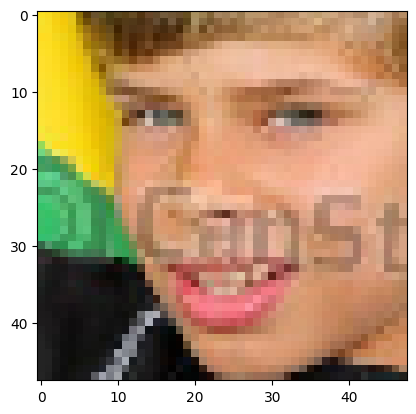

In [6]:
plt.imshow(images[45])

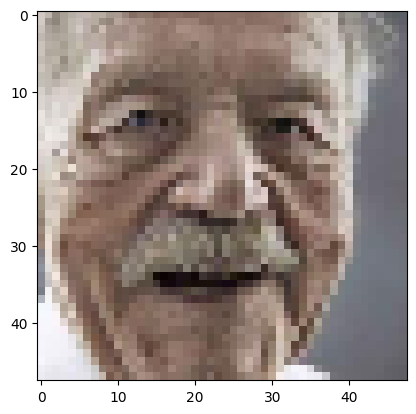

In [7]:
plt.imshow(images[0])

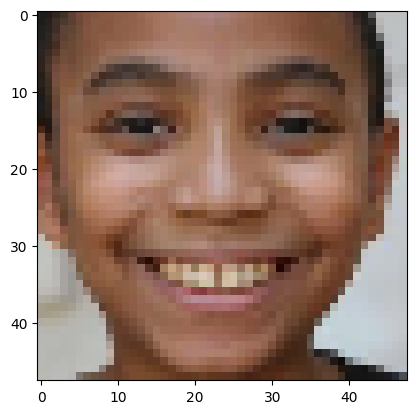

In [8]:
plt.imshow(images[87])

In [9]:
print(ages[87])

10


In [10]:
print(genders[87])

0


In [11]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [12]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [13]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


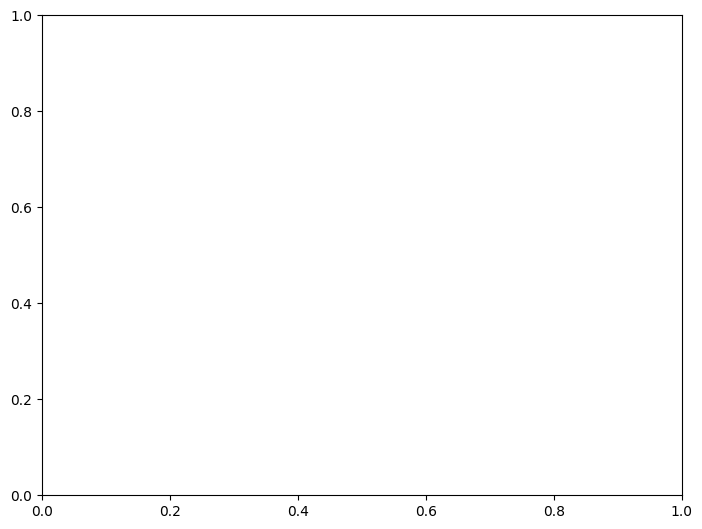

In [14]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar=(gender,values)
plt.show()

In [15]:
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [16]:
from array import array
val=values.tolist()
cnt=counts.tolist()

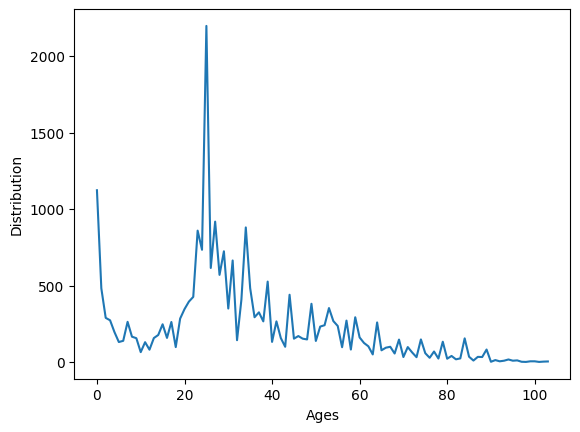

In [17]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [18]:
len(genders)


23708

In [19]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [20]:
images_f_2=images_f/255

In [21]:
images_f_2.shape

(23708, 48, 48, 3)

In [22]:
labels_f=np.array(labels)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(images_f_2,labels_f, test_size=0.25)

In [25]:
y_train[0:5]

array([[24,  0],
       [25,  0],
       [34,  1],
       [40,  0],
       [56,  1]])

In [26]:
y_train_2=[y_train[:,1],y_train[:,0]]
y_test_2=[y_test[:,1],y_test[:,0]]

In [27]:
y_train_2[0][:5]

array([0, 0, 1, 0, 1])

In [28]:
y_train_2[1][:5]

array([24, 25, 34, 40, 56])

In [29]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [30]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPool2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPool2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPool2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPool2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=keras.models.Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model

In [31]:
Model=model((48,48,3))

In [32]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 48, 48, 32)   896         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 48, 48, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 48, 48, 32)   0           ['dropout[0][0]']                
                                                                                              

In [33]:
from keras.callbacks import ModelCheckpoint

In [34]:
fle_s = 'Age_sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [35]:
History=Model.fit(x_train,y_train_2,batch_size=64,validation_data=(x_test,y_test_2),epochs=15,callbacks=callback_list)

Epoch 1/15
278/278 [==============================] - ETA: 0s - loss: 17.1228 - sex_out_loss: 0.6827 - age_out_loss: 16.2624 - sex_out_accuracy: 0.5838 - age_out_accuracy: 0.0477
Epoch 1: val_loss improved from inf to 15.63583, saving model to Age_sex_Detection.h5
278/278 [==============================] - 125s 441ms/step - loss: 17.1228 - sex_out_loss: 0.6827 - age_out_loss: 16.2624 - sex_out_accuracy: 0.5838 - age_out_accuracy: 0.0477 - val_loss: 15.6358 - val_sex_out_loss: 0.6231 - val_age_out_loss: 14.8553 - val_sex_out_accuracy: 0.6847 - val_age_out_accuracy: 0.0456
Epoch 2/15
278/278 [==============================] - ETA: 0s - loss: 14.3431 - sex_out_loss: 0.5881 - age_out_loss: 13.5690 - sex_out_accuracy: 0.6968 - age_out_accuracy: 0.0477
Epoch 2: val_loss improved from 15.63583 to 12.52285, saving model to Age_sex_Detection.h5
278/278 [==============================] - 114s 409ms/step - loss: 14.3431 - sex_out_loss: 0.5881 - age_out_loss: 13.5690 - sex_out_accuracy: 0.6968 - a

In [36]:
Model.evaluate(x_test,y_test_2)

186/186 [==============================] - 6s 31ms/step - loss: 10.4963 - sex_out_loss: 0.2950 - age_out_loss: 9.7164 - sex_out_accuracy: 0.8736 - age_out_accuracy: 0.0456


[10.496261596679688,
 0.2950240969657898,
 9.716388702392578,
 0.8736291527748108,
 0.04555424302816391]

In [37]:
pred = Model.predict(x_test)

186/186 [==============================] - 7s 32ms/step


In [38]:
pred[1]

array([[19.235573 ],
       [16.155302 ],
       [ 2.7576025],
       ...,
       [37.06031  ],
       [20.01793  ],
       [22.067665 ]], dtype=float32)

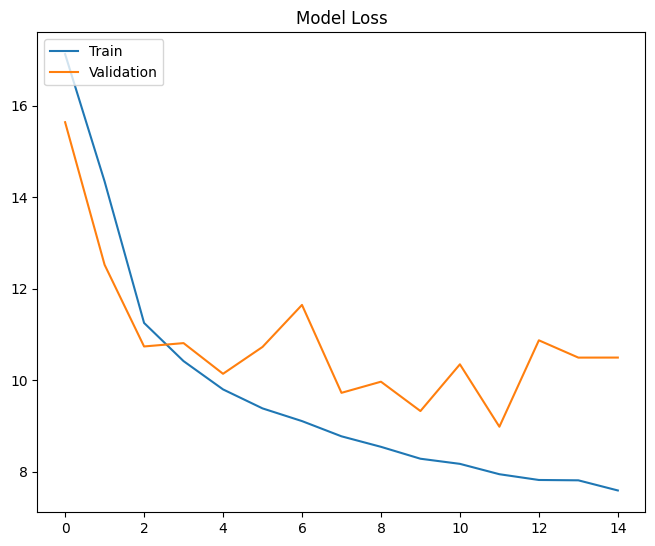

In [39]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


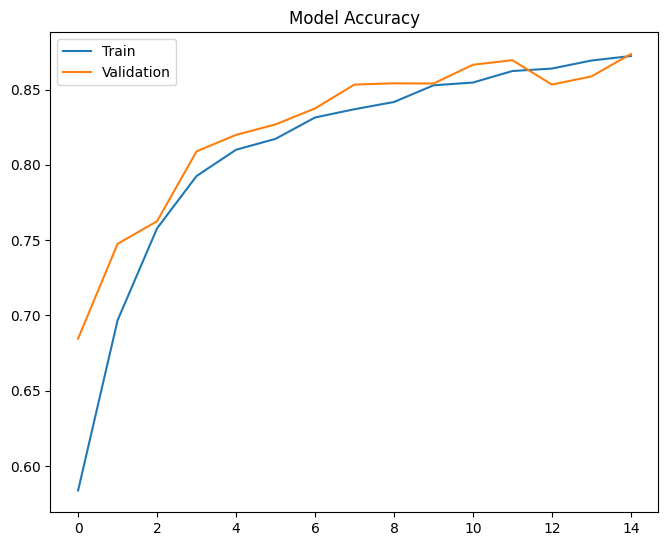

In [40]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

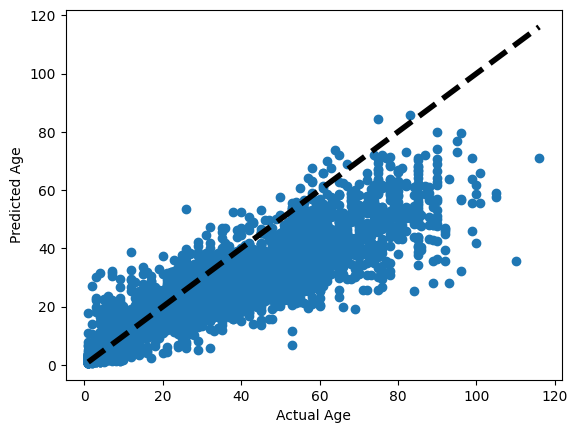

In [41]:
fig,ax=plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [42]:
i=0
pred_1=[]
while(i<len(pred[0])):
    pred_1.append(int(np.round(pred[0][i])))
    i=i+1

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [44]:
report=classification_report(y_test_2[0],pred_1)

In [45]:
print(report)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      3146
           1       0.83      0.92      0.87      2781

    accuracy                           0.87      5927
   macro avg       0.88      0.88      0.87      5927
weighted avg       0.88      0.87      0.87      5927



In [46]:
results=confusion_matrix(y_test_2[0],pred_1)

<AxesSubplot: >

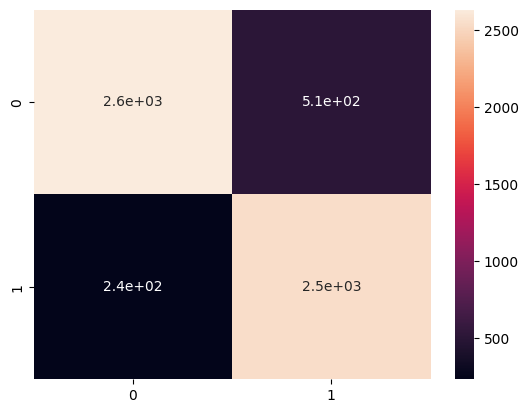

In [47]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [48]:
def test_image(ind,images_f,images_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_1=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_1[1][0]))
    sex=int(np.round(pred_1[0][0]))
    print("Predicted Age is" + str(age))
    print("Predicted Gender is" + sex_f[sex])

1/1 [==============================] - 0s 75ms/step
Predicted Age is67
Predicted Gender isFemale


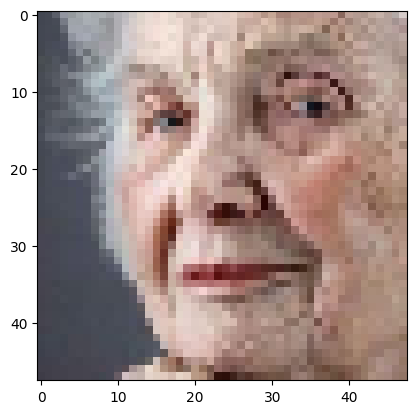

In [49]:
test_image(4,images_f,images_f_2,Model)

1/1 [==============================] - 0s 131ms/step
Predicted Age is12
Predicted Gender isMale


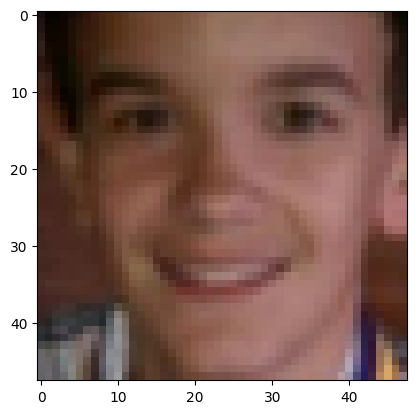

In [50]:
test_image(23,images_f,images_f_2,Model)

1/1 [==============================] - 0s 56ms/step
Predicted Age is10
Predicted Gender isMale


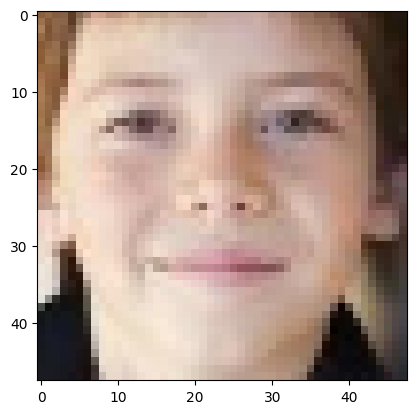

In [51]:
test_image(76,images_f,images_f_2,Model)

1/1 [==============================] - 0s 45ms/step
Predicted Age is18
Predicted Gender isFemale


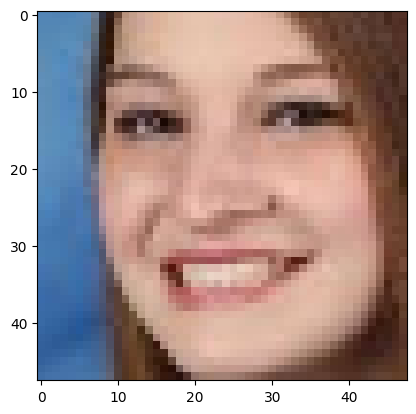

In [53]:
test_image(1288,images_f,images_f_2,Model)